<a href="https://colab.research.google.com/github/greatshotkid/greatshotkid/blob/main/Unobias002(270824).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dataset from google drive

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the zip file

In [43]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/My Dataset.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

## **Importing the required libraries**

In [44]:
!pip install PyMuPDF nltk tensorflow pandas numpy pdfminer.six



In [45]:
from pdfminer.high_level import extract_text
import os
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
import json
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [46]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **Extracting text from the pdf CVs**

In [47]:
def extract_text_from_pdfs(cv_pdf):
    text_data = []
    for filename in os.listdir(cv_pdf):
        if filename.endswith(".pdf"):
            filepath = os.path.join(cv_pdf, filename)
            try:
                text = extract_text(filepath)
                text_data.append((filename,text))
                #print(f"Successfully processed {filename}")
            except Exception as e:
                print(f"Error processing {filename}: {e}") #prints filename if an error occurs during processing
    return text_data


cv_pdf = '/content/dataset/My Dataset'
cv_texts = extract_text_from_pdfs(cv_pdf)


## Print extract for each pdf

In [ ]:
"""
for i, text in enumerate(cv_texts):
    print(f"\nExtracted Text from Document {i+1}:\n")
    print(text)
"""

Streaming output truncated to the last 5000 lines.
 
 
 
 
  PROJECT: PROPOSED HOUSING DEVELOPMENT, KAJIADO 

CLIENT: PAMORA INVESTMENTS LIMITED 
PROJECT STATUS: ONGOING 

  PROJECT:PROPOSED HOUSING DEVELOPMENT 

CLIENT: URITHI SACCO 
PROJECT STATUS: ONGOING 

  PROJECT: PROPOSED MULTI SPECIALITY HOSPITAL, BUNGOMA 

CLIENT: LIFE CARE HOSPITAL LTD 
PROJECT STATUS: ONGOING 

Hobbies and Interests   
Able to lead and supervise, enjoy reading books, solving puzzles and playing hockey.   

 
 
 
 
 
 
  
  
 
 
 
 
 
 
 
 
 
 
 
 
 
 
REFERENCE 

1.  QS PETER MVOI MWANYUMBA.   

DIRECTOR NYANGE INTEGRATED CONSULTANTS LTD.   
CELLPHONE: +254 723 671040  

2. 

ARCH. TUESDAY NYAKAGO   
DIRECTOR LOCUS STUDIO 
CELLPHONE: +254 710 446137 

3.  NASHON OKOWA 

BEACON AFRICA CONSULTANTS (PROJECT MANAGERS) 
CHAIRMAN: ASSOCIATION OF CONSTRUCTION MANAGERS OF 
KENYA   
CELLPHONE: +254 726 860568 

 
 
 
 
 
 
 
 
 
  
  
  
  
  
  


Extracted Text from Document 3461:

THAMIZ SELVAN.R 
B.E,Civil

##Load keywords

In [48]:
def load_keywords(keyword_file):
    with open(keyword_file, 'r') as file:
        keywords = [line.strip() for line in file.readlines()]
    return keywords


keyword_file = '/content/drive/MyDrive/ITkeywords.txt'
keywords = load_keywords(keyword_file)


##Printing an extract of keywords

In [49]:
"""
for i, text in enumerate(keywords):
    print(f"\nExtracted Text from Document {i+1}:\n")
    print(text)
"""

'\nfor i, text in enumerate(keywords):\n    print(f"\nExtracted Text from Document {i+1}:\n")\n    print(text)\n'

##Tokenizing and padding sequences

In [50]:

def preprocess_texts(texts, max_num_words=10000, max_seq_length=1000):
    tokenizer = Tokenizer(num_words=max_num_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_seq_length)
    return padded_sequences, tokenizer


texts = [text for _, text in cv_texts]  # Extract only text from cv_texts
padded_sequences, tokenizer = preprocess_texts(texts)


##Encoding keywords as multi-label targets

In [51]:

def create_keyword_labels(cv_texts, keywords):
    labels = []
    for _, text in cv_texts:
        text = text.lower()
        label = [1 if keyword in text else 0 for keyword in keywords]
        labels.append(label)
    return np.array(labels)


labels = create_keyword_labels(cv_texts, keywords)


##Splitting the data into training and validation set

In [52]:
# Split the data into training (80%) and testing (20%) sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

# Split the training set into training (75%) and validation (25%) sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42
)

##Building the model

In [53]:
input_dim = 40000  # Based on tokenizer settings
output_dim = len(keywords)  # Number of keywords
input_length = 1000  # Max sequence length used in padding


In [54]:
model_8 = Sequential([
    Embedding(input_dim=input_dim, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(output_dim, activation = 'sigmoid')
    ])

##Compiling the model

In [55]:
model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## Training and saving the model

In [56]:
history_model_8 = model_8.fit(
    X_train, y_train,
    epochs = 10,
    batch_size=32,
    validation_data=(X_val, y_val)

)

#Saving the model
model_8.save('model_8.keras')
with open('history_model_8.json', 'w') as f:
    json.dump(history_model_8.history, f)

Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.0248 - loss: 0.4257 - val_accuracy: 0.0544 - val_loss: 0.1120
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.0613 - loss: 0.1076 - val_accuracy: 0.0544 - val_loss: 0.1076
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.0832 - loss: 0.1014 - val_accuracy: 0.0544 - val_loss: 0.1035
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.0659 - loss: 0.0964 - val_accuracy: 0.0544 - val_loss: 0.0988
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.0740 - loss: 0.0959 - val_accuracy: 0.0530 - val_loss: 0.1001
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.0716 - loss: 0.0937 - val_accuracy: 0.0487 - val_loss: 0.0967
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.0646 - loss: 0.0914 - val_accuracy: 0.0544 - val_loss: 0.0966
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.0767 - loss: 0.0870 - val_accuracy: 0.0544 - v

##Model summary

In [57]:
model_8.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 1000, 128)           │       5,120,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 123)                 │          15,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,704,051 (59.91 MB)

 Trainable params: 5,234,683 (19.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,469,368 (39.94 MB)

##Reloading the model

In [58]:
model_8 = tf.keras.models.load_model('model_8.keras')
with open('history_model_8.json') as f:
    history_model_8 = json.load(f)

##Plotting the training history

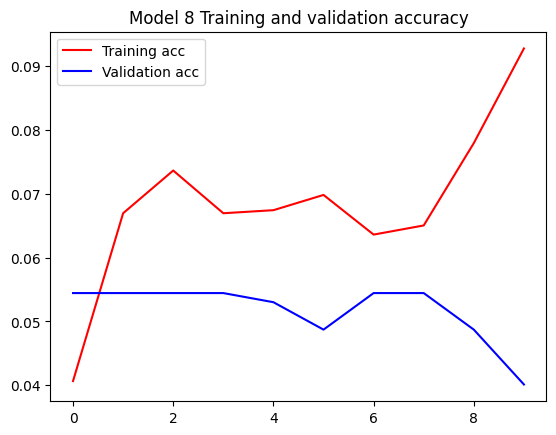

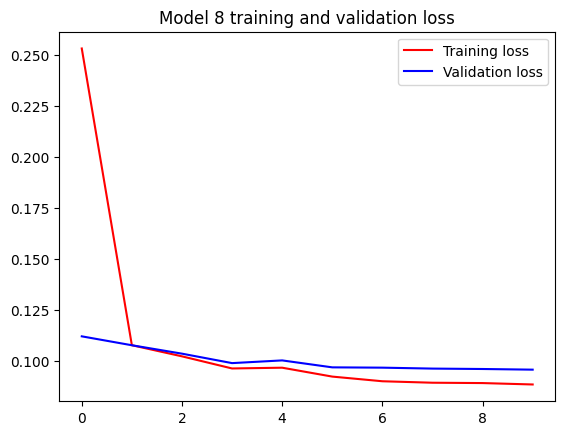

In [59]:
acc = history_model_8['accuracy']
val_acc = history_model_8['val_accuracy']
loss = history_model_8['loss']
val_loss = history_model_8['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 8 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 8 training and validation loss')
plt.legend()

plt.show()

##Confusion matrix

##Making a prediction

In [60]:
y_pred_prob = model_8.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 13s 526ms/step


##Predictions to binary labels

In [61]:
threshold = 0.85
y_pred = (y_pred_prob > threshold).astype(int)

##Calculating the Matrix

In [62]:
# Compute confusion matrices for each class
conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Print confusion matrices
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for Keyword {i}:")
    print(conf_matrix)
    print()

Confusion Matrix for Keyword 0:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 1:
[[688   0]
 [ 10   0]]

Confusion Matrix for Keyword 2:
[[676   0]
 [ 22   0]]

Confusion Matrix for Keyword 3:
[[622   0]
 [ 76   0]]

Confusion Matrix for Keyword 4:
[[688   0]
 [ 10   0]]

Confusion Matrix for Keyword 5:
[[691   0]
 [  7   0]]

Confusion Matrix for Keyword 6:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 7:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 8:
[[690   0]
 [  8   0]]

Confusion Matrix for Keyword 9:
[[680   0]
 [ 18   0]]

Confusion Matrix for Keyword 10:
[[692   0]
 [  6   0]]

Confusion Matrix for Keyword 11:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 12:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 13:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 14:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 15:
[[598   0]
 [100   0]]

Confusion Matrix for Keyword 16:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 17:
[[655   

##Visualising the matirx

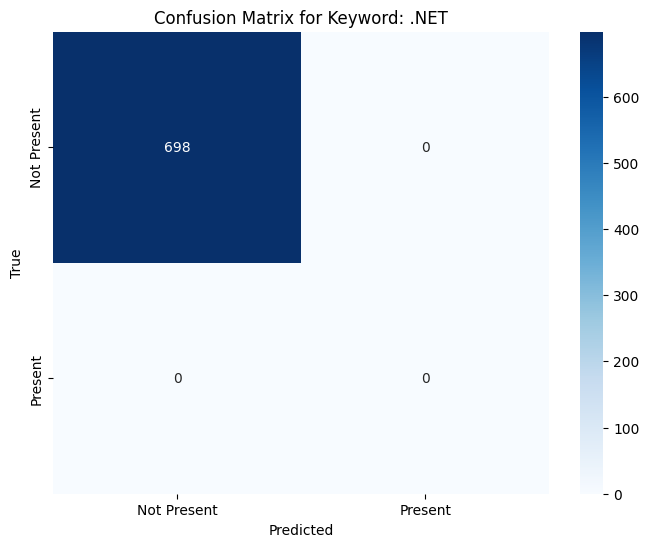

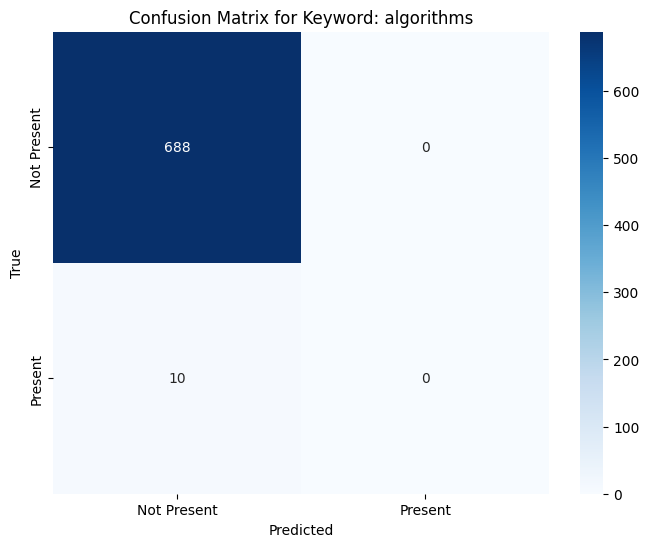

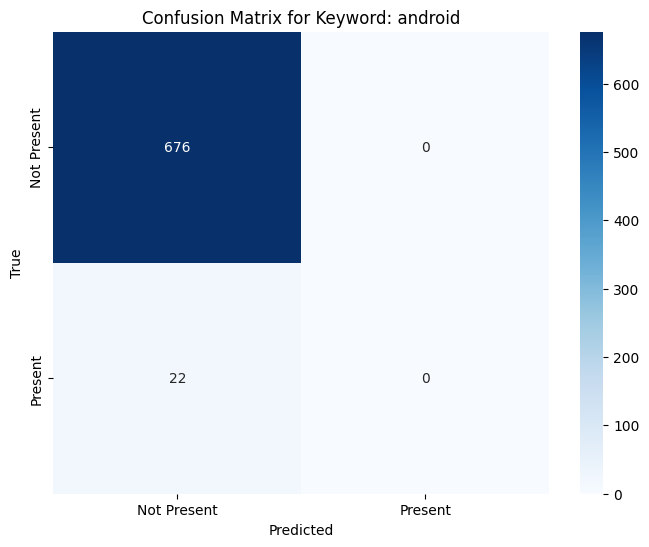

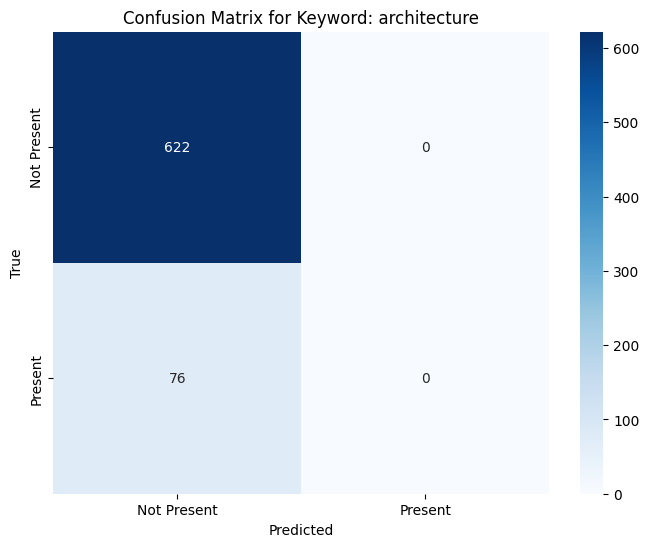

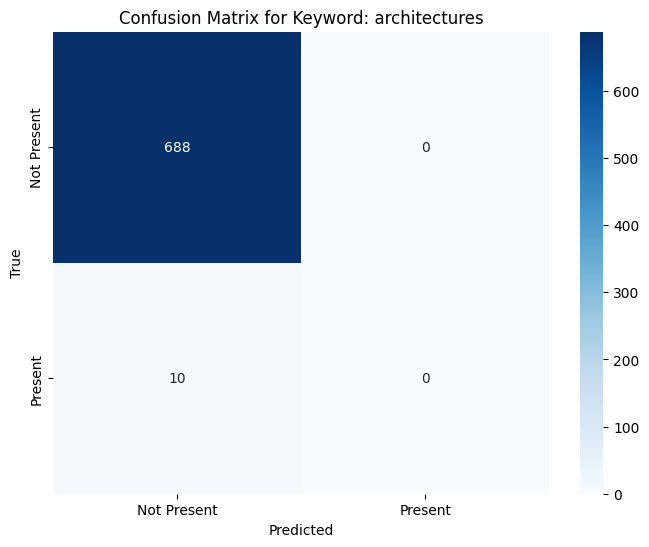

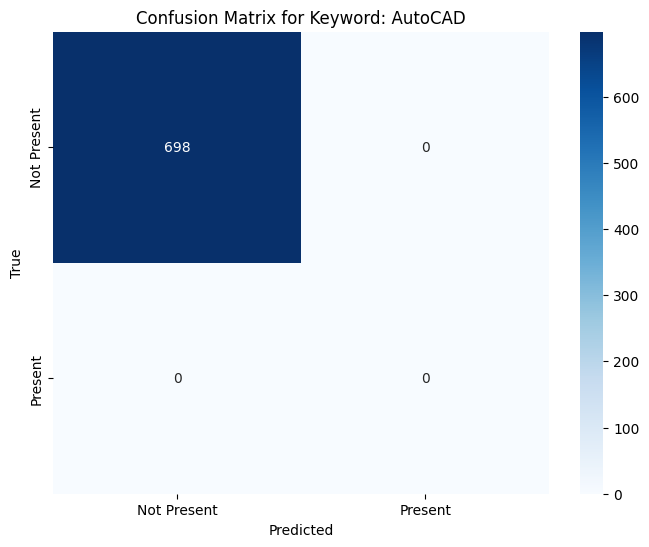

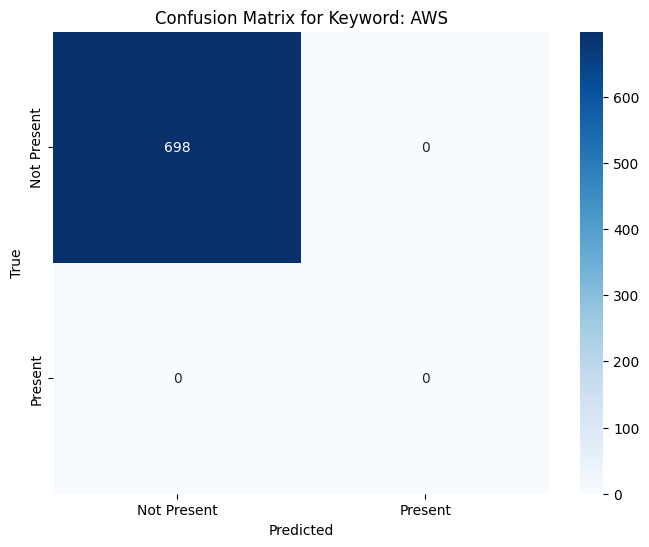

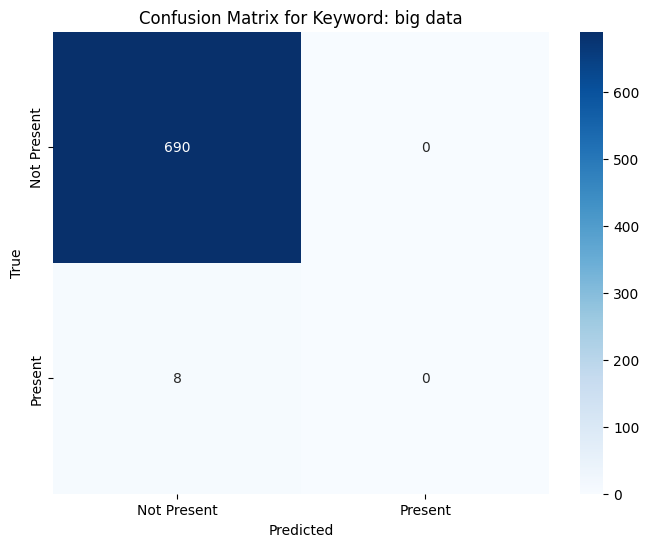

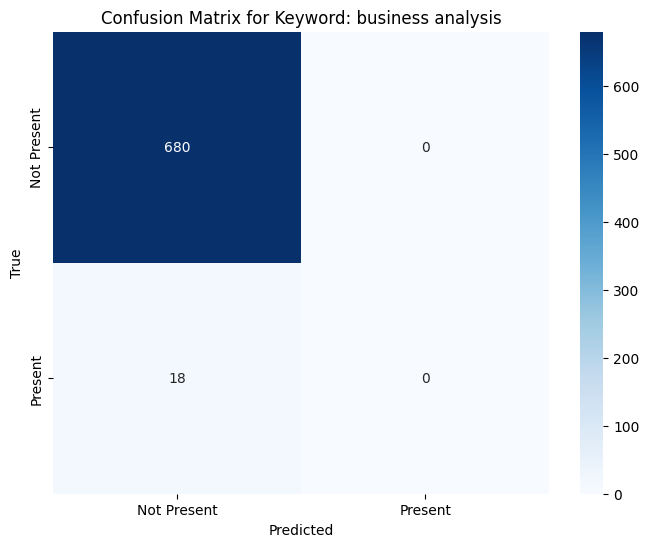

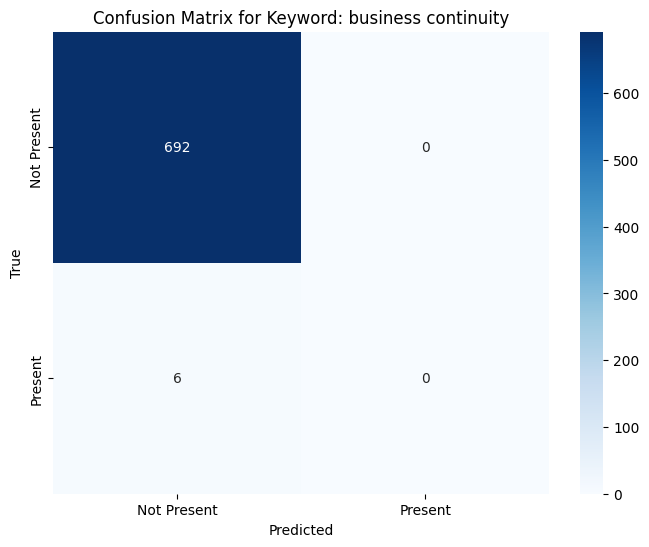

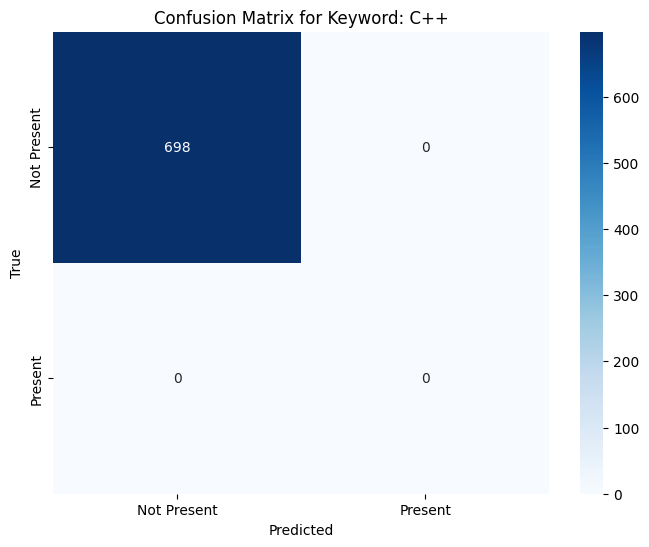

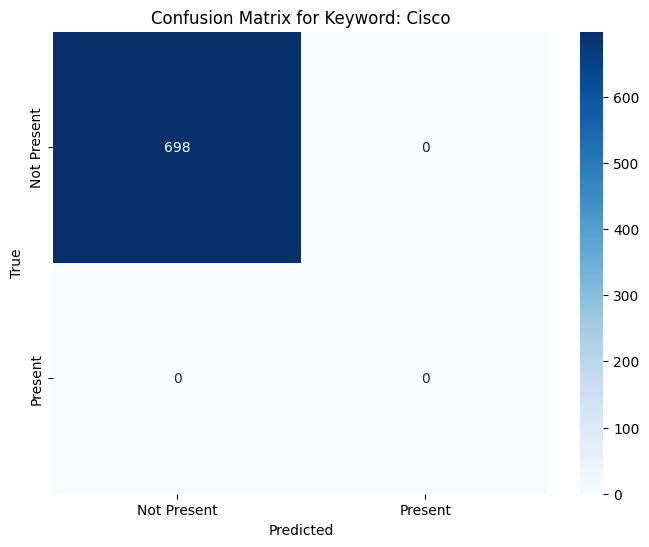

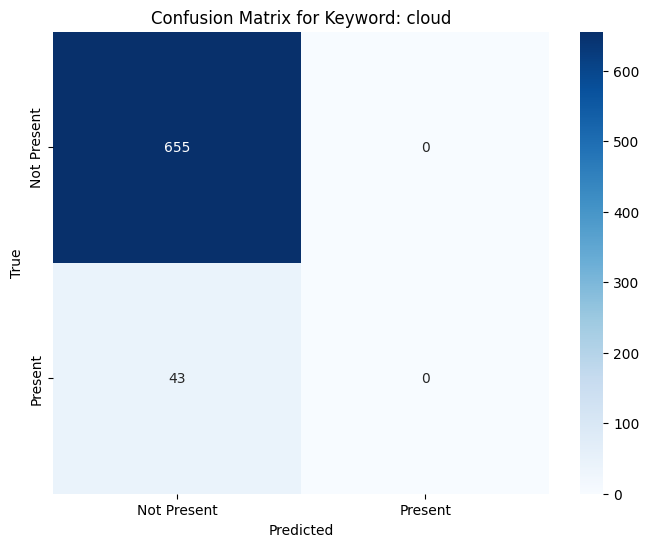

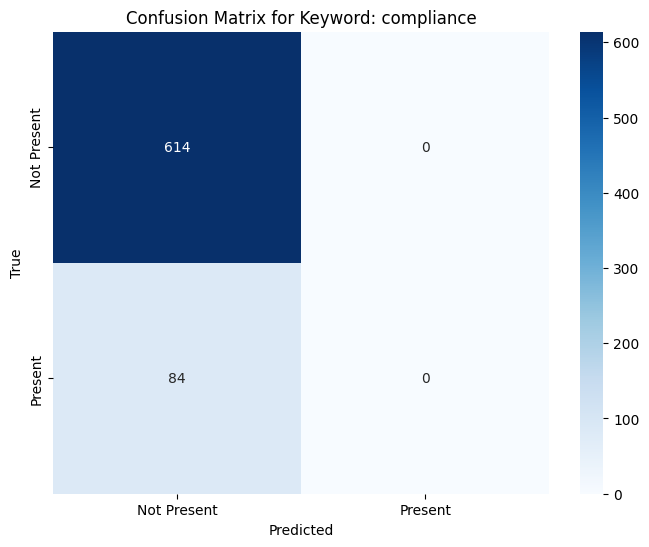

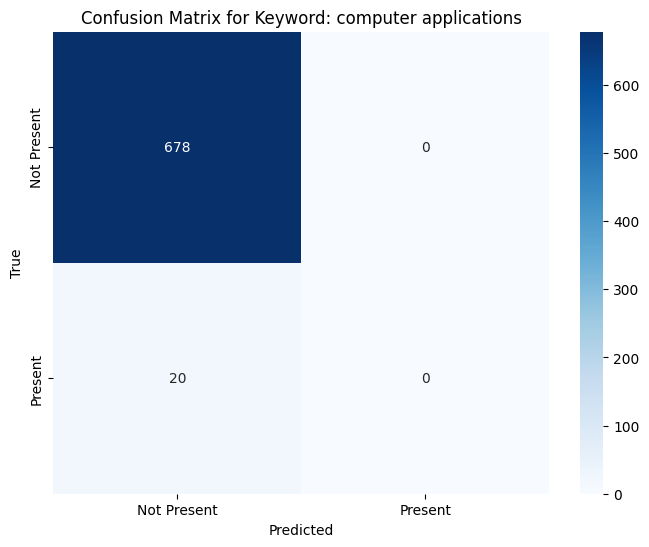

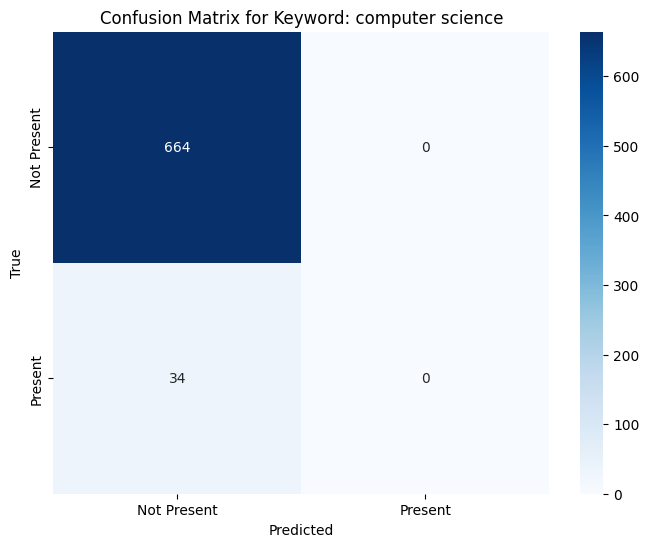

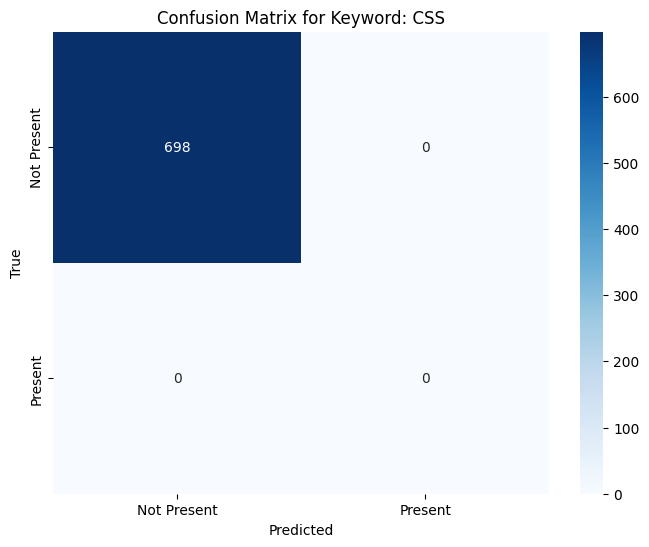

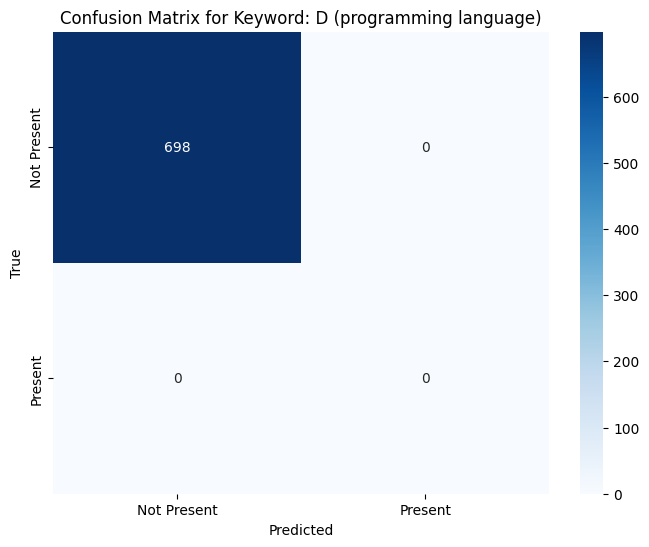

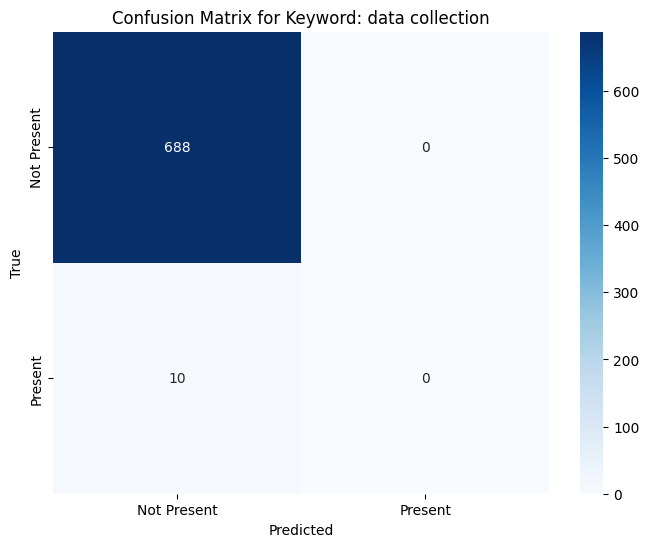

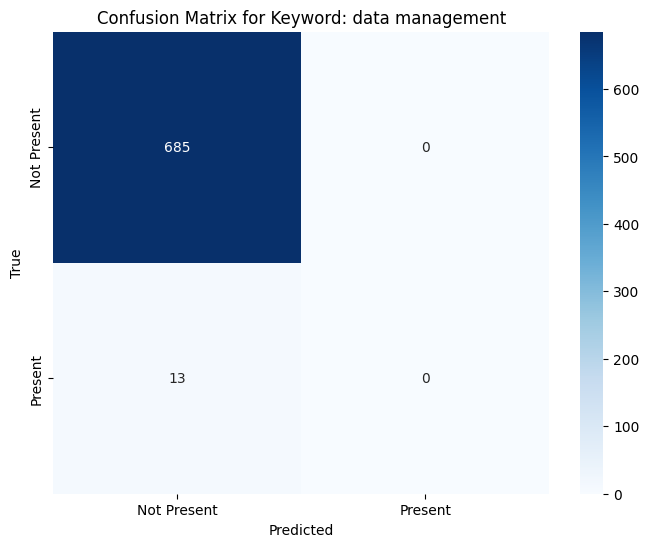

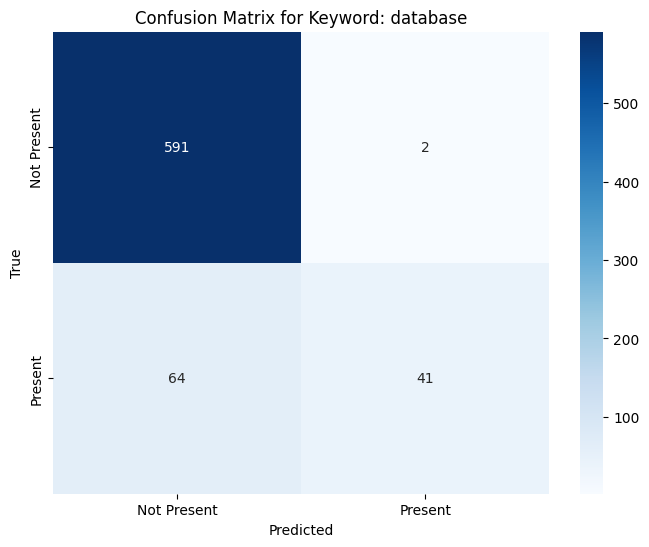

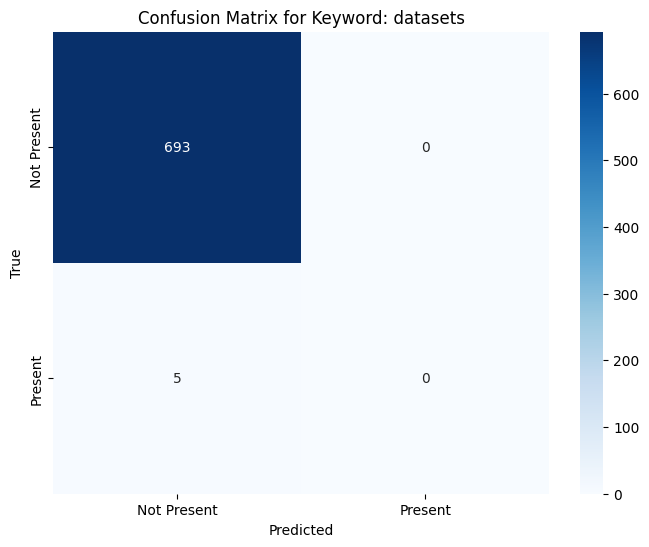

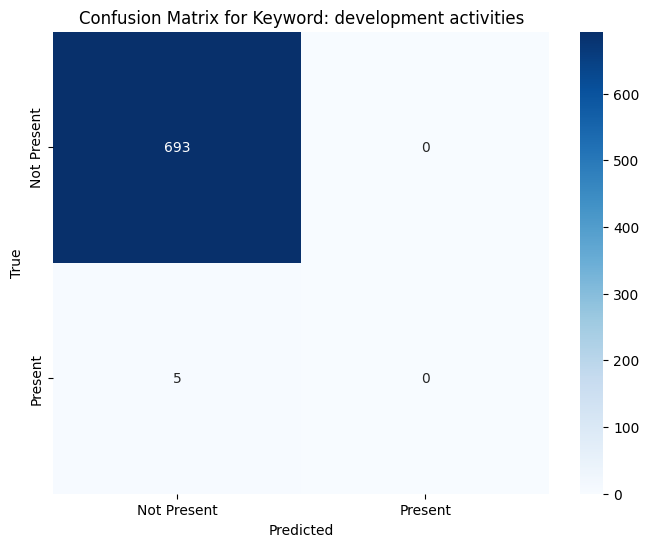

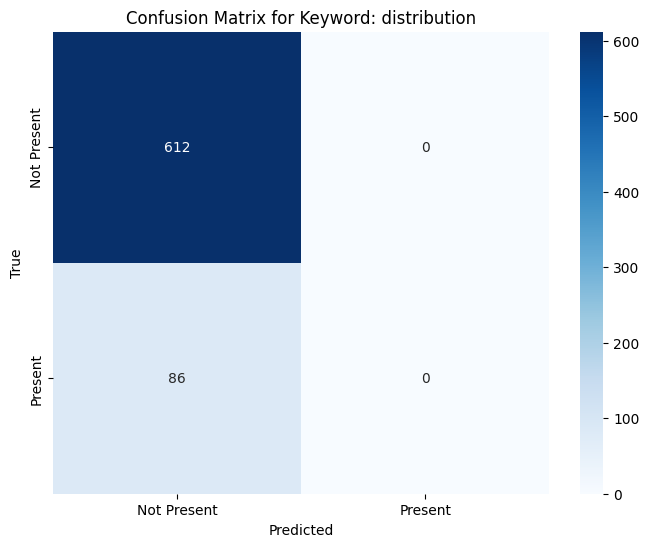

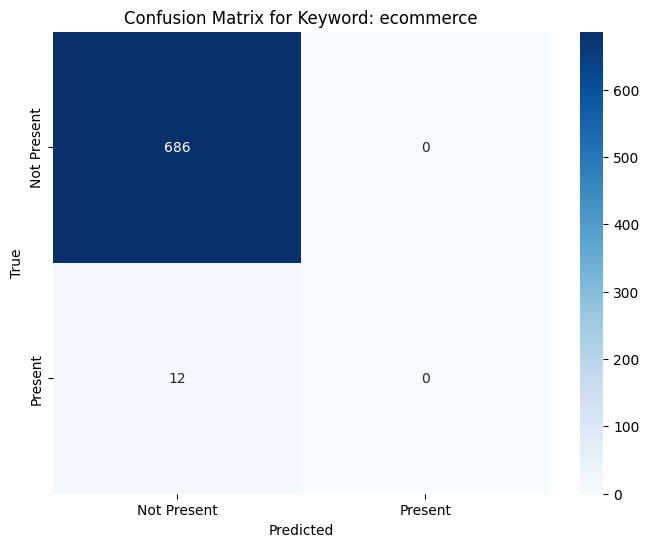

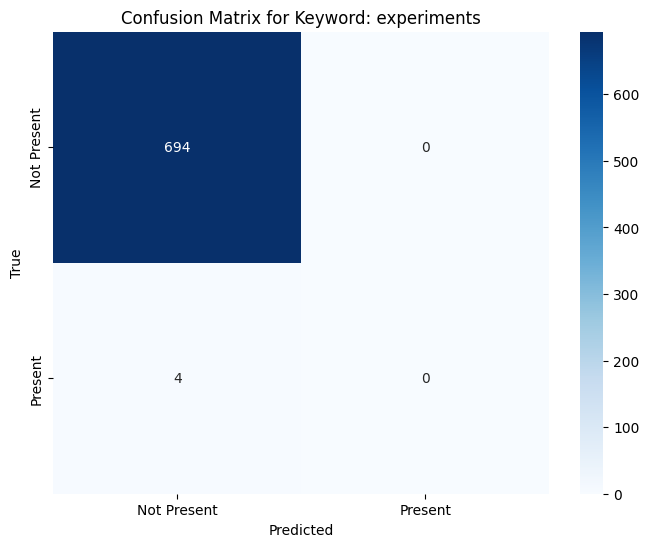

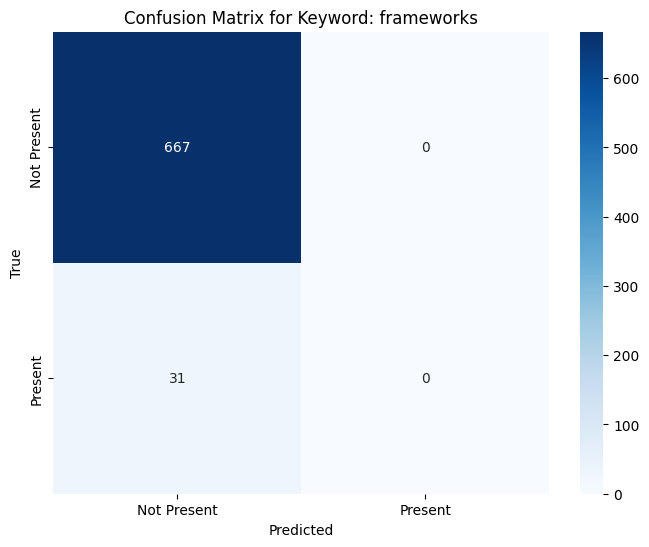

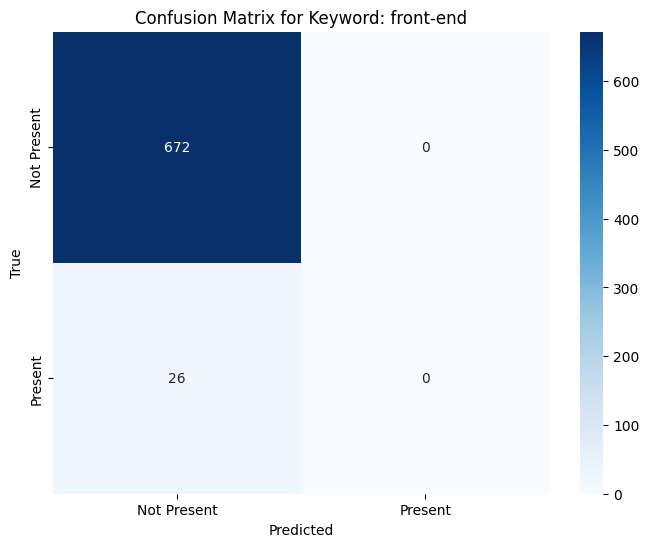

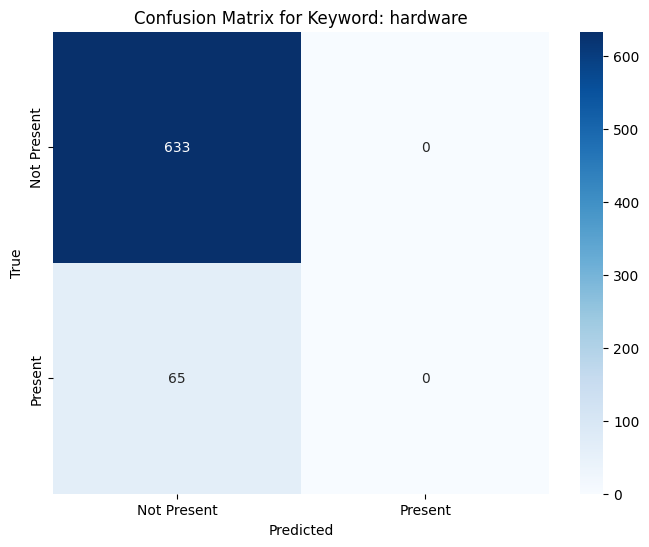

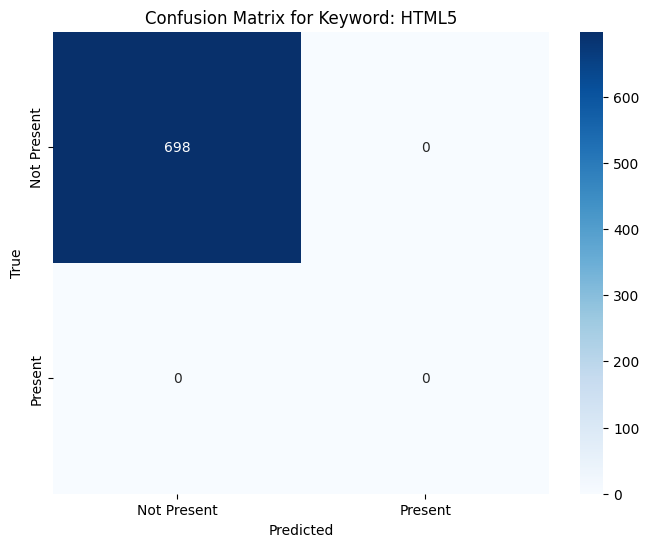

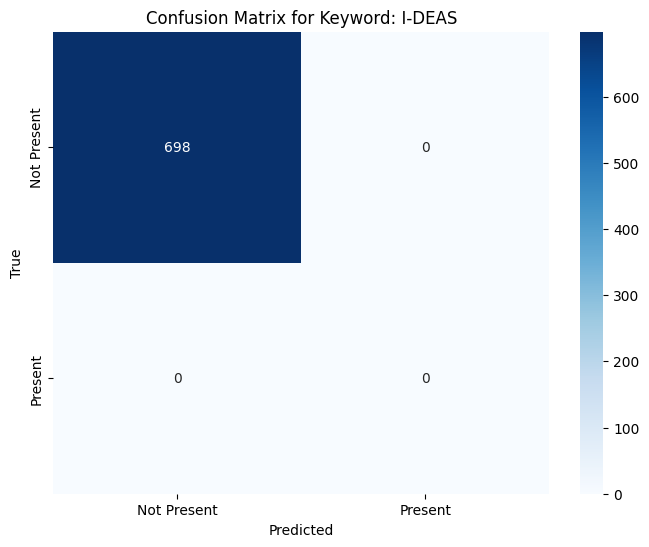

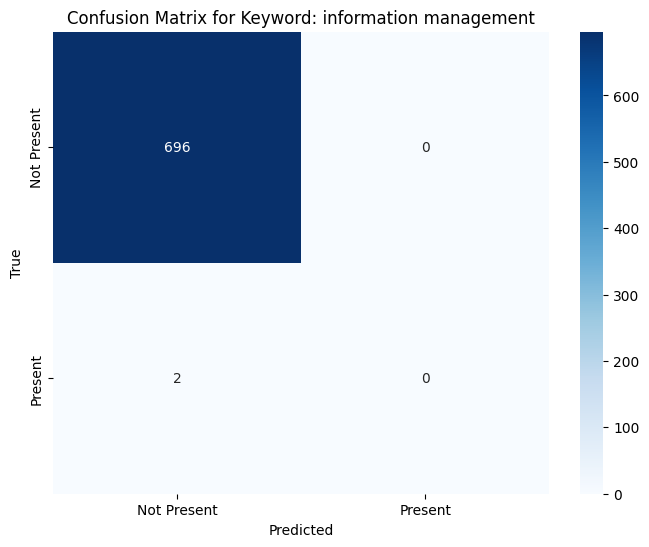

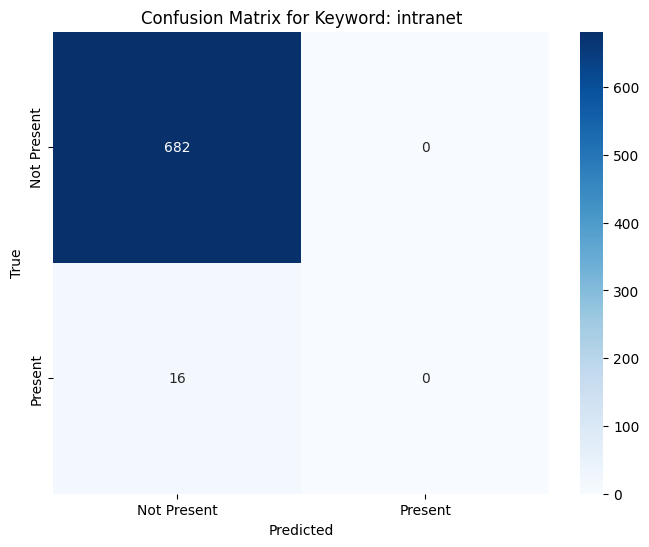

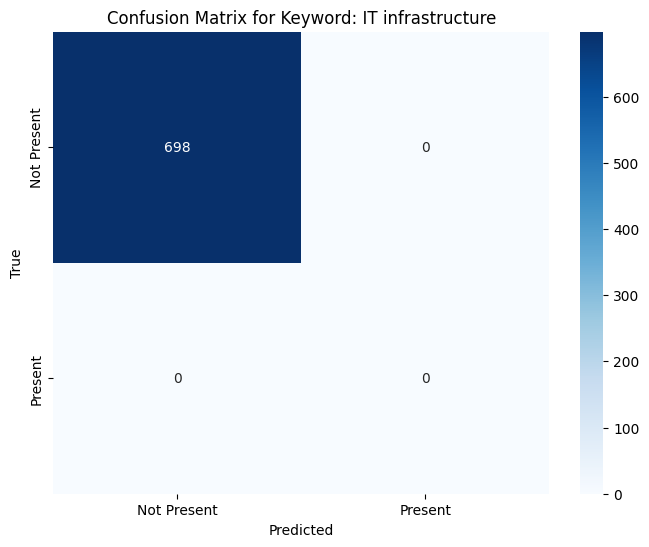

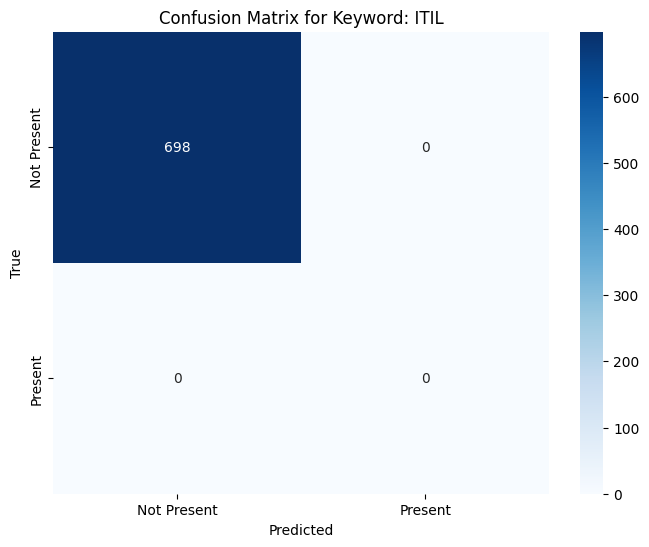

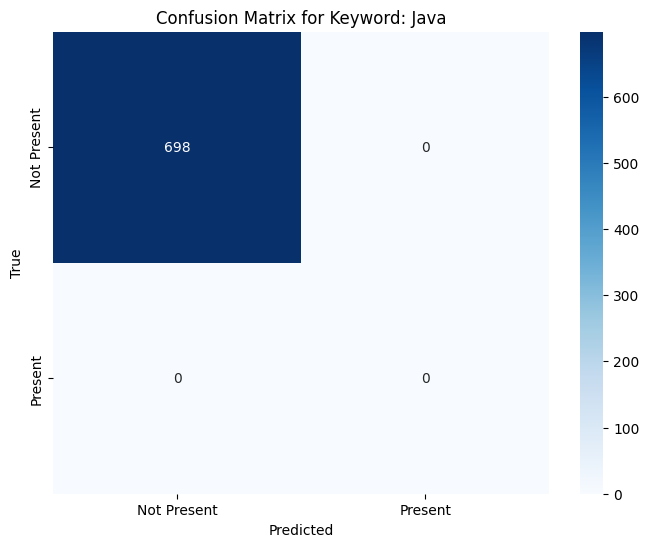

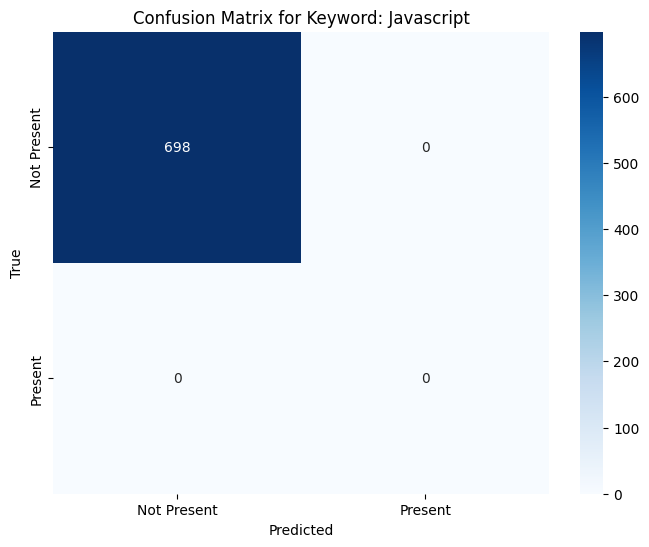

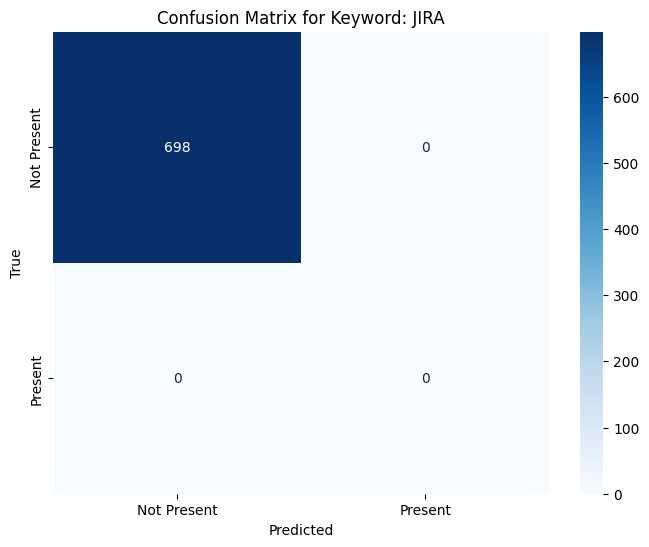

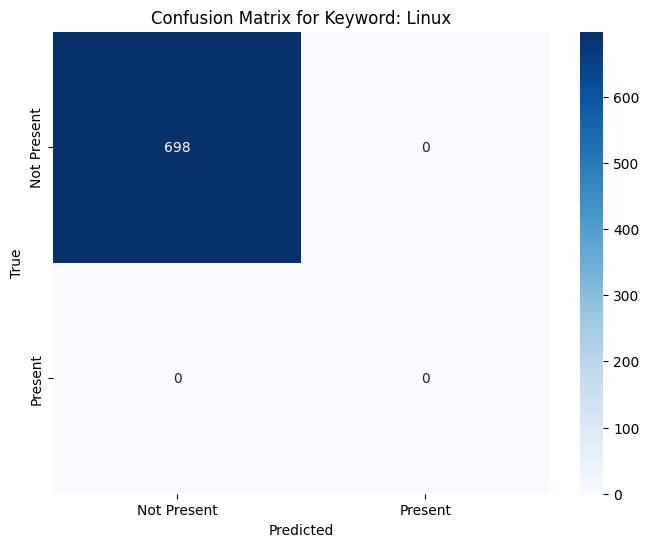

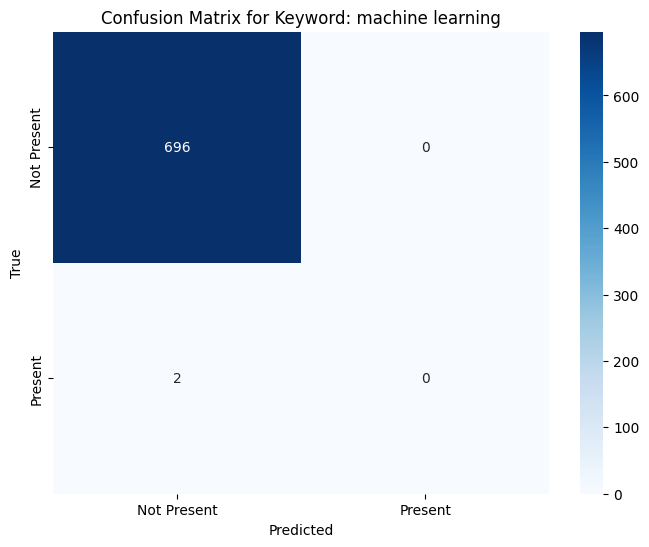

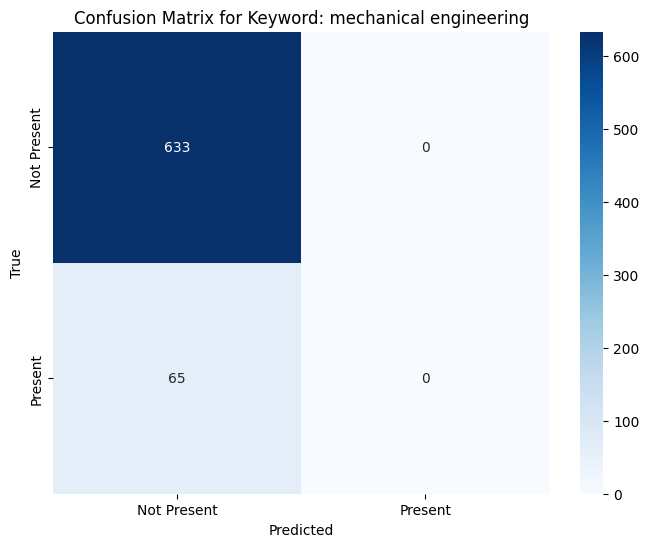

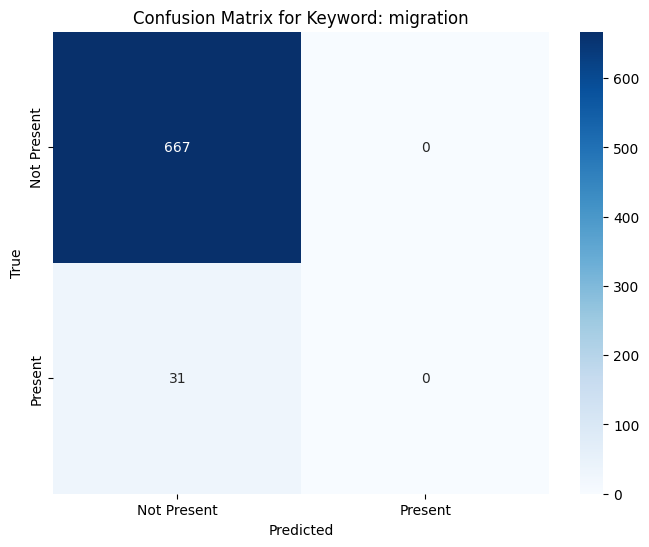

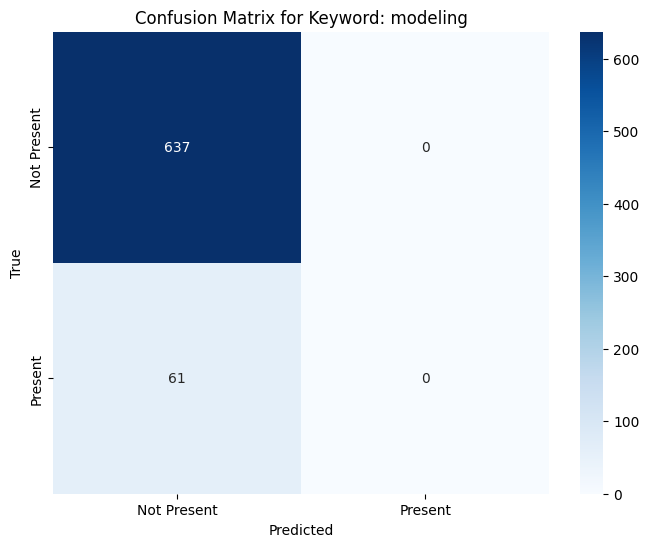

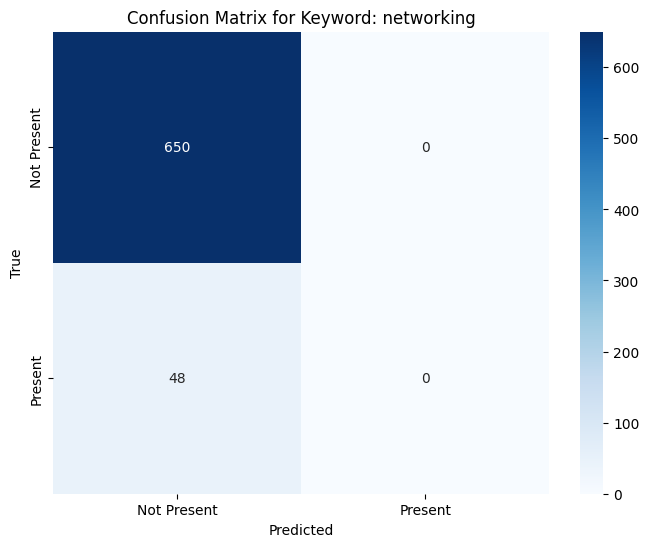

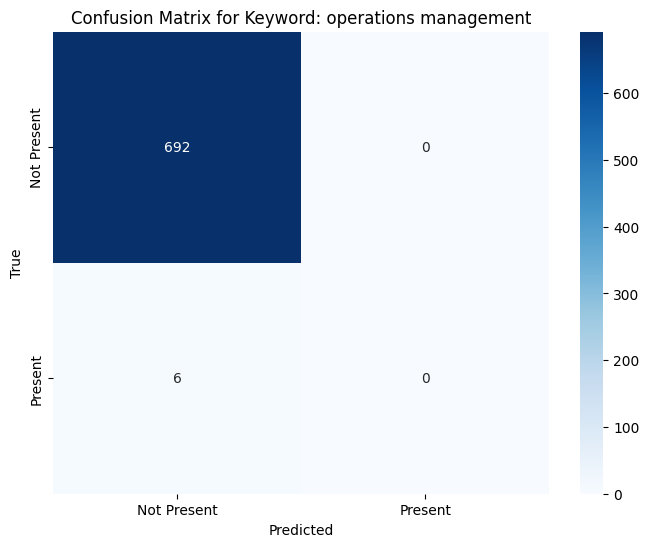

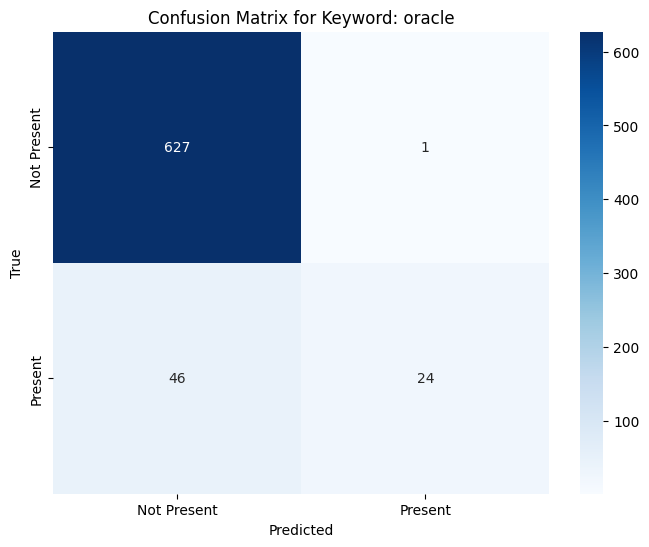

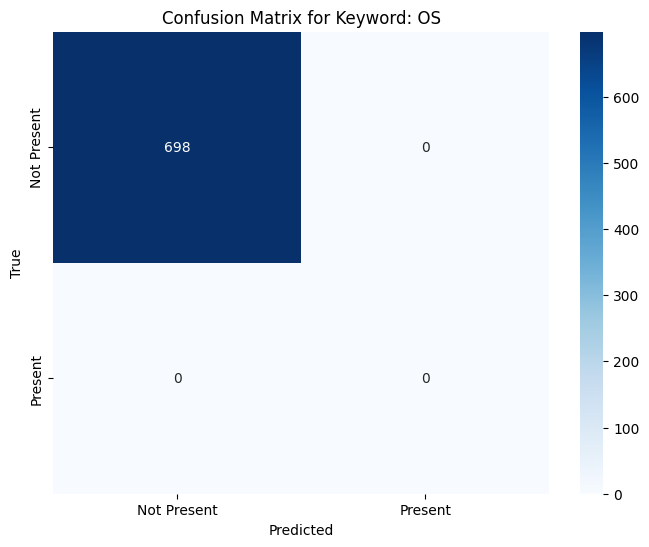

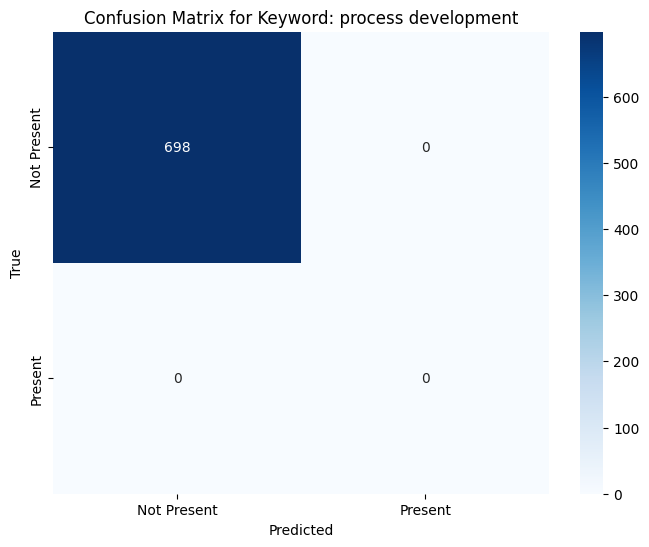

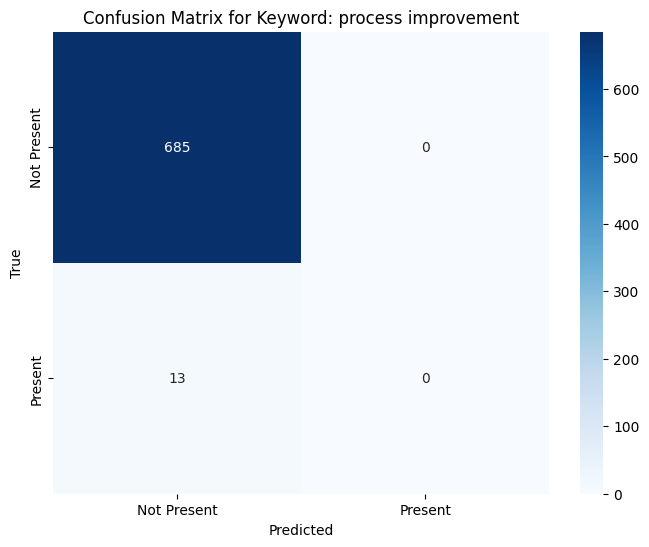

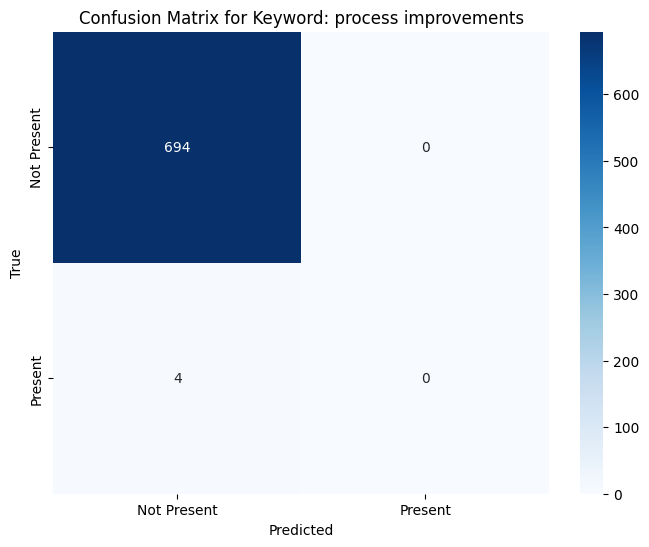

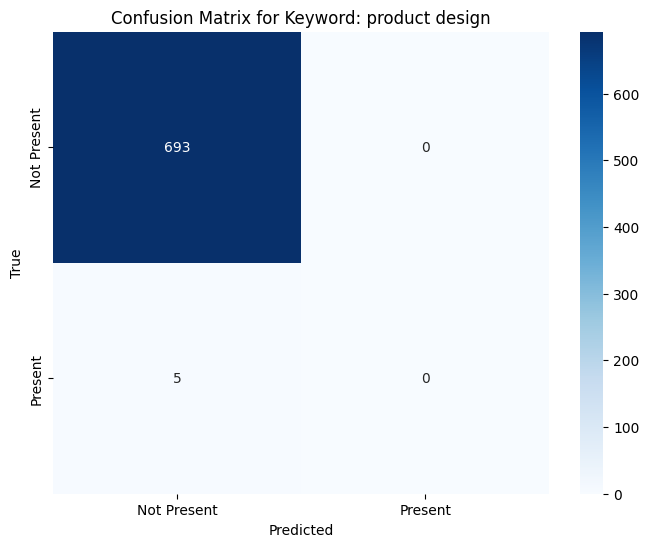

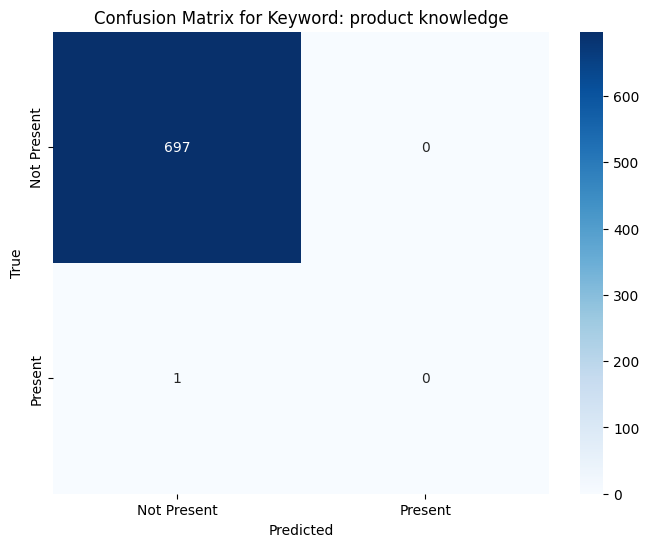

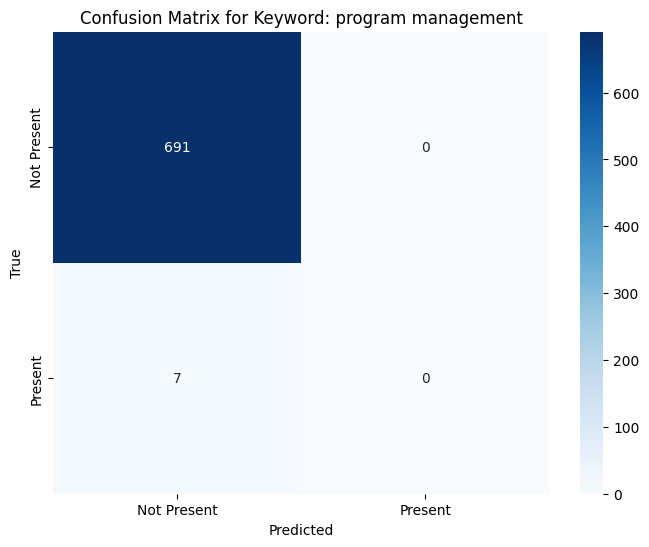

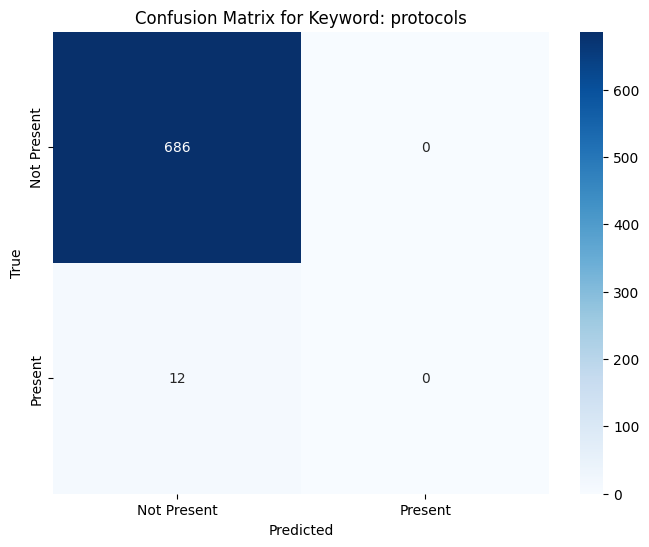

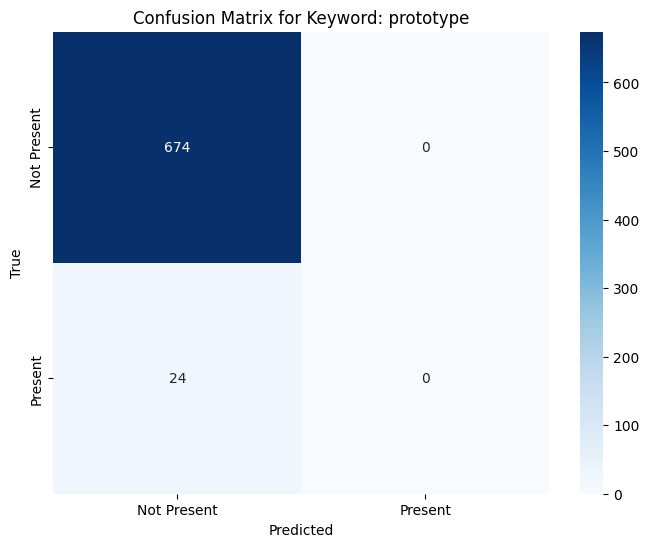

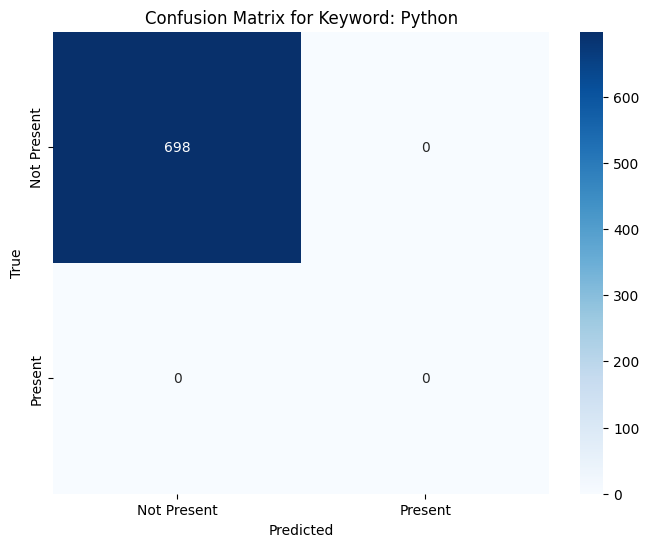

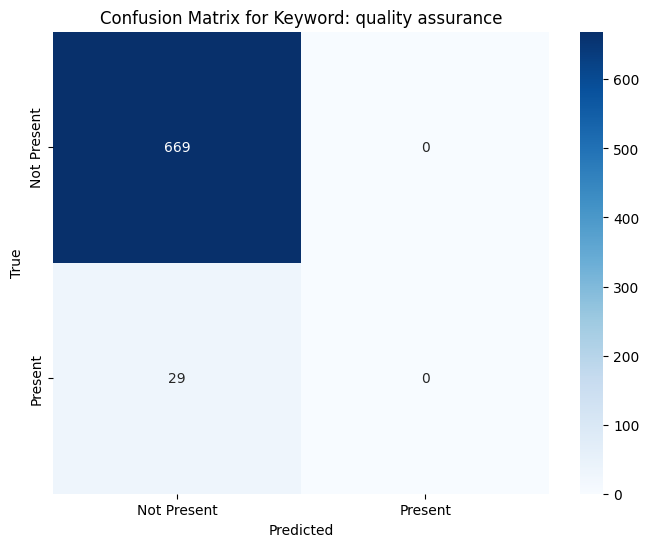

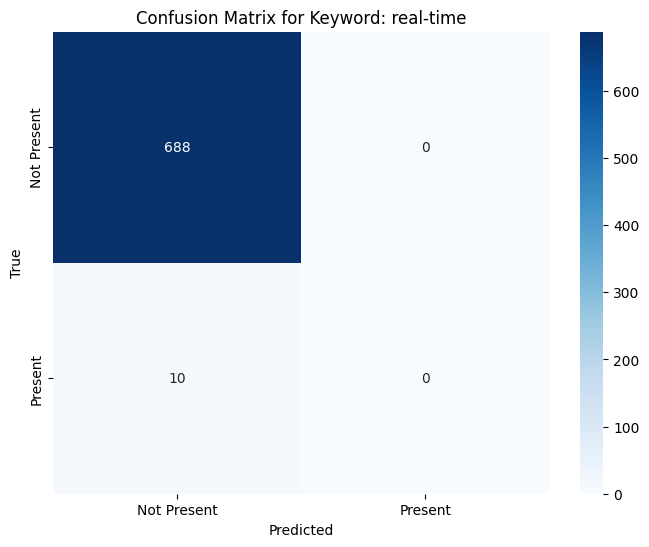

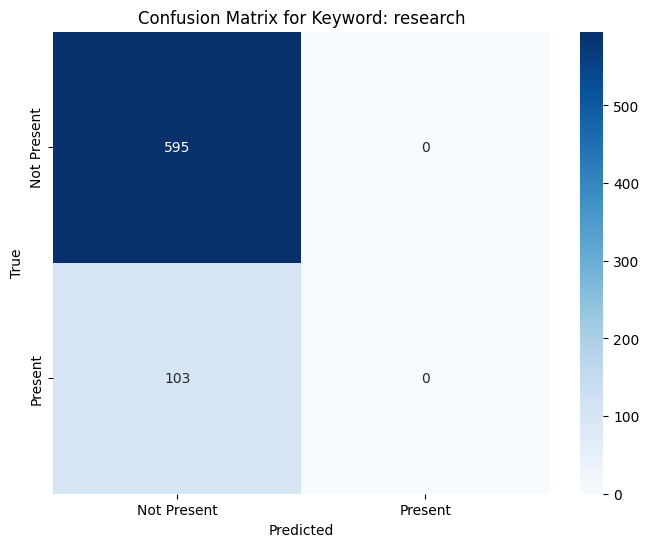

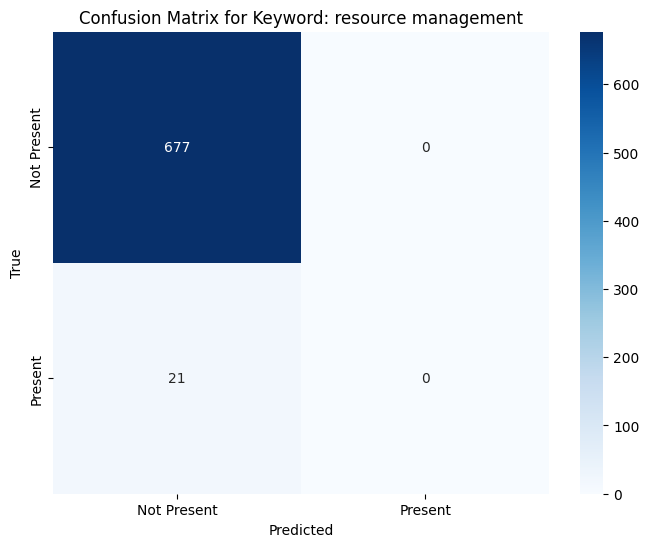

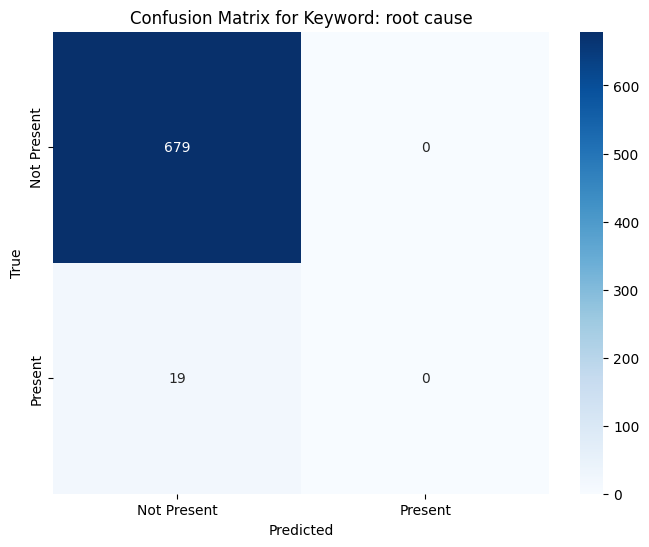

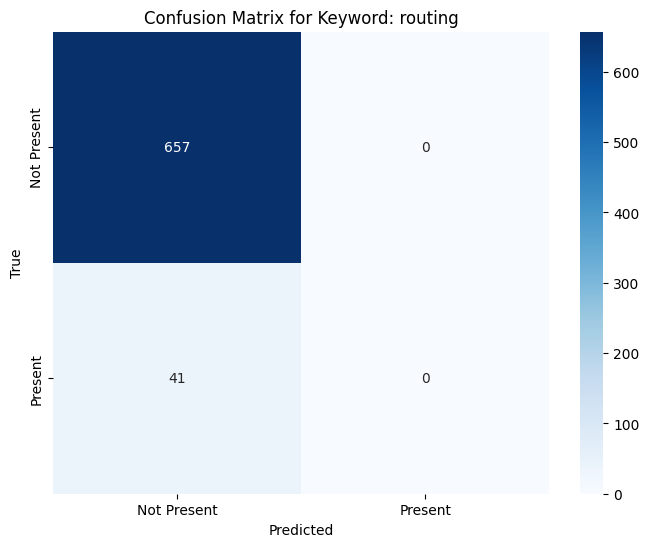

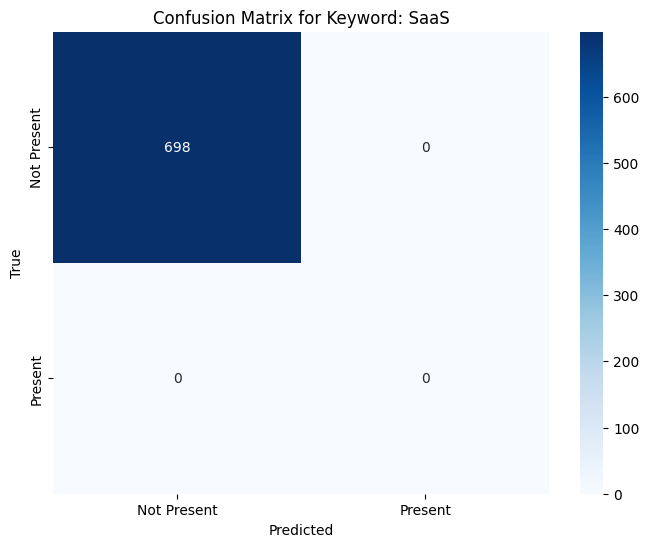

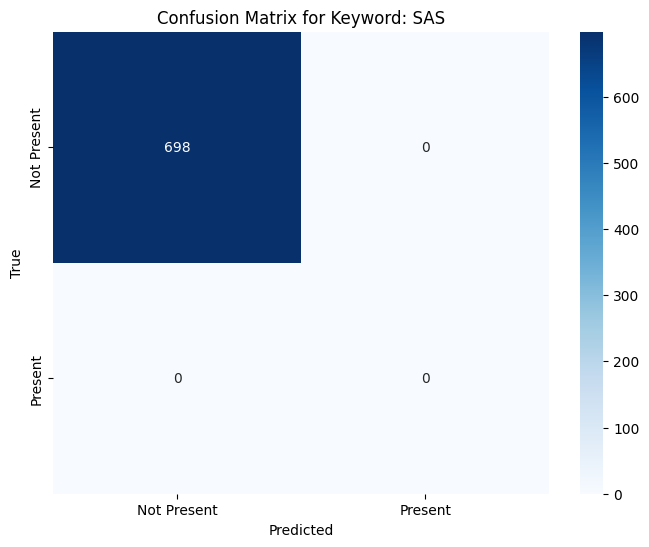

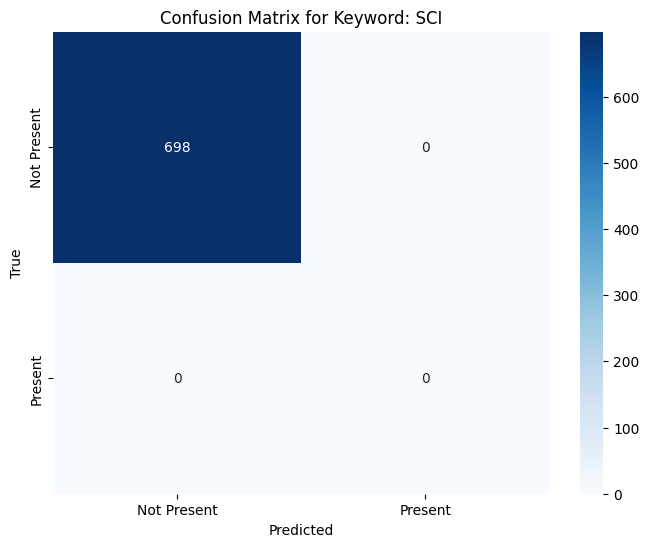

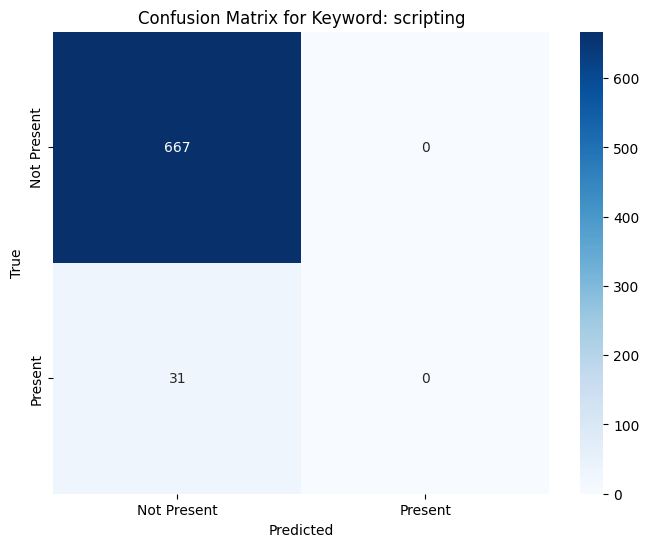

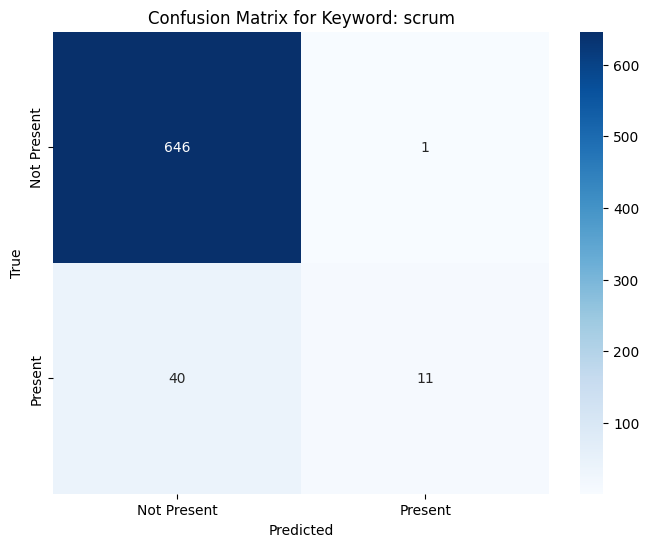

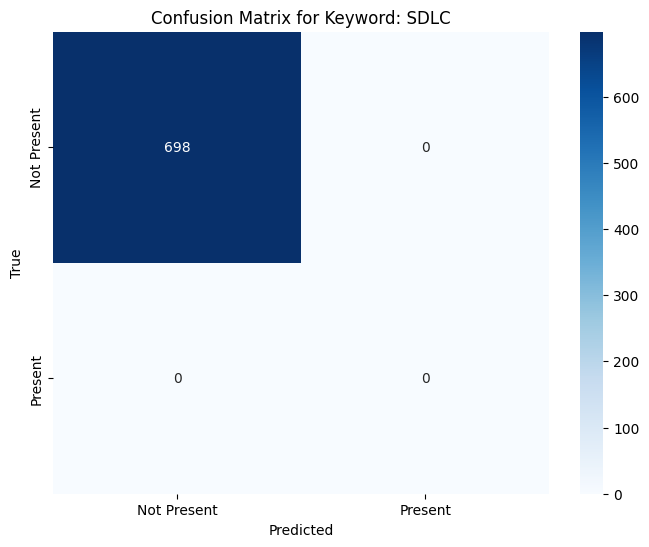

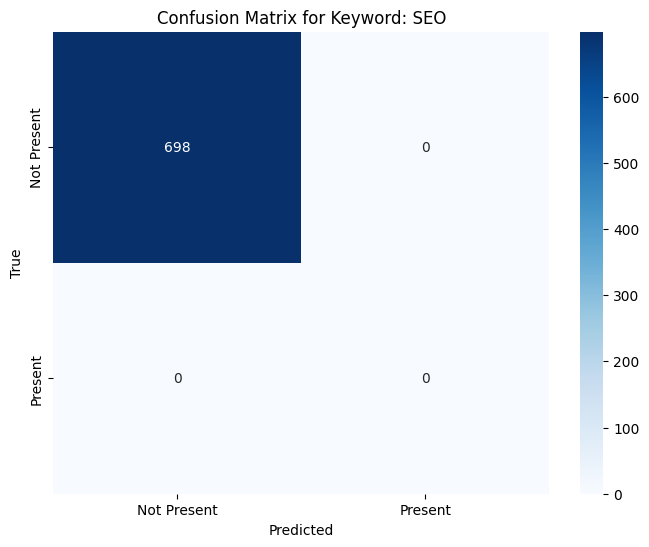

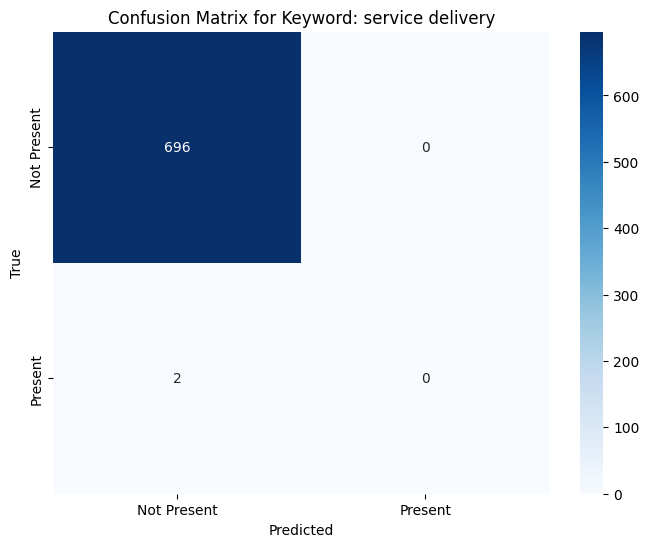

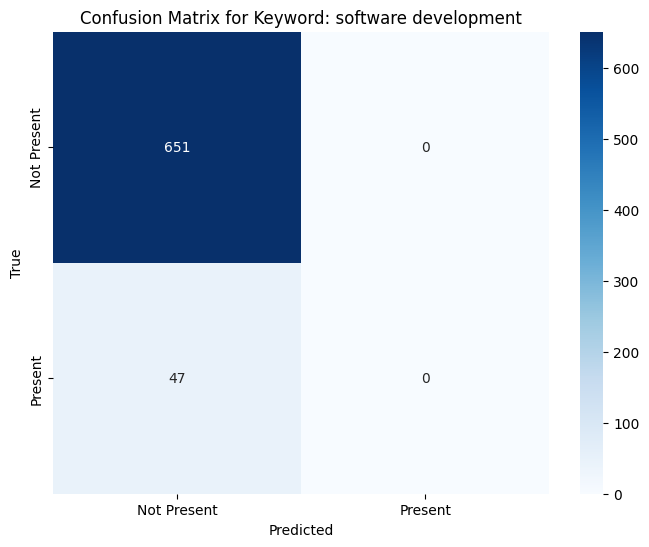

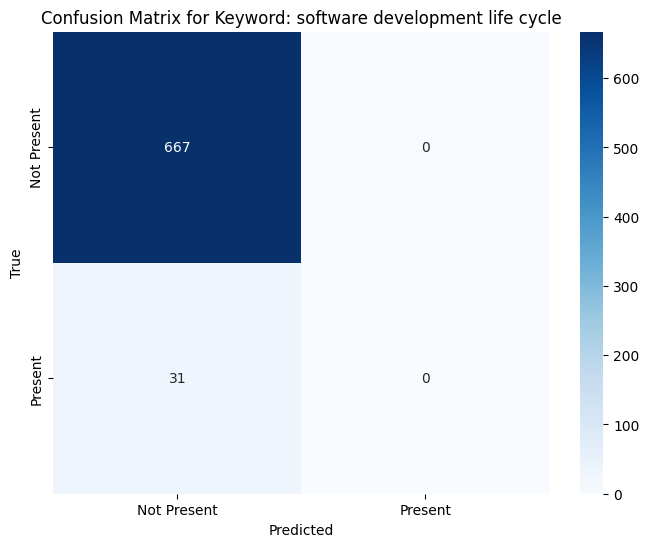

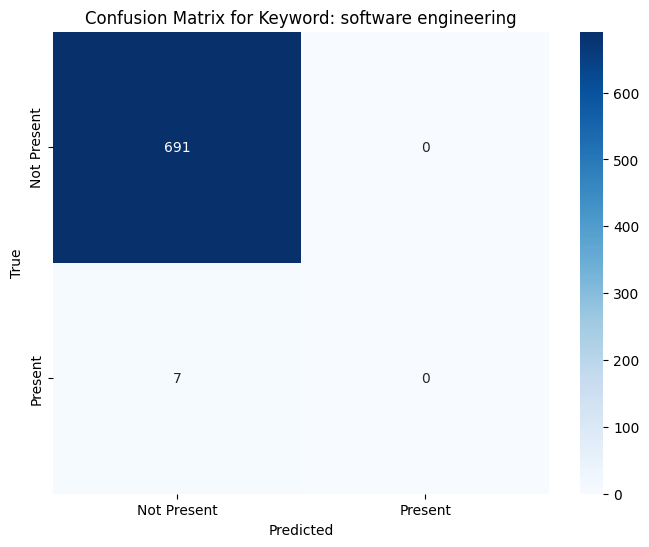

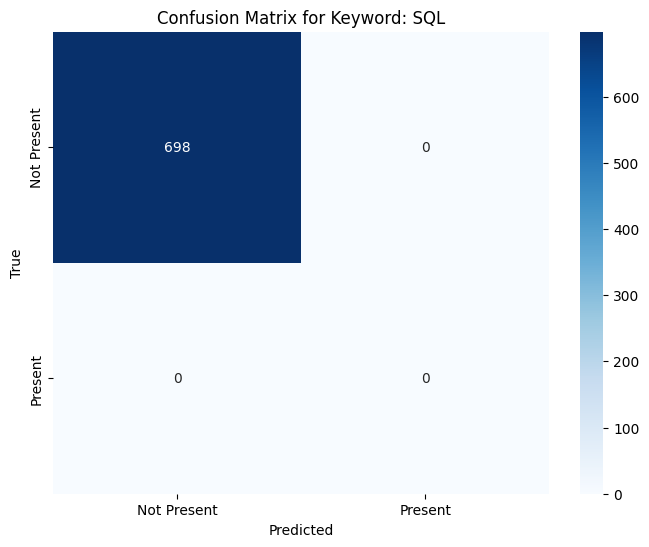

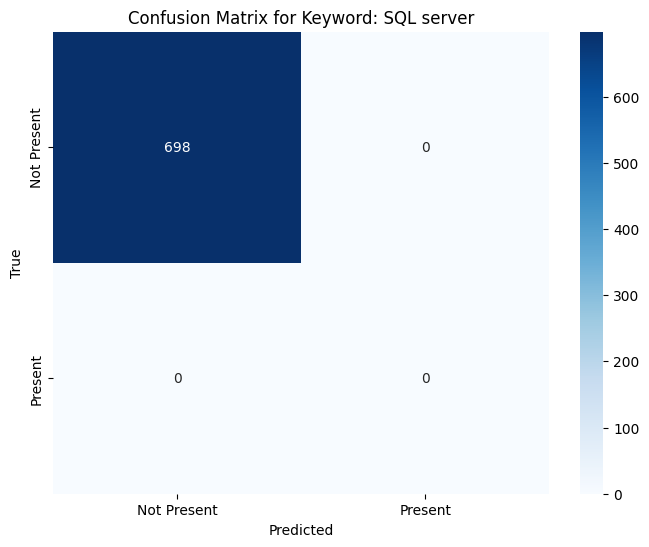

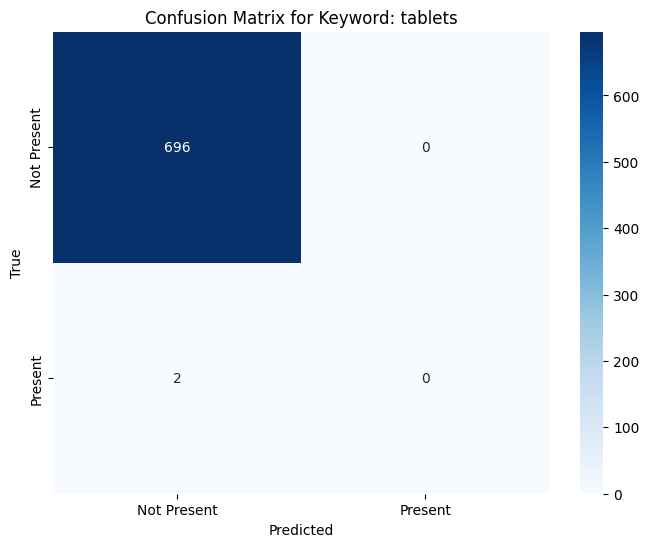

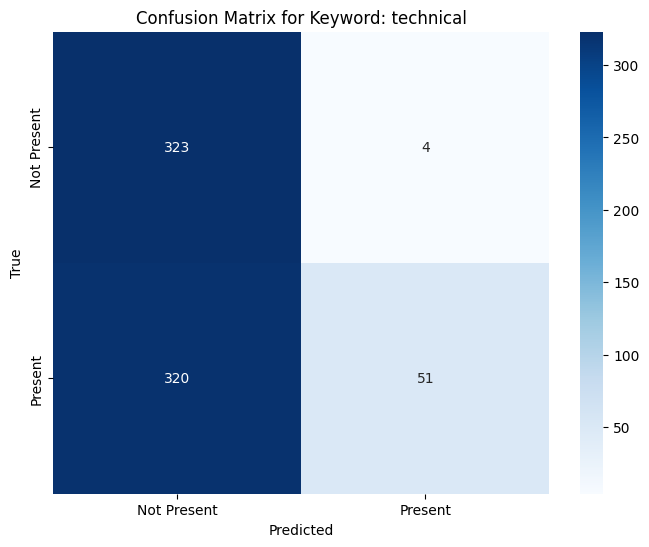

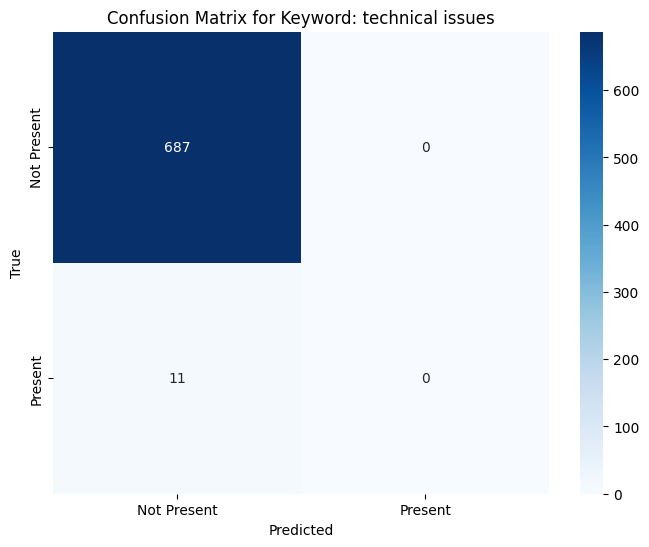

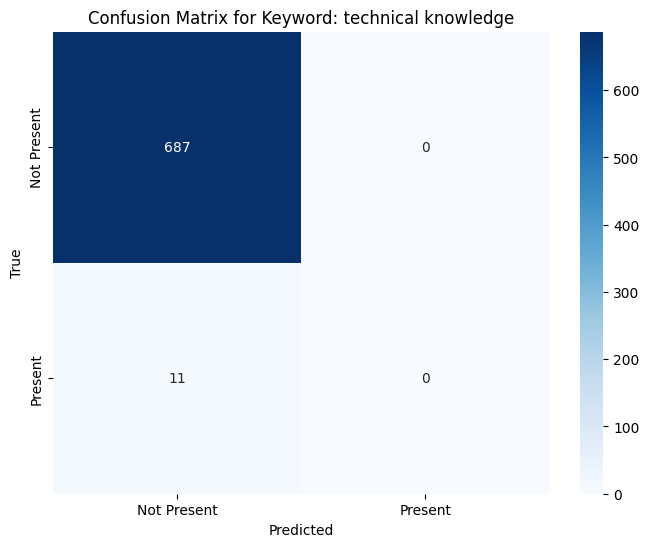

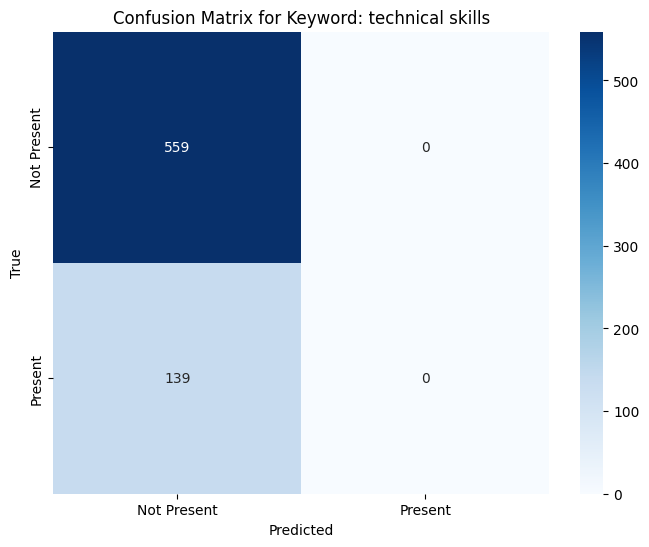

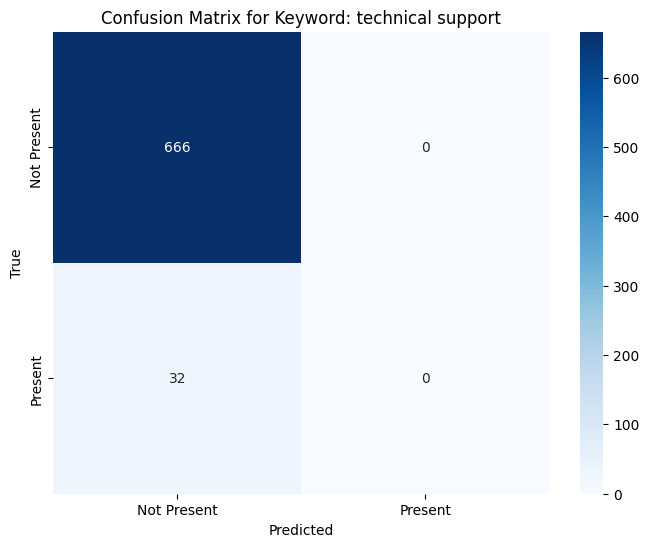

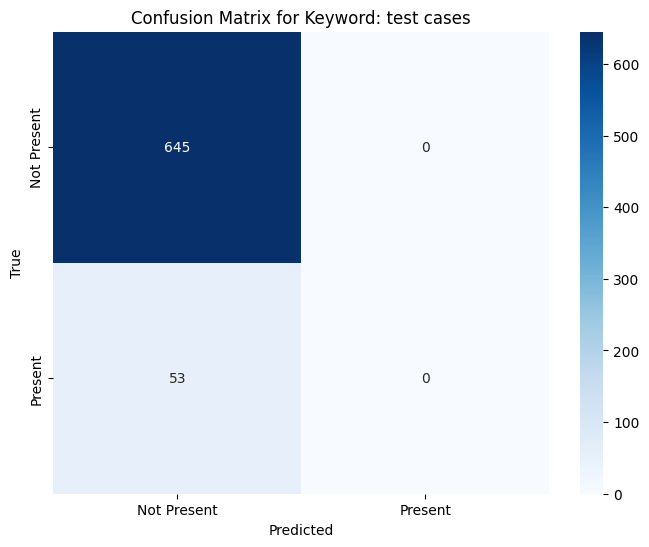

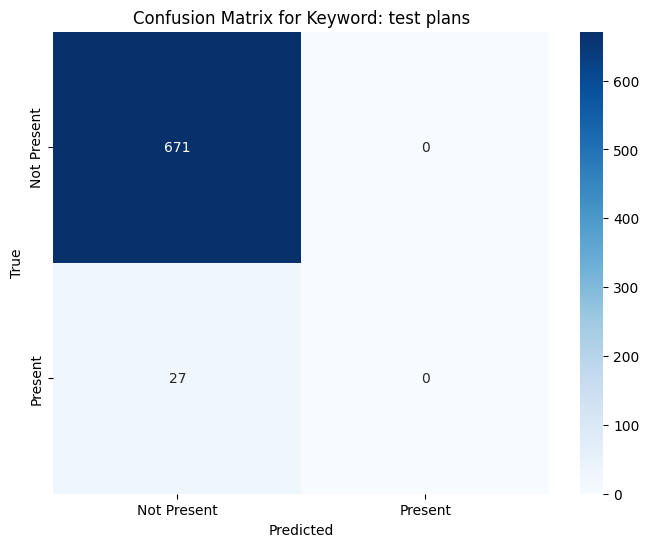

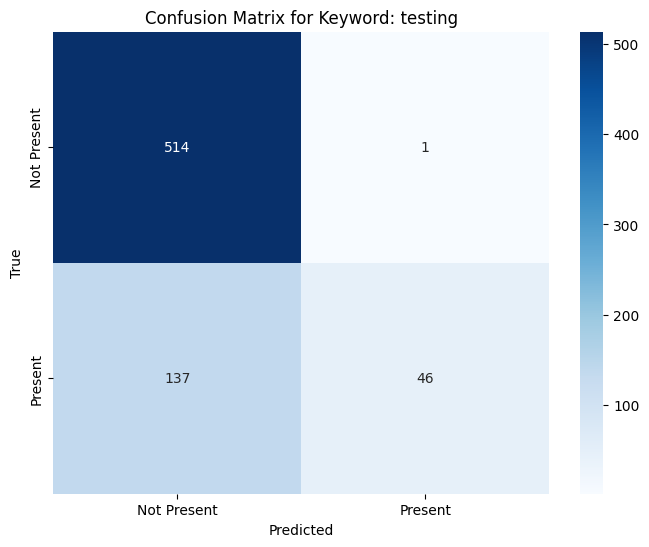

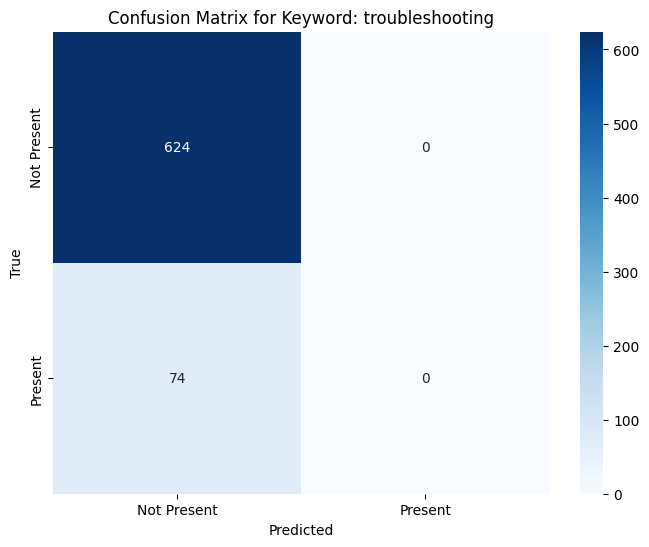

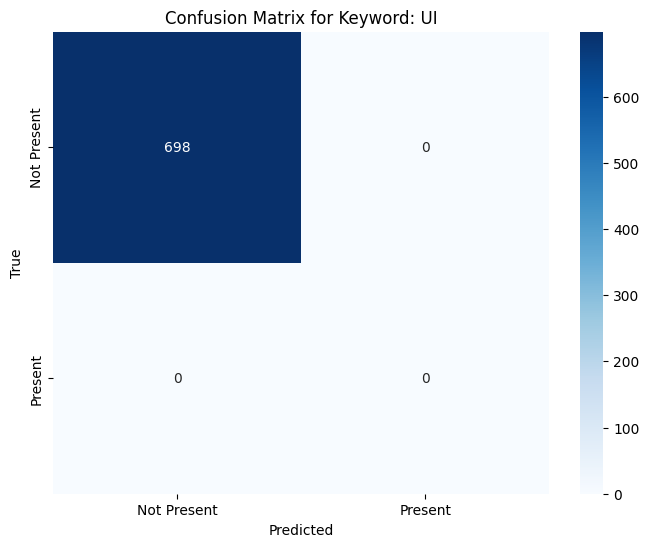

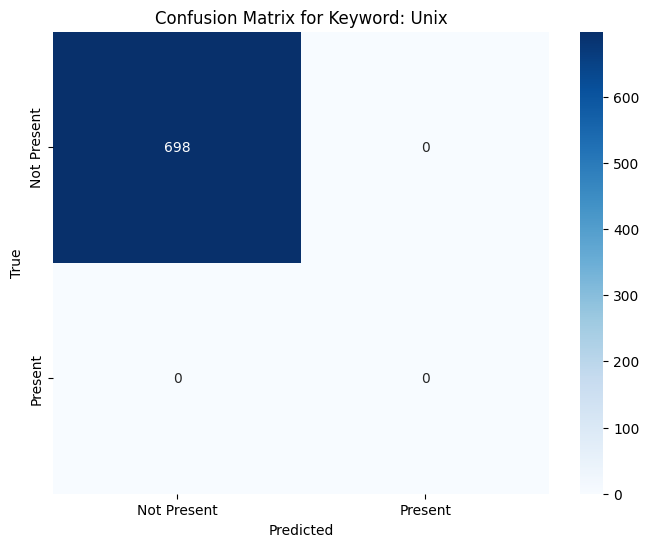

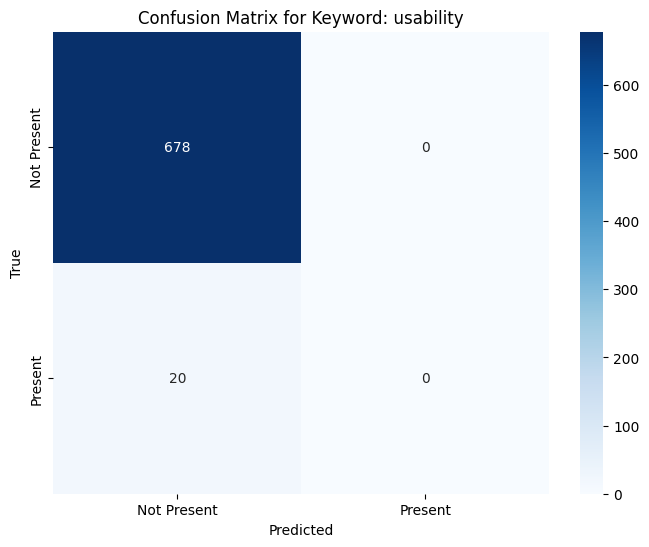

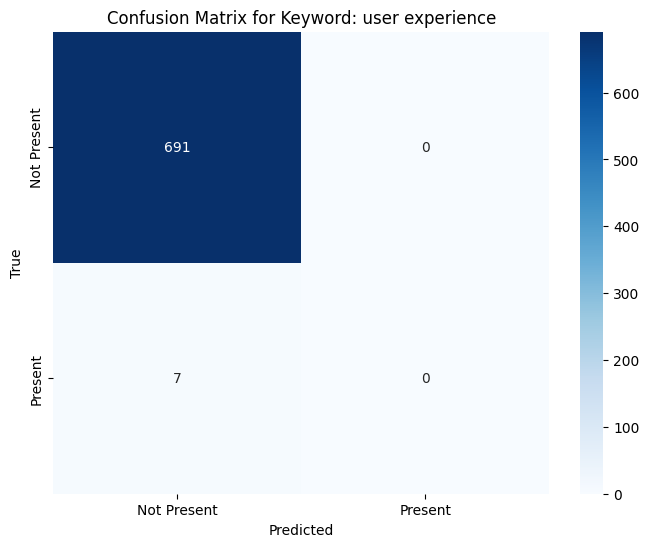

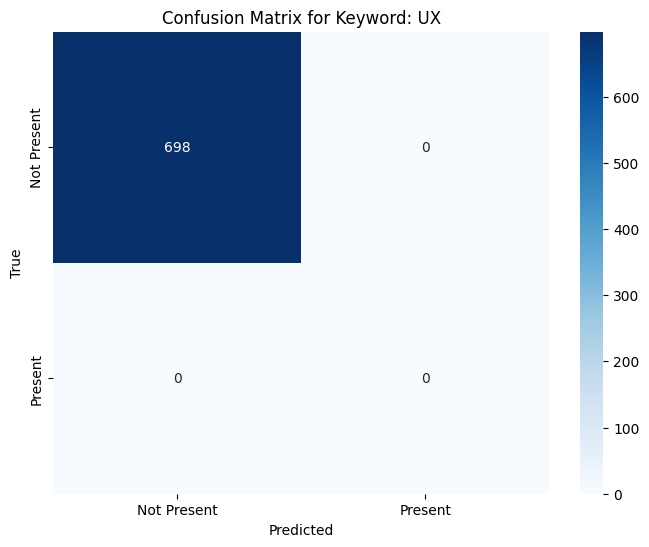

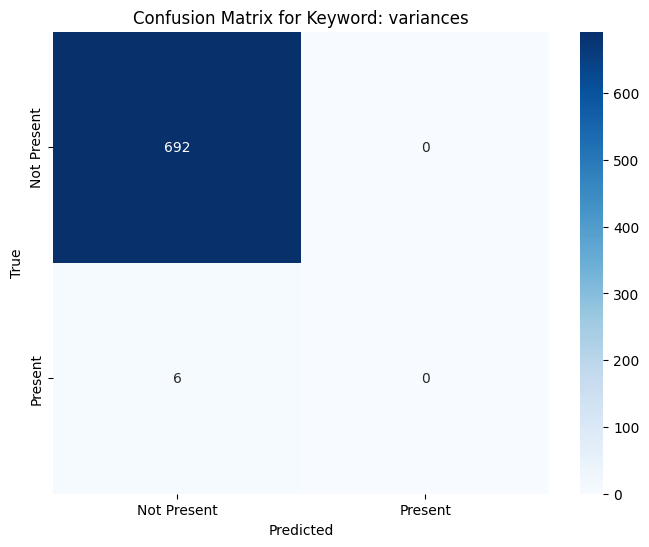

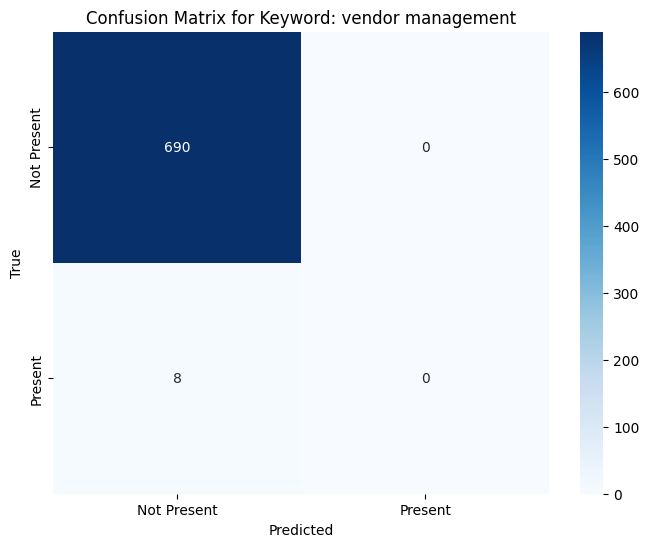

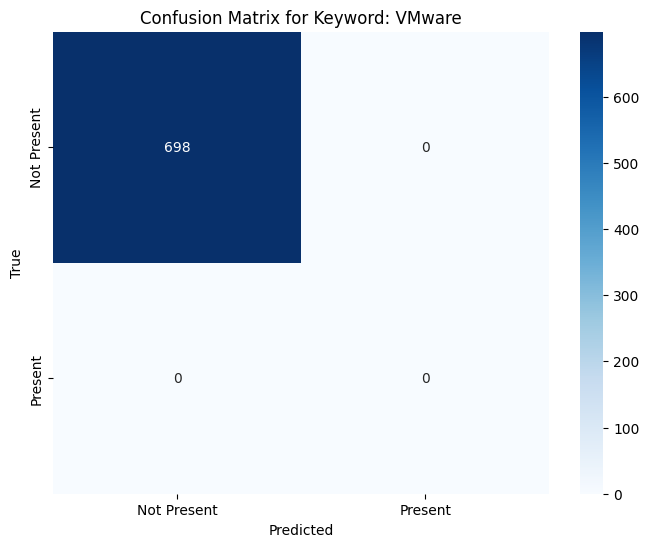

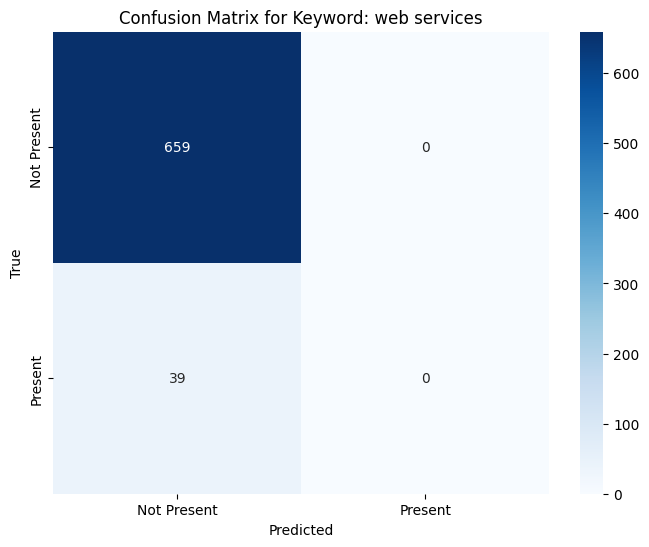

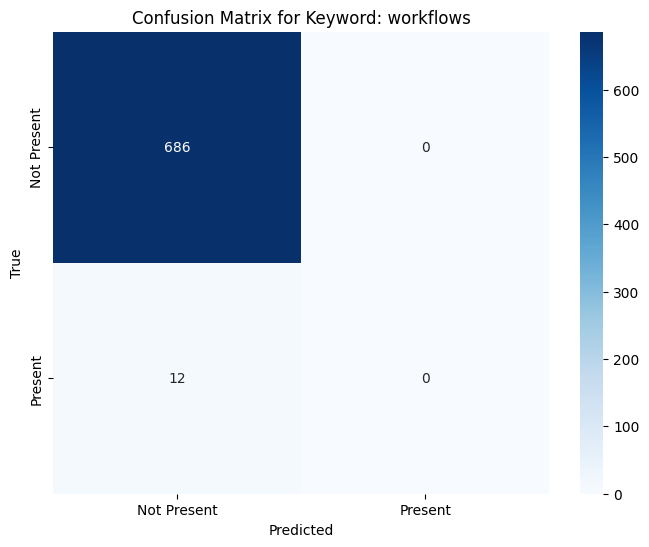

In [63]:
def plot_confusion_matrix(cm, keyword):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Present', 'Present'],
                yticklabels=['Not Present', 'Present'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Keyword: {keyword}')
    plt.show()

# Plot confusion matrices for each keyword
for i, (conf_matrix, keyword) in enumerate(zip(conf_matrices, keywords)):
    plot_confusion_matrix(conf_matrix, keyword)

##Matching keywords

In [66]:
# Function to find matched and unmatched keywords in each CV
def check_keywords_in_cv(text, keywords):
    # Ensure text and keywords are strings
    text = str(text)
    keywords = [str(keyword) for keyword in keywords]

    matched = [keyword for keyword in keywords if keyword.lower() in text.lower()]
    unmatched = [keyword for keyword in keywords if keyword.lower() not in text.lower()]
    return matched, unmatched

##Check cv text in each test set

In [67]:
for i, text in enumerate(cv_texts[:len(X_test)]):  # Limit to the test set size
    matched, unmatched = check_keywords_in_cv(text, keywords)
    print(f"\nCV {i+1}:")
    print(f"Matched Keywords: {matched}")
    print(f"Unmatched Keywords: {unmatched}")


CV 1:
Matched Keywords: ['certification', 'LAN', 'mechanical engineering', 'mobile', 'OS', 'SAS', 'testing', 'UI']
Unmatched Keywords: ['.NET', 'algorithms', 'android', 'architecture', 'architectures', 'audio', 'AutoCAD', 'AWS', 'big data', 'business analysis', 'business continuity', 'C (programming language)', 'C#', 'C++', 'CAD', 'Cisco', 'cloud', 'compliance', 'computer applications', 'computer science', 'controls', 'CSS', 'D (programming language)', 'data center', 'data collection', 'data entry', 'data management', 'database', 'datasets', 'design', 'development activities', 'digital marketing', 'digital media', 'distribution', 'DNS', 'ecommerce', 'e-commerce', 'end user', 'experimental', 'experiments', 'frameworks', 'front-end', 'GIS', 'graphic design', 'hardware', 'HTML5', 'I-DEAS', 'information management', 'information security', 'information technology', 'intranet', 'iOS', 'iPhone', 'IT infrastructure', 'ITIL', 'Java', 'Javascript', 'JIRA', 'licensing', 'Linux', 'machine learni

##Model 9 doubling the LSTM models

In [68]:
model_9 = Sequential([
    Embedding(input_dim=input_dim, output_dim=128),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dense(output_dim, activation = 'sigmoid')
    ])

##Compiling the model

In [69]:
model_9.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

##Training and saving the model

In [70]:
history_model_9 = model_9.fit(
    X_train, y_train,
    epochs = 10,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
)

#Saving the model
model_9.save('model_9.keras')
with open('history_model_9.json', 'w') as f:
    json.dump(history_model_9.history, f)

##Model summary

In [71]:
model_9.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 1000, 128)           │       5,120,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 123)                 │          31,611 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,244,339 (61.97 MB)

 Trainable params: 5,414,779 (20.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,829,560 (41.31 MB)

##Reloading the model

In [72]:
model_9 = tf.keras.models.load_model('model_9.keras')
with open('history_model_9.json') as f:
    history_model_9 = json.load(f)

##Plotting the training

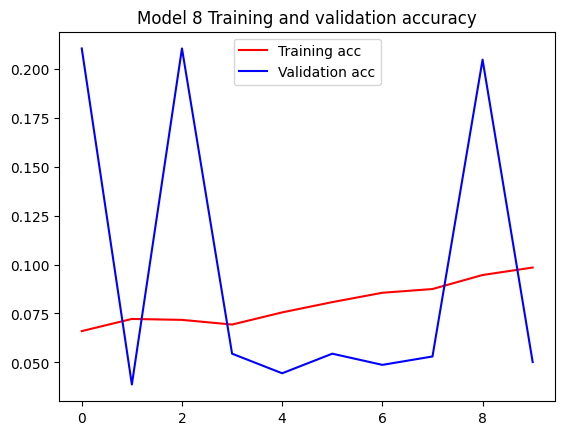

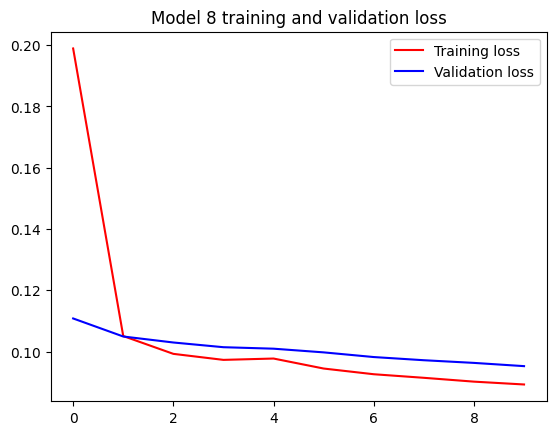

In [73]:
acc = history_model_9['accuracy']
val_acc = history_model_9['val_accuracy']
loss = history_model_9['loss']
val_loss = history_model_9['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Model 8 Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Model 8 training and validation loss')
plt.legend()

plt.show()

##Making a prediction

In [74]:
y_pred_prob = model_9.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step


##Predictions to binary

In [75]:
threshold = 0.85
y_pred = (y_pred_prob > threshold).astype(int)

##Calculating the matrix

In [76]:
# Compute confusion matrices for each class
conf_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Print confusion matrices
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for Keyword {i}:")
    print(conf_matrix)
    print()

Confusion Matrix for Keyword 0:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 1:
[[688   0]
 [ 10   0]]

Confusion Matrix for Keyword 2:
[[676   0]
 [ 22   0]]

Confusion Matrix for Keyword 3:
[[622   0]
 [ 76   0]]

Confusion Matrix for Keyword 4:
[[688   0]
 [ 10   0]]

Confusion Matrix for Keyword 5:
[[691   0]
 [  7   0]]

Confusion Matrix for Keyword 6:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 7:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 8:
[[690   0]
 [  8   0]]

Confusion Matrix for Keyword 9:
[[680   0]
 [ 18   0]]

Confusion Matrix for Keyword 10:
[[692   0]
 [  6   0]]

Confusion Matrix for Keyword 11:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 12:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 13:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 14:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 15:
[[598   0]
 [100   0]]

Confusion Matrix for Keyword 16:
[[698   0]
 [  0   0]]

Confusion Matrix for Keyword 17:
[[655   

##Visualising the matrix

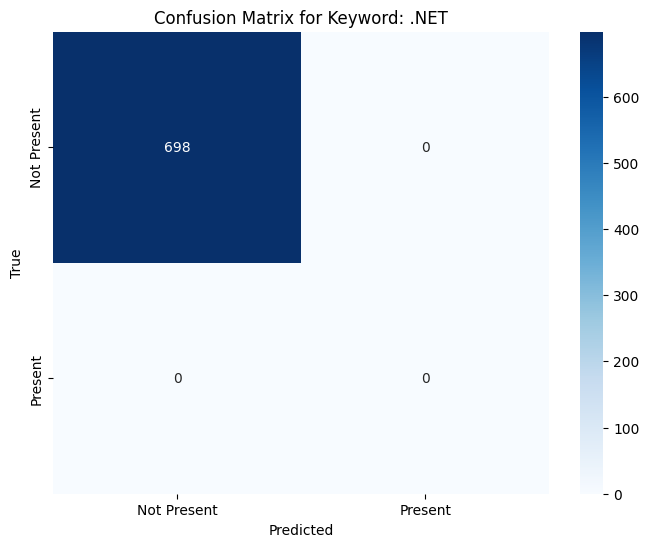

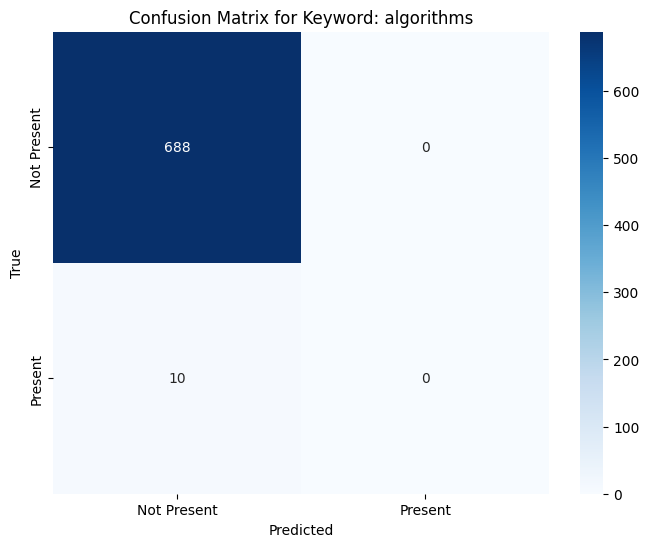

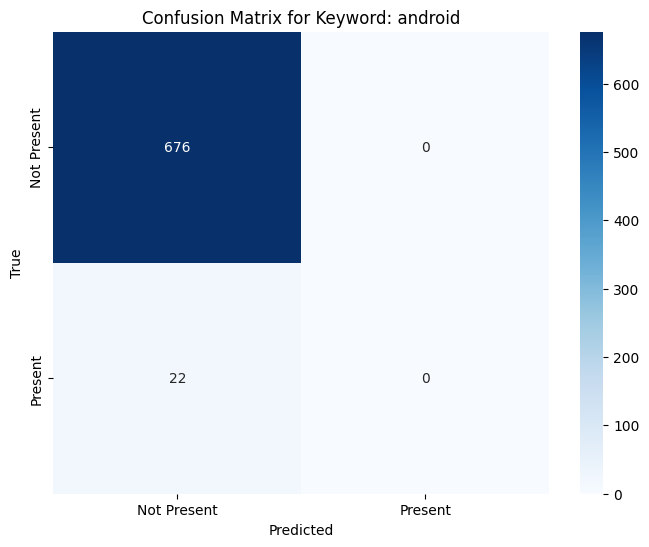

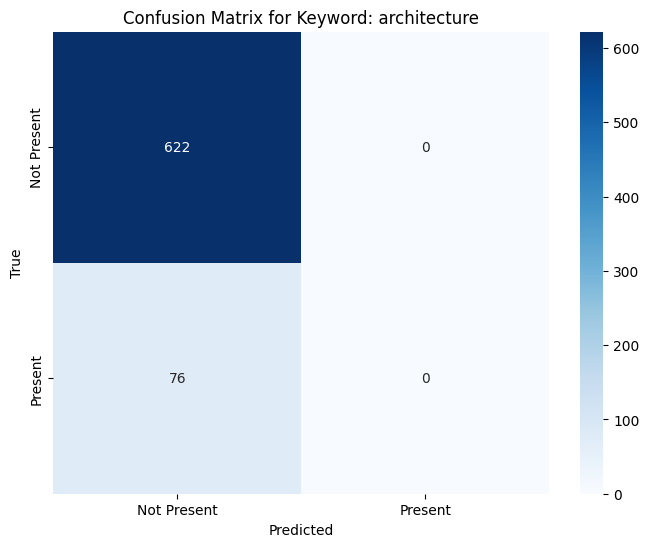

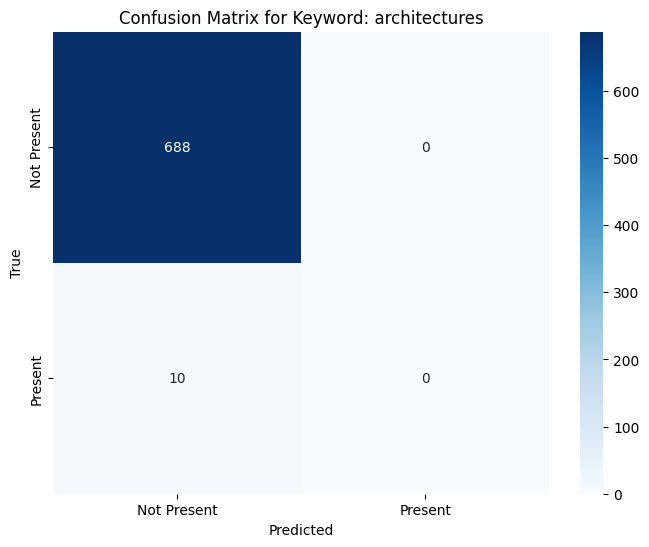

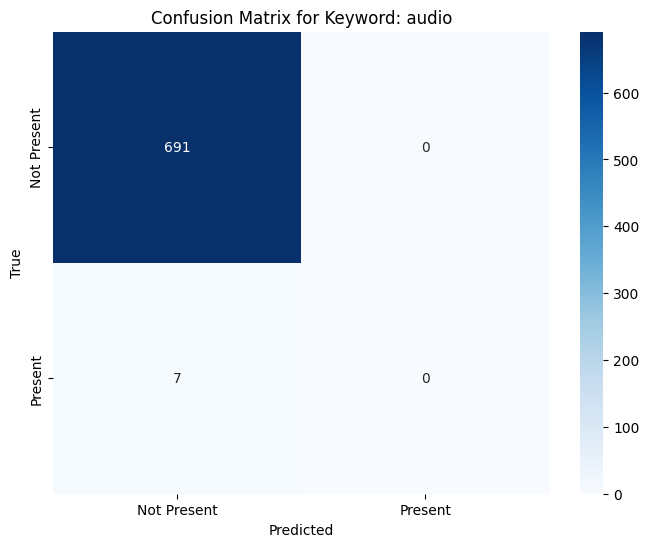

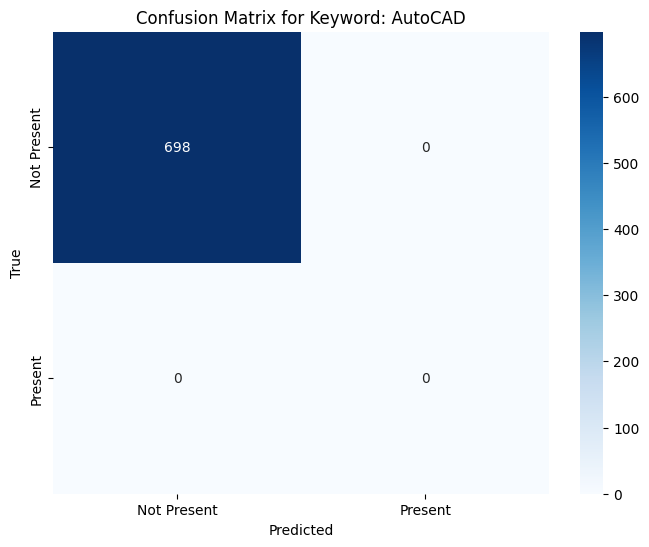

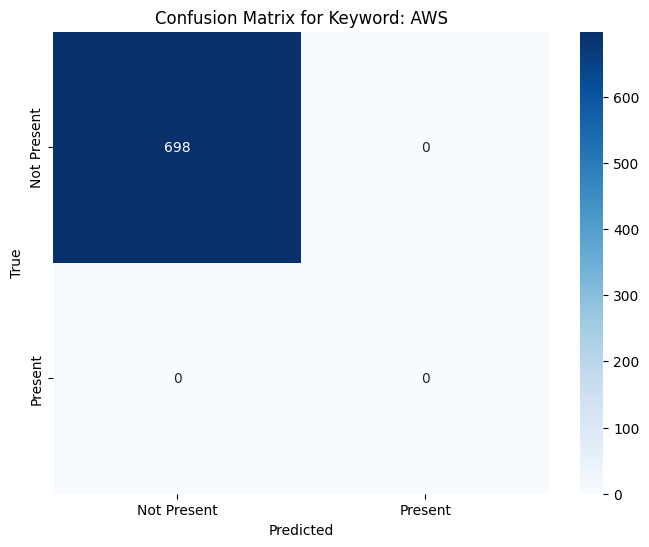

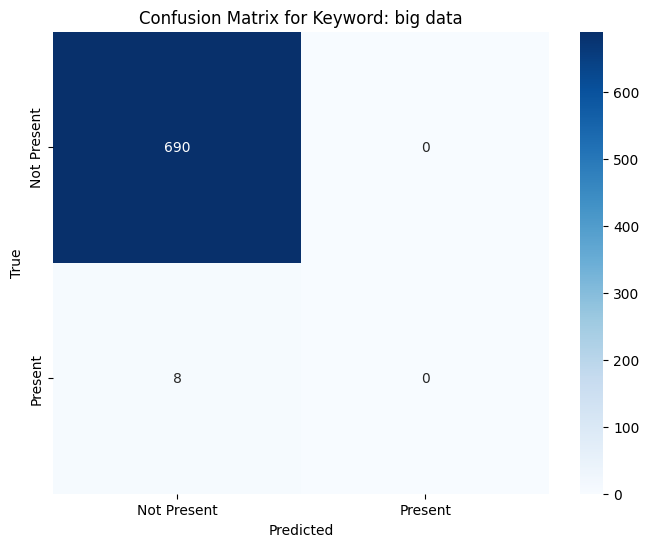

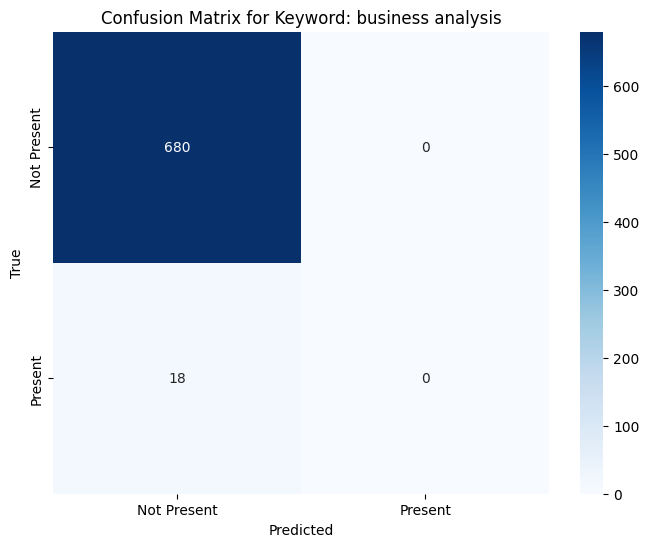

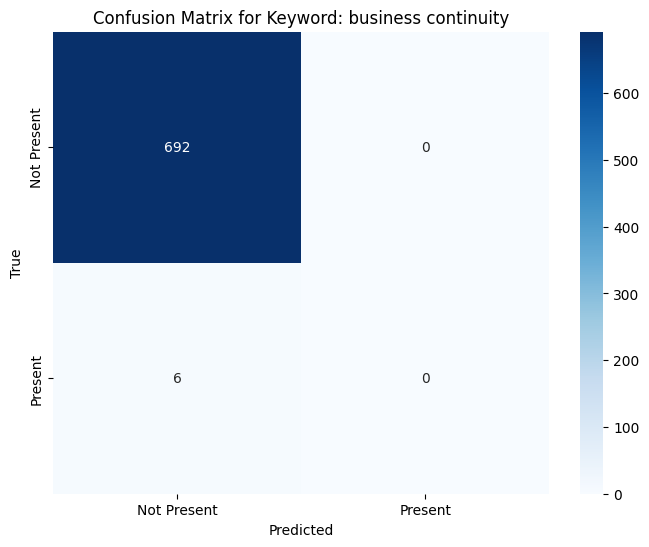

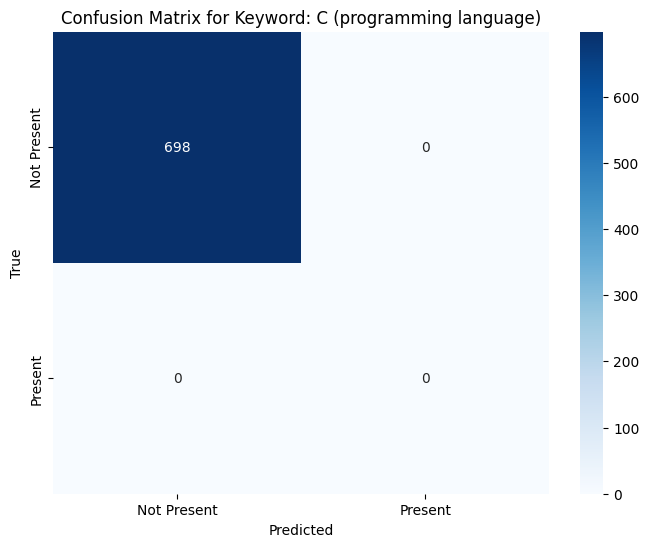

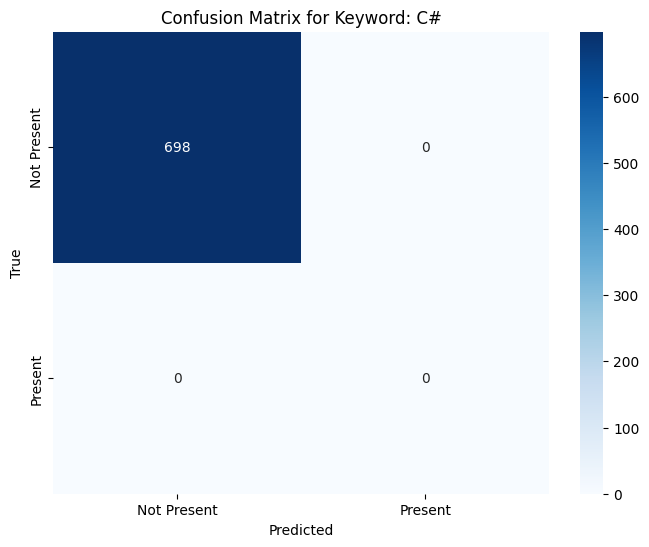

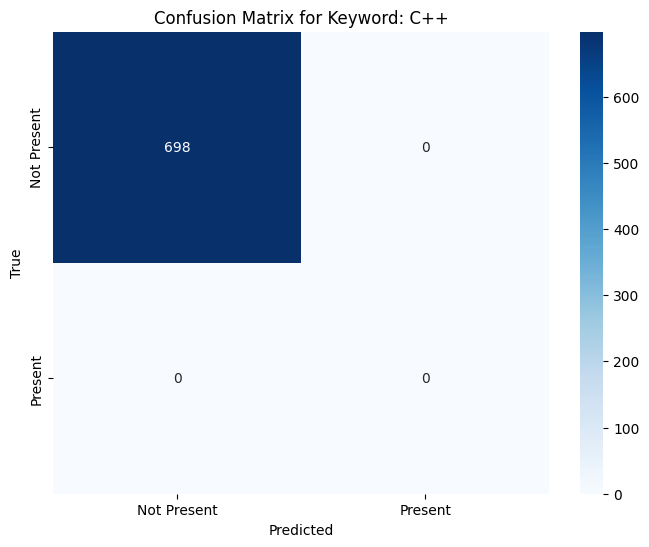

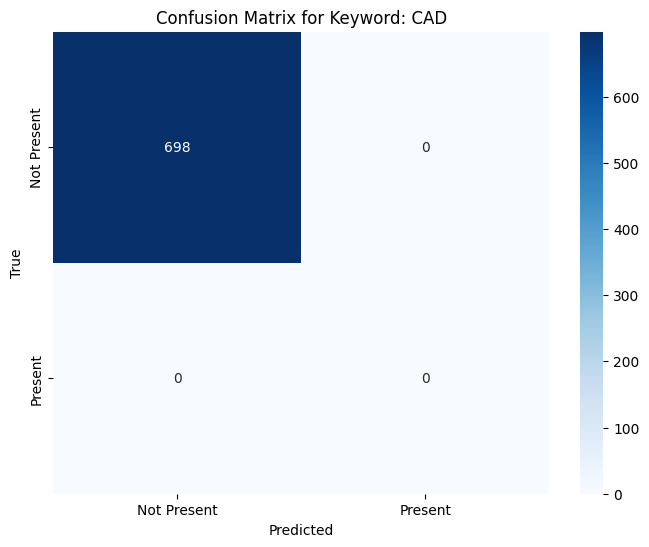

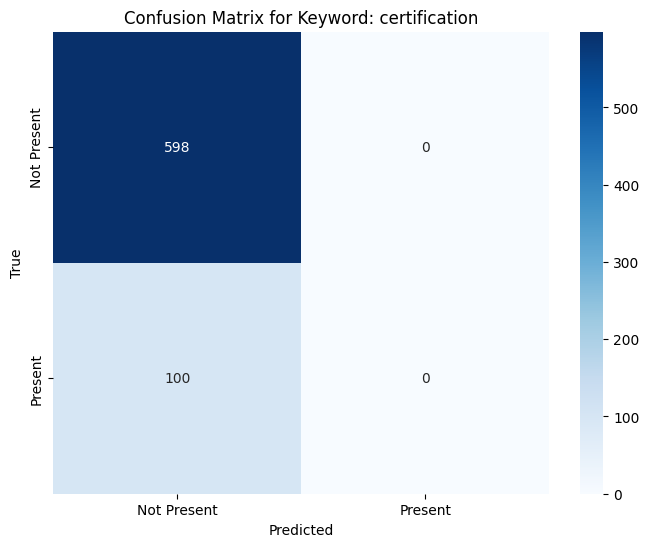

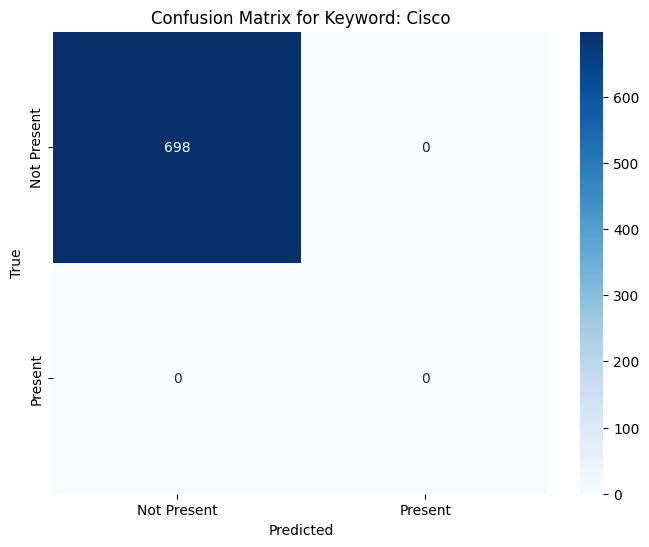

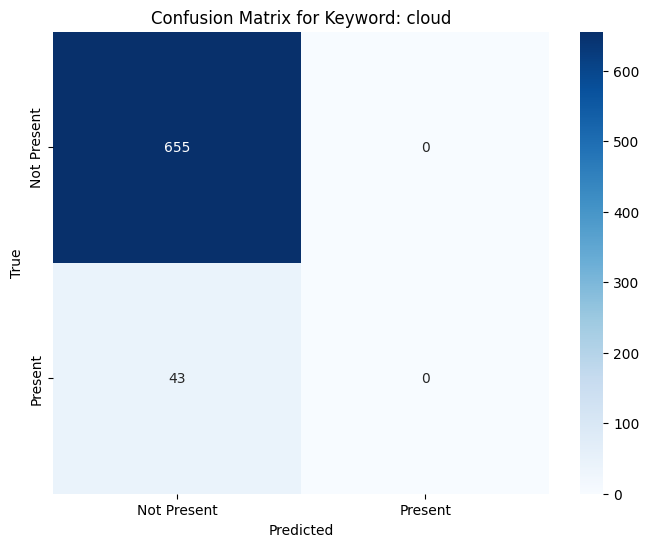

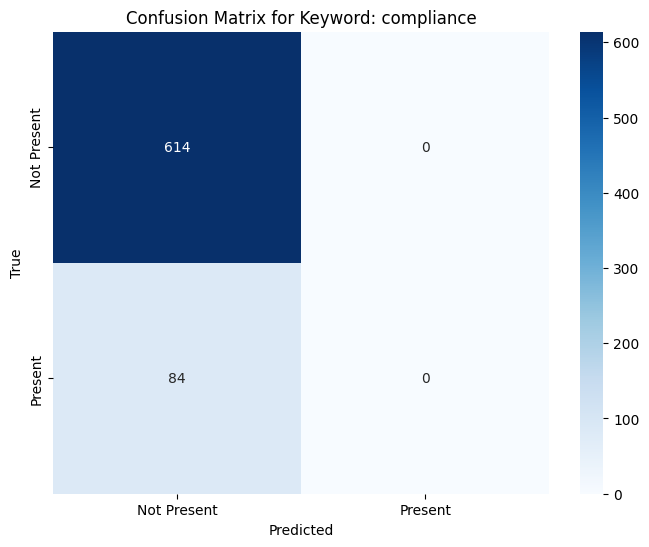

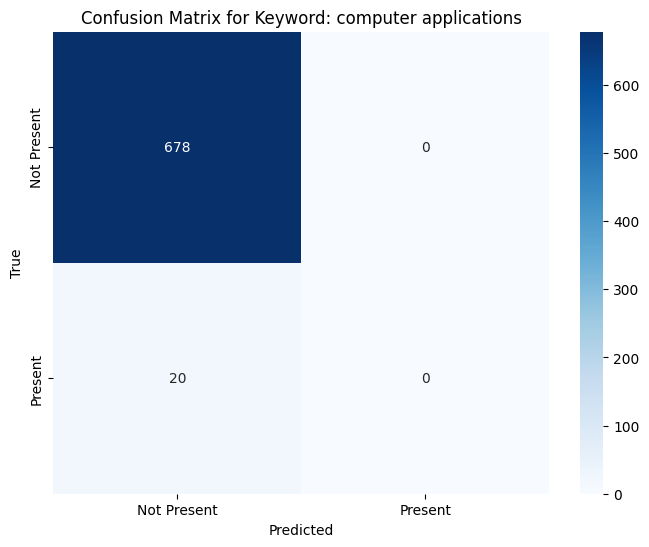

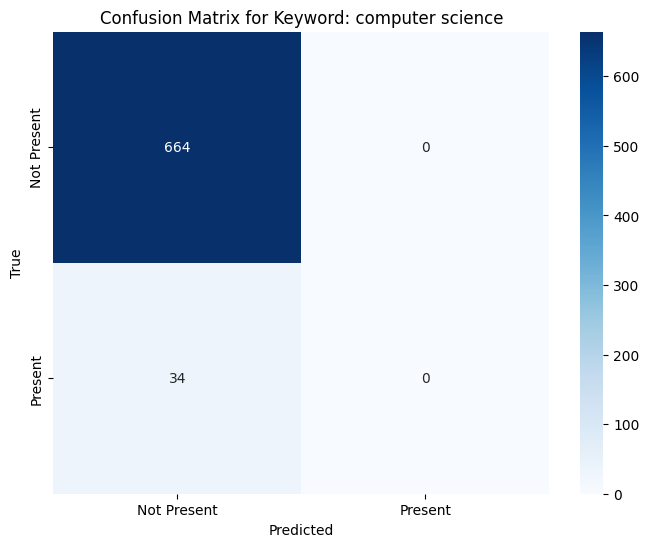

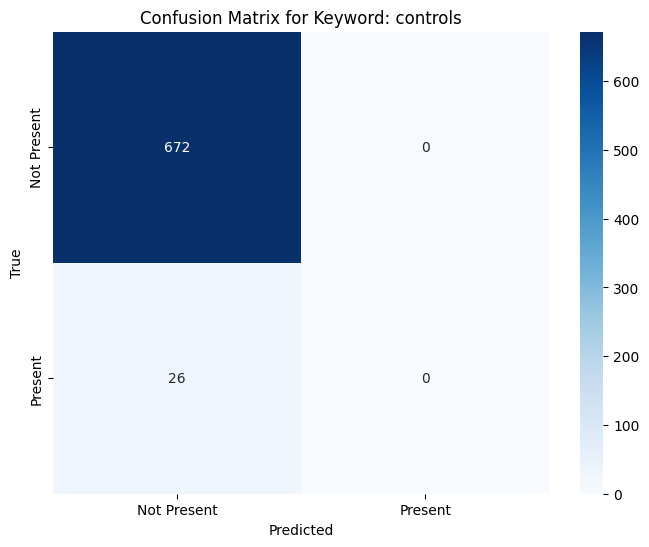

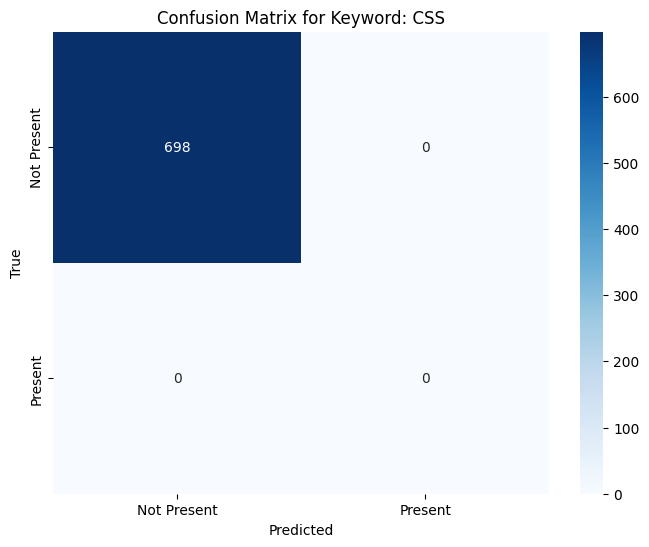

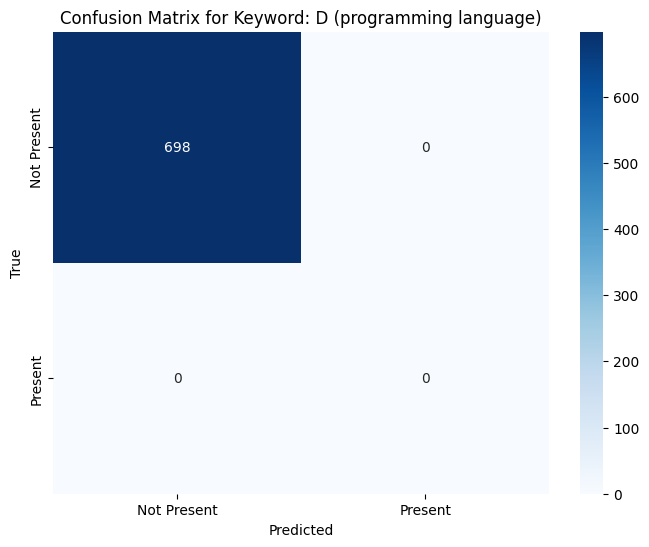

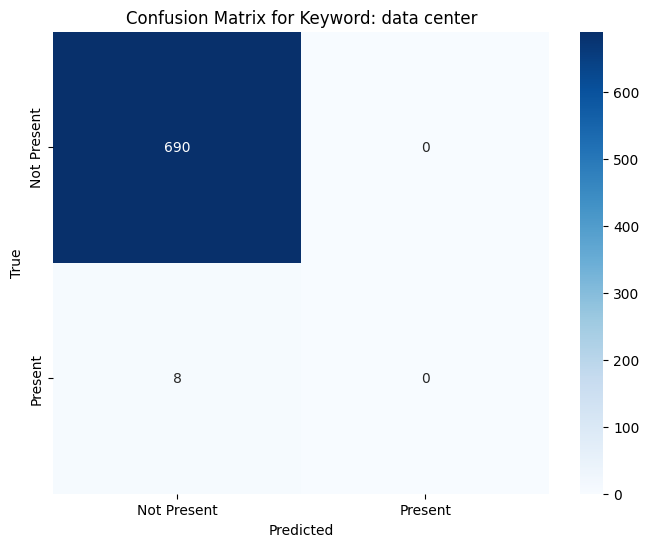

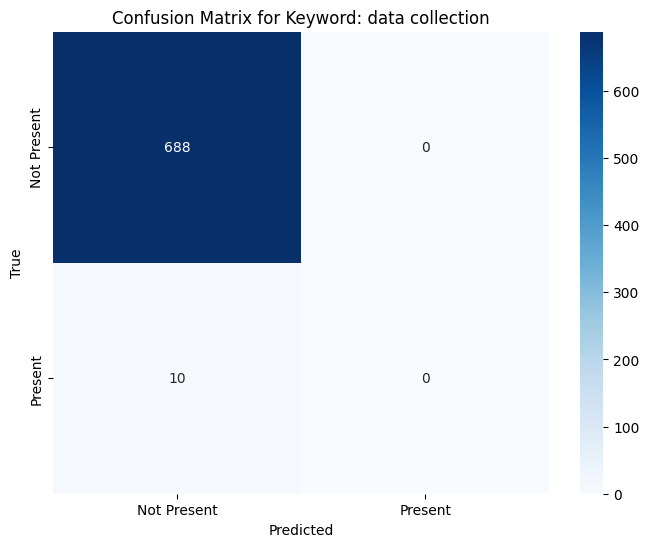

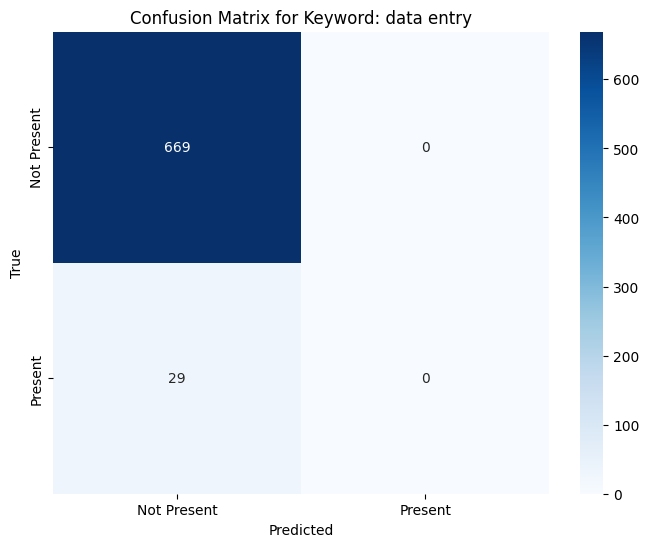

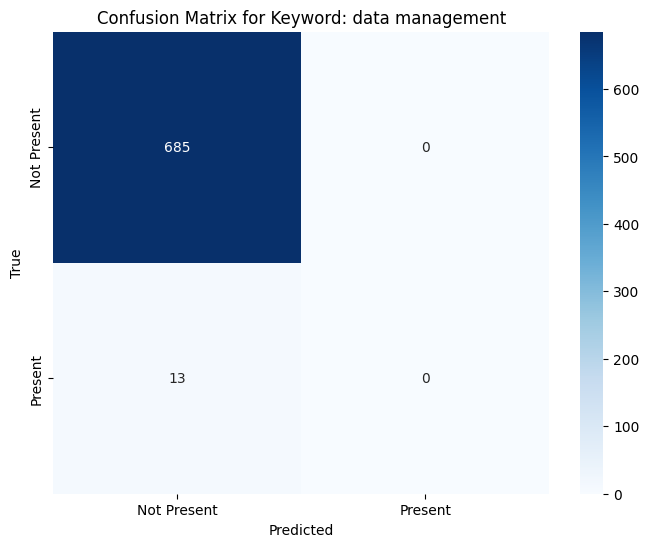

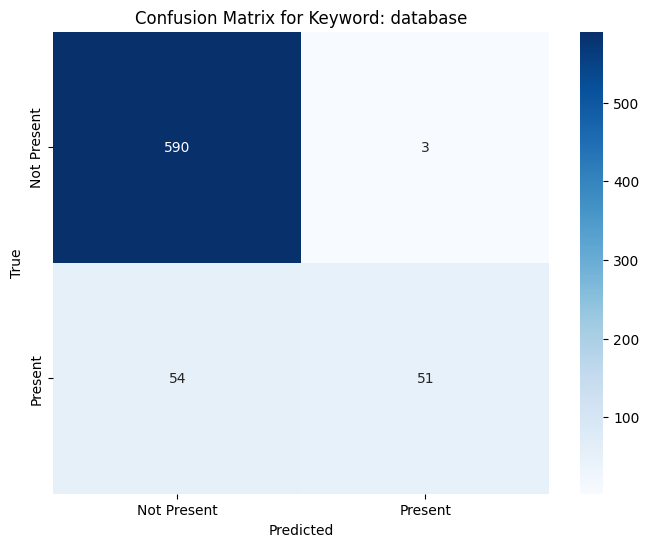

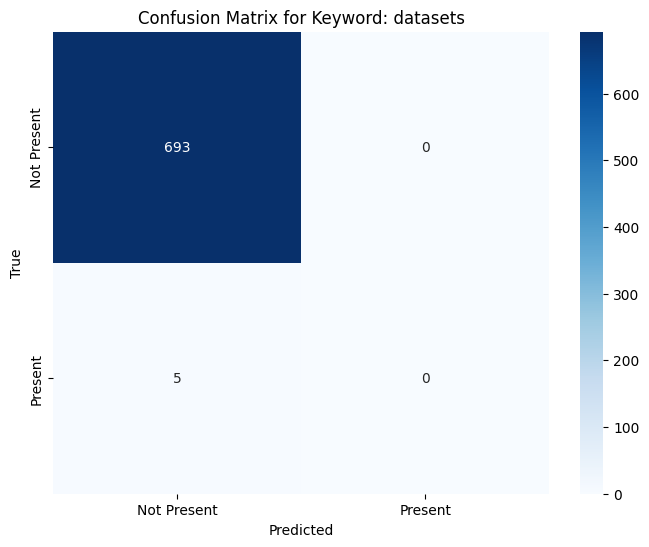

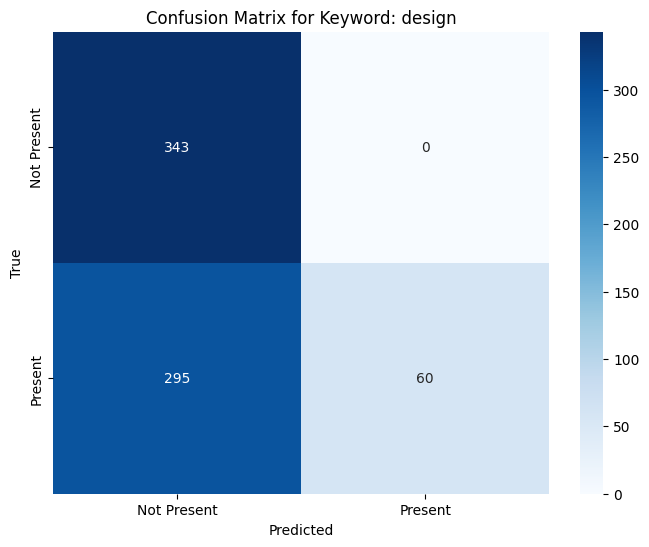

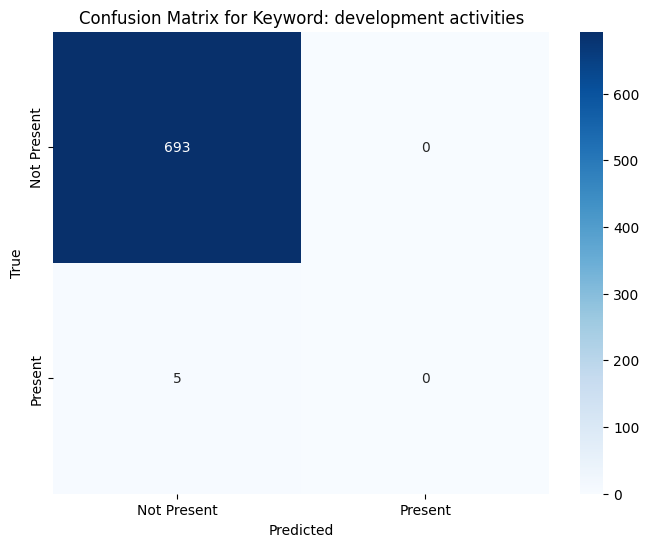

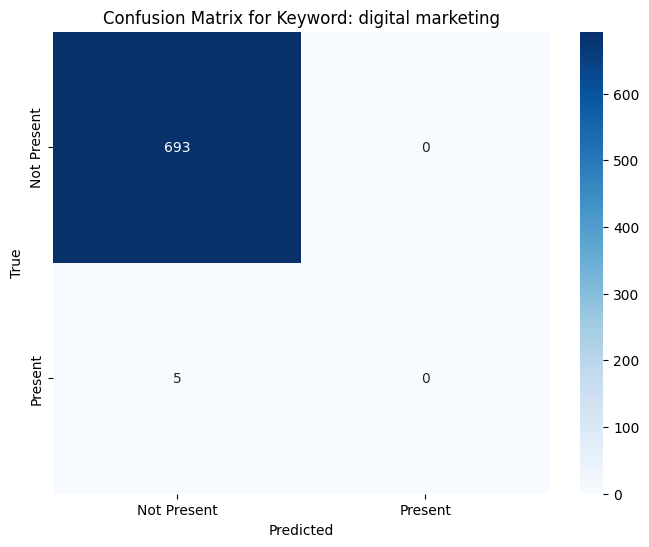

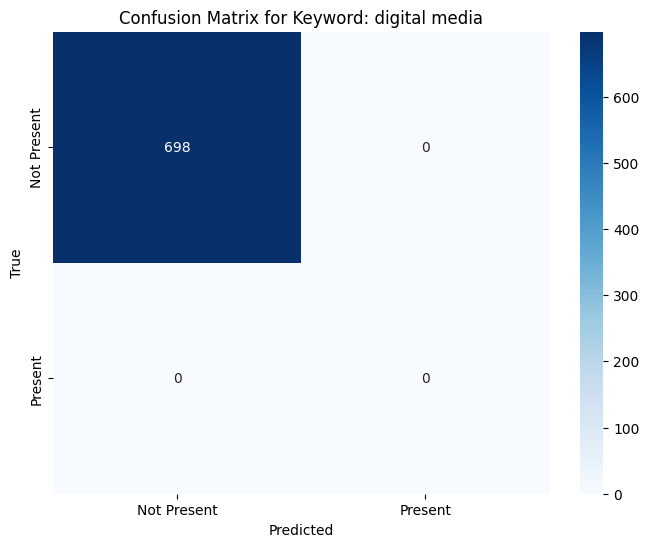

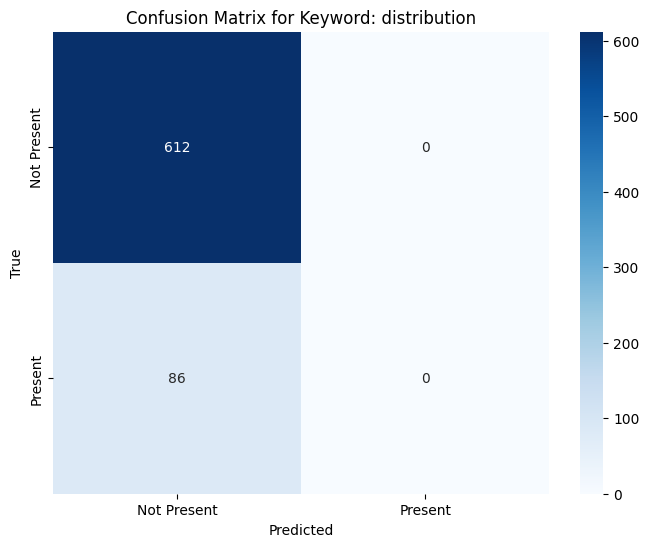

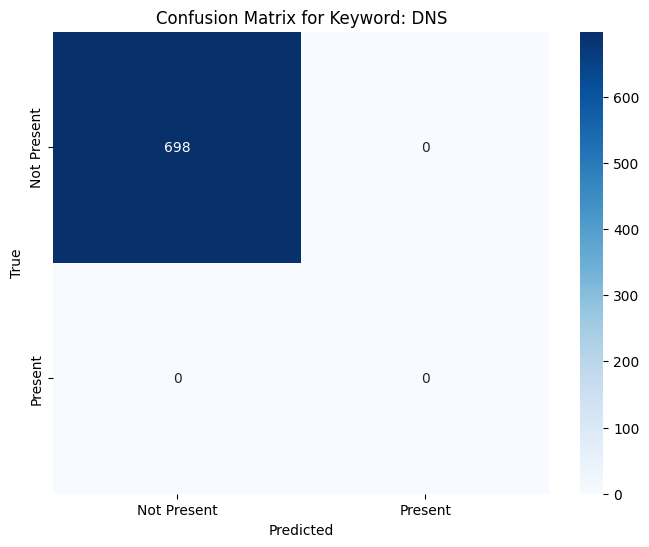

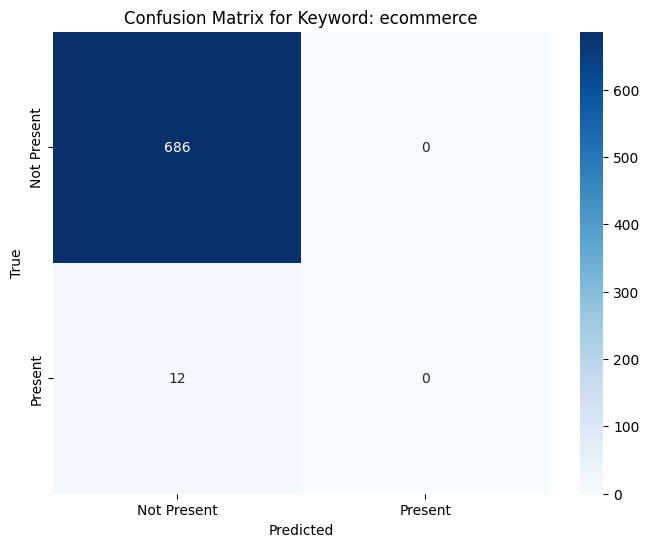

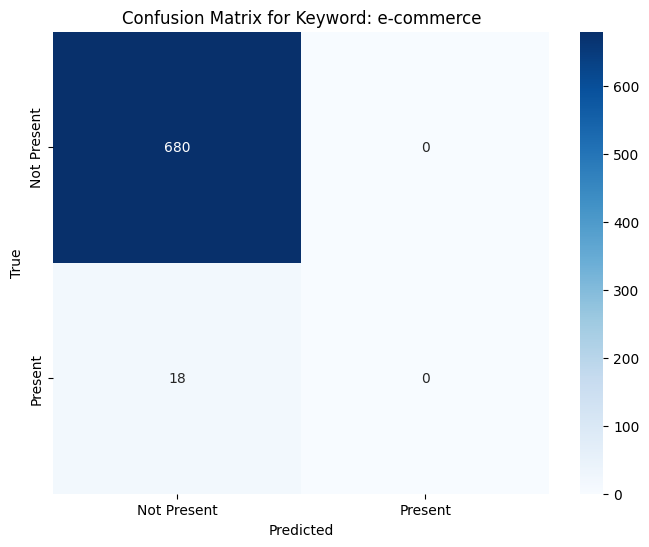

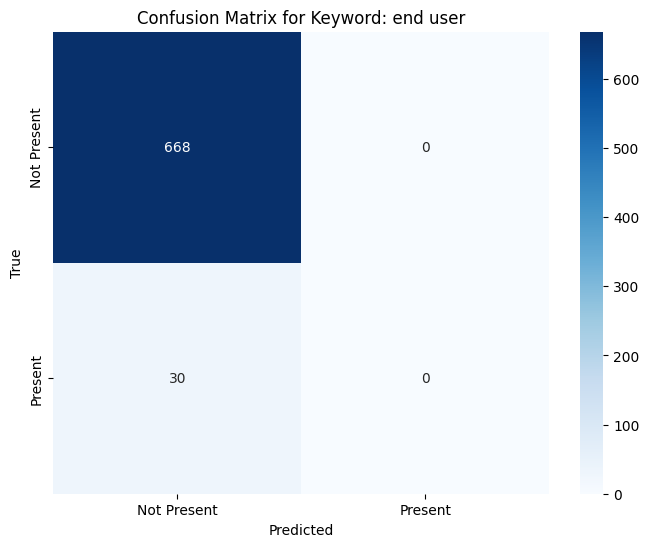

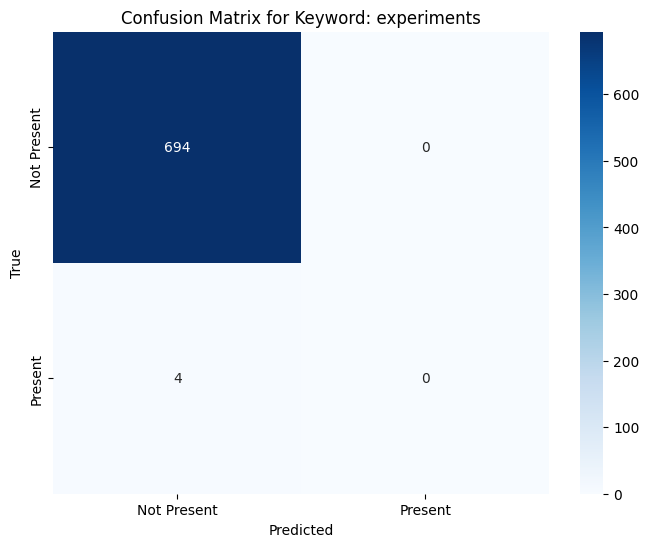

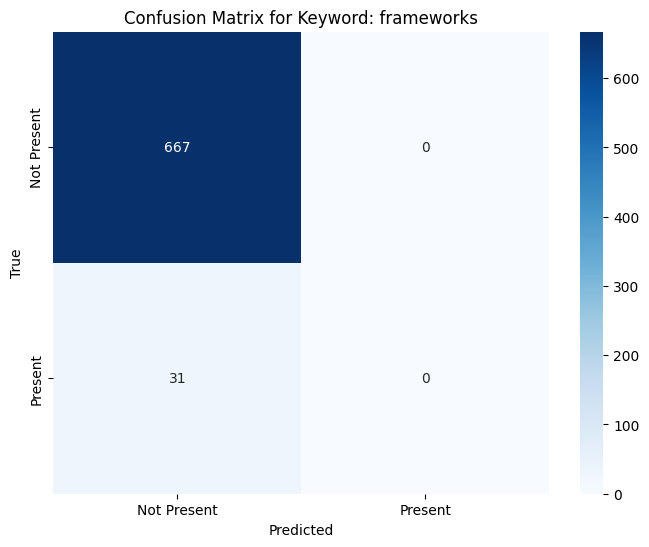

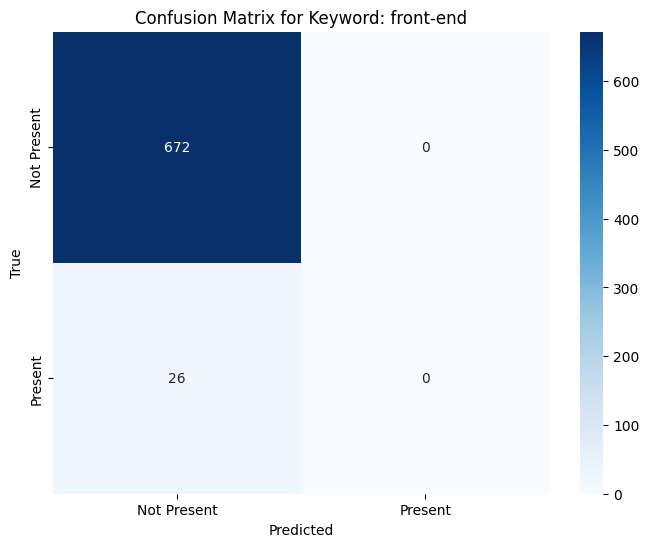

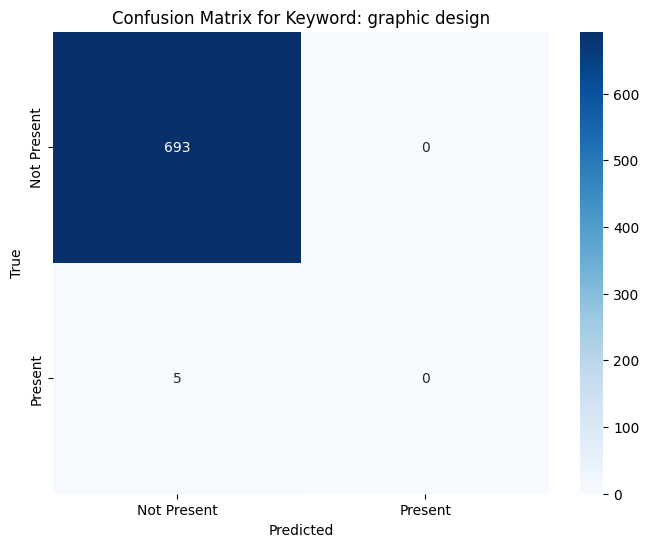

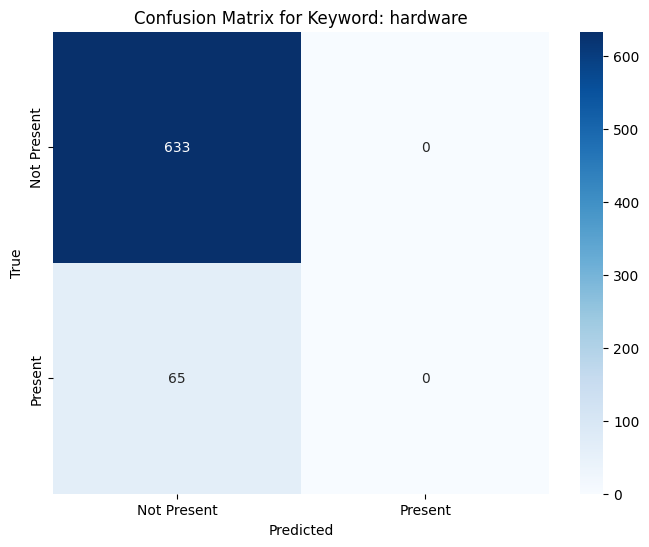

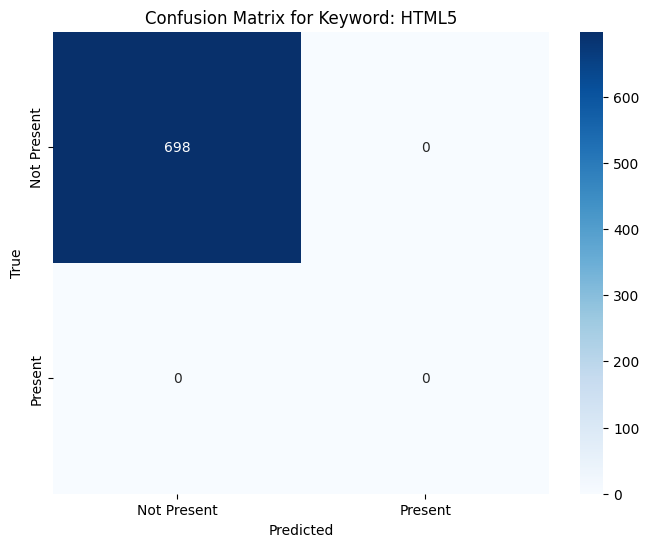

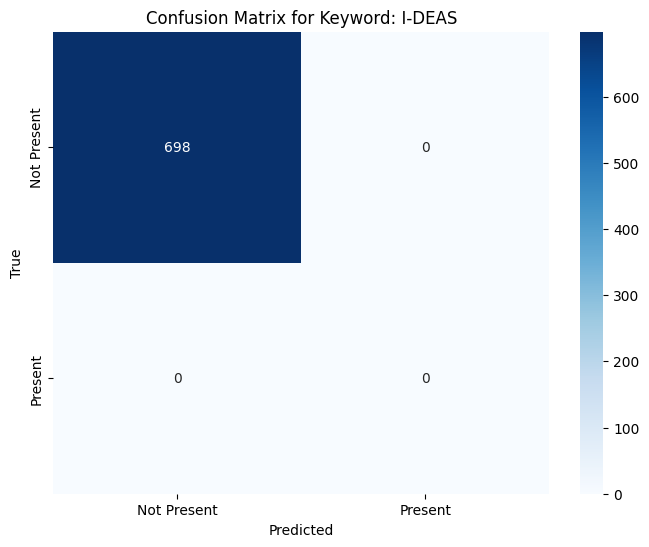

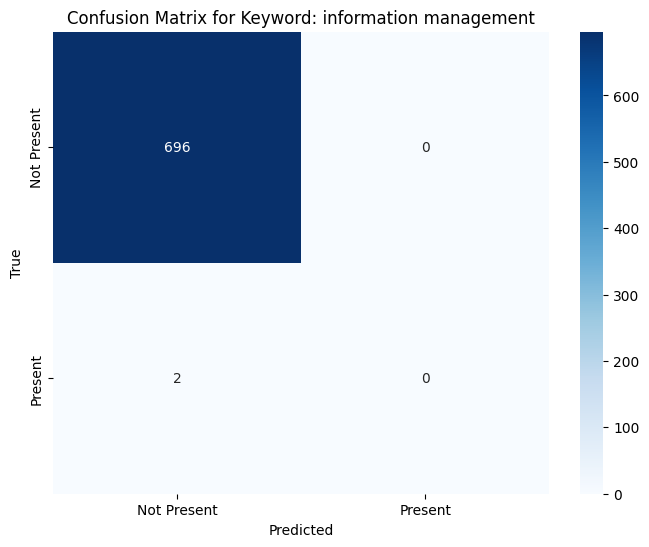

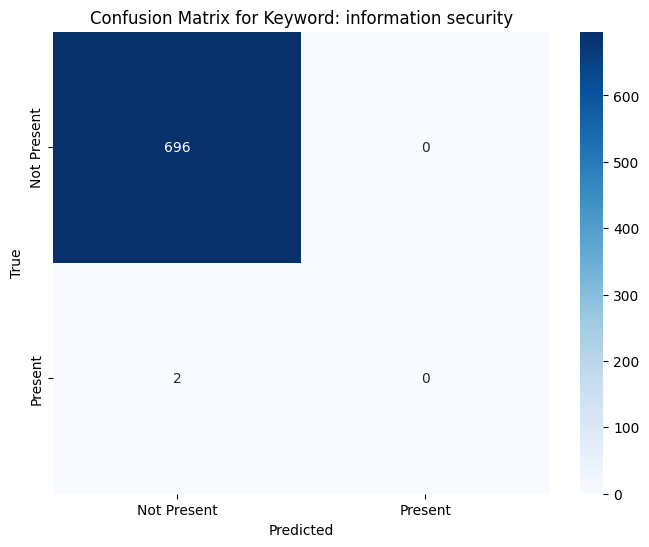

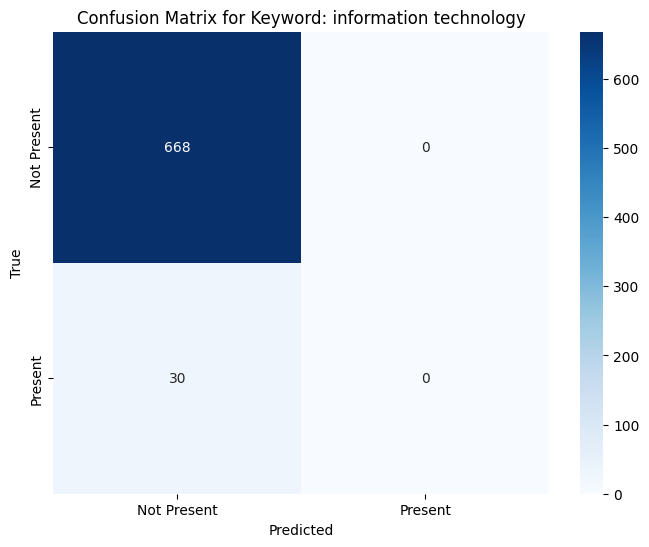

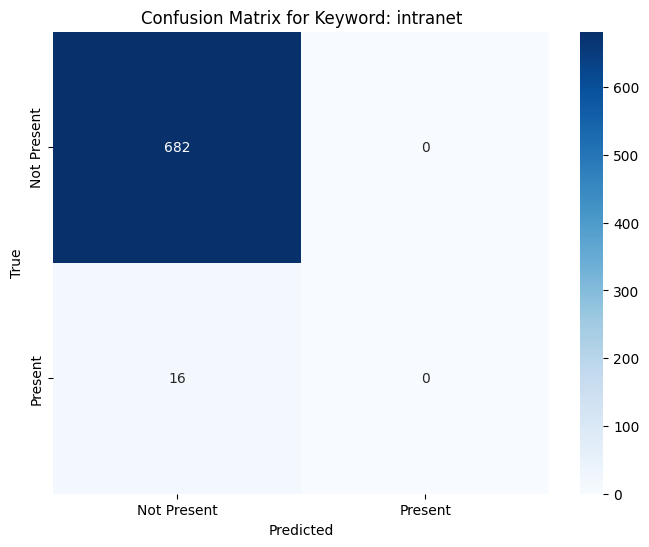

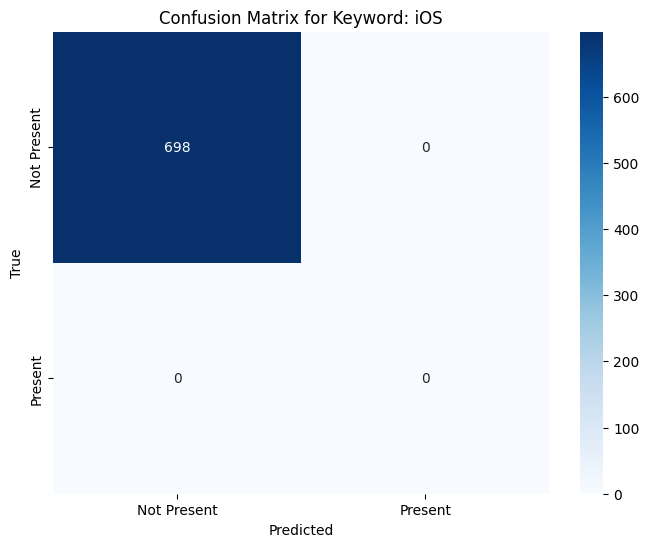

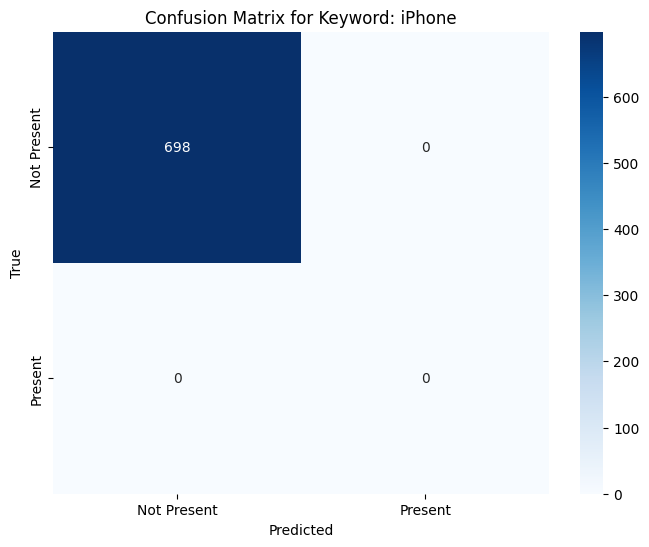

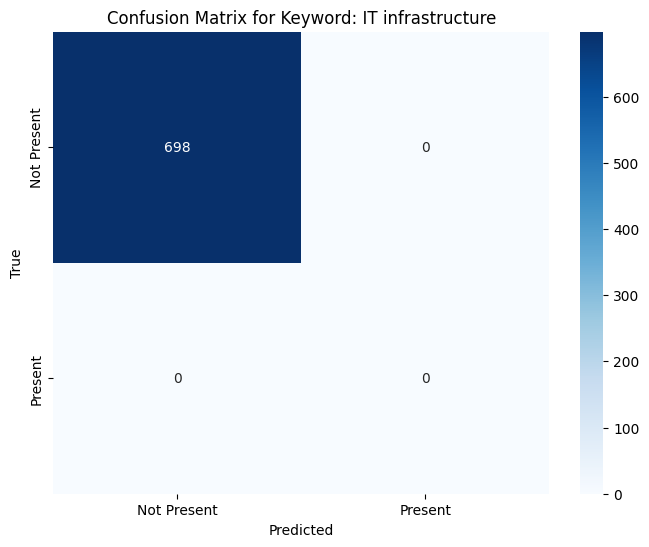

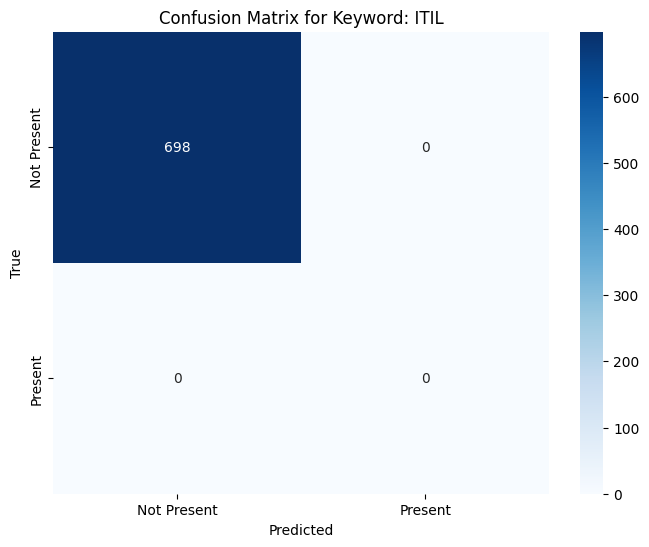

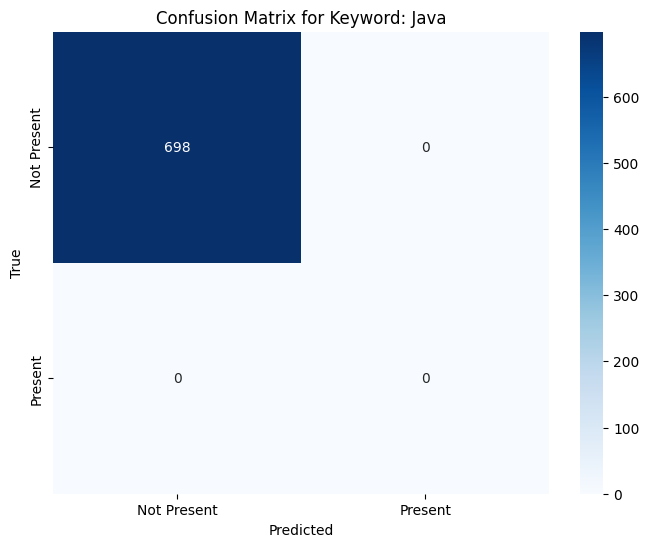

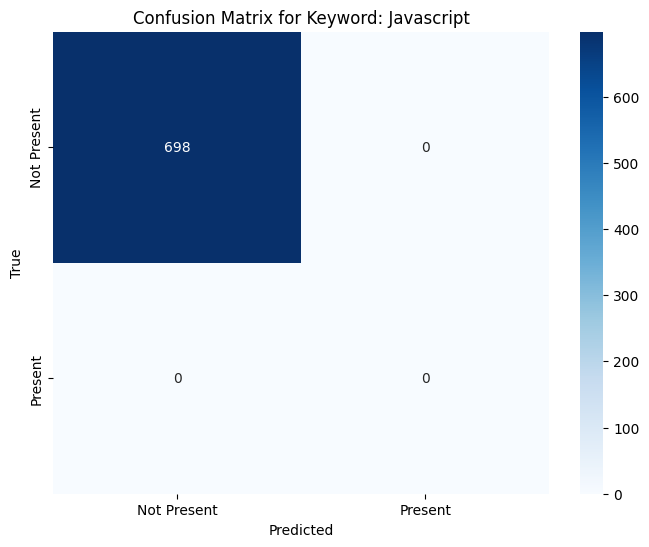

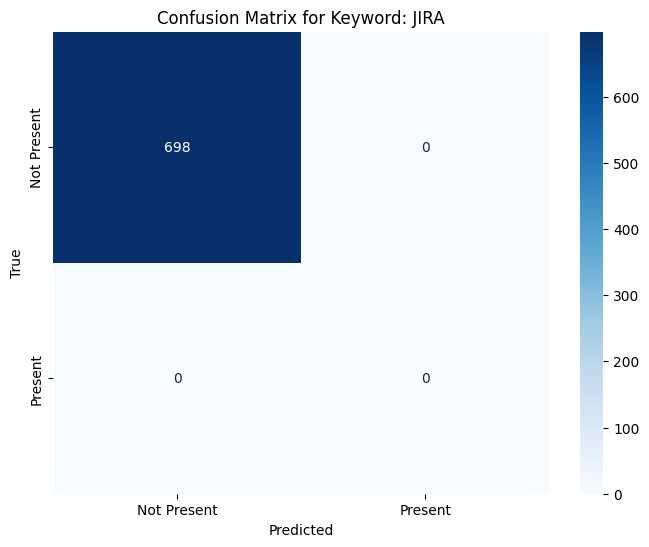

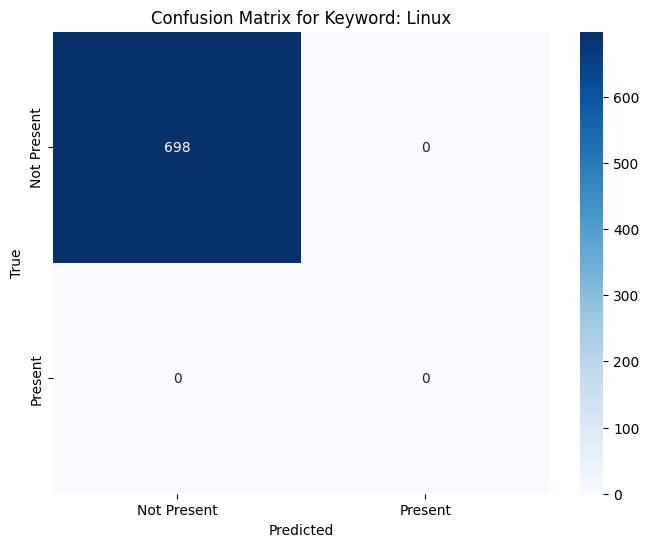

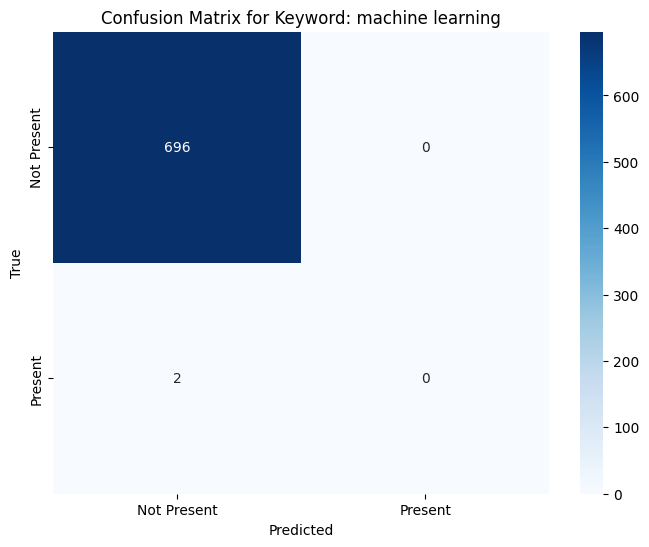

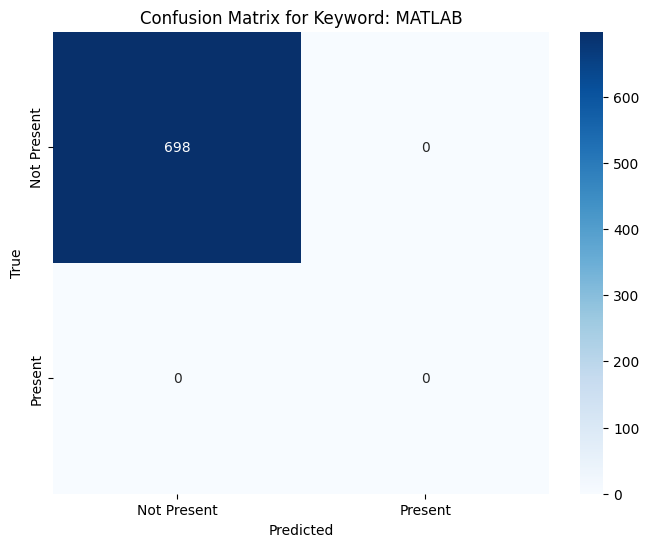

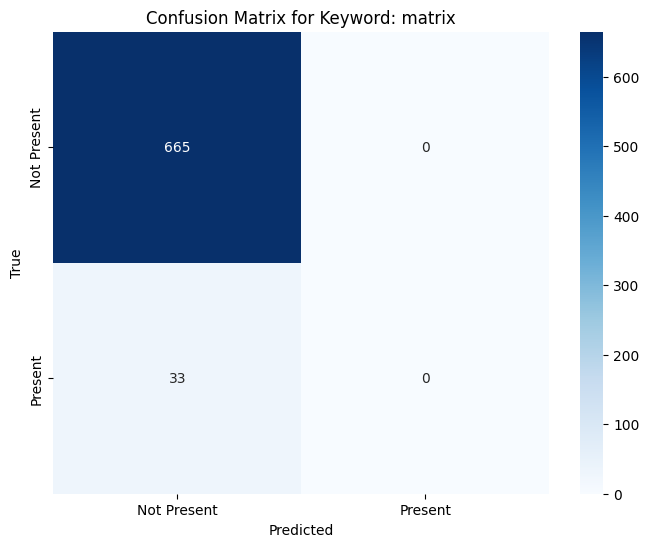

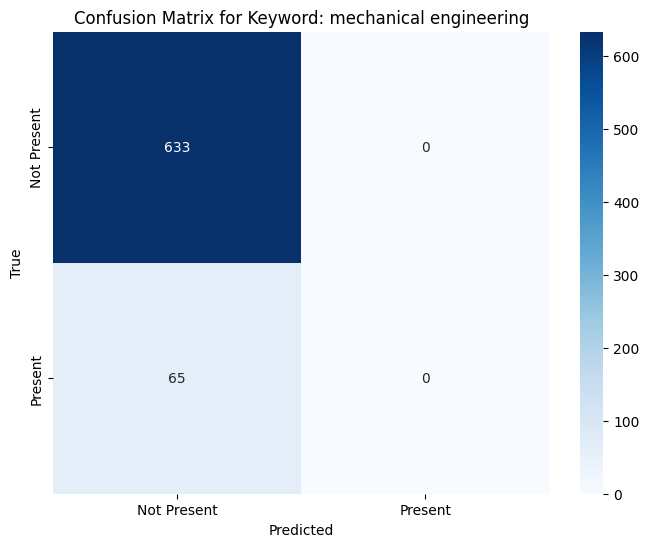

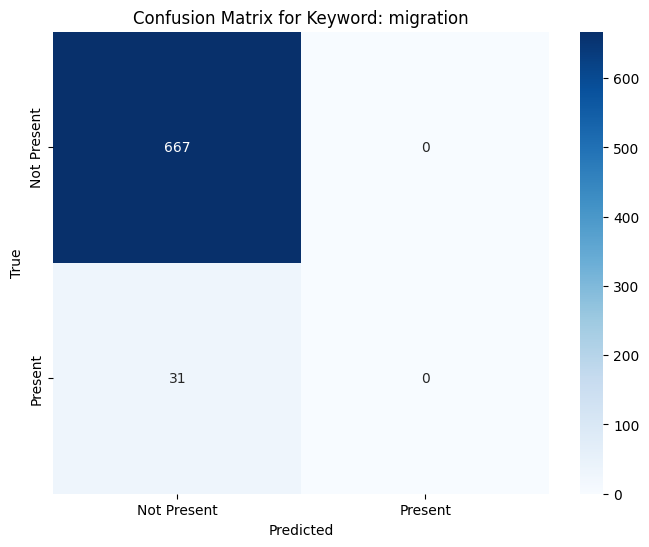

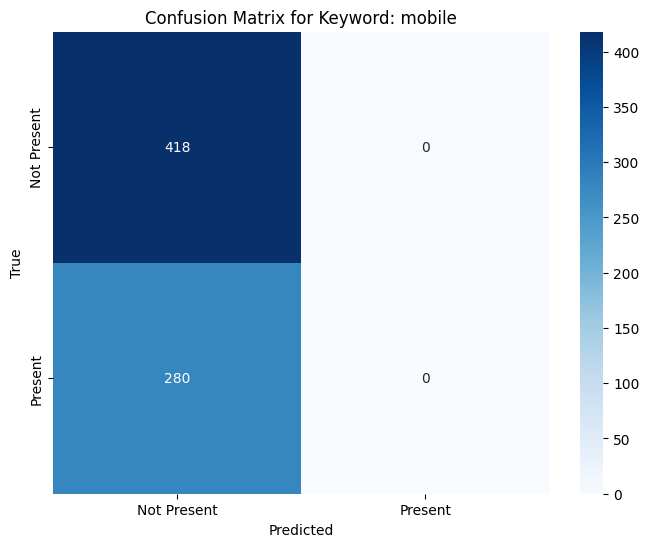

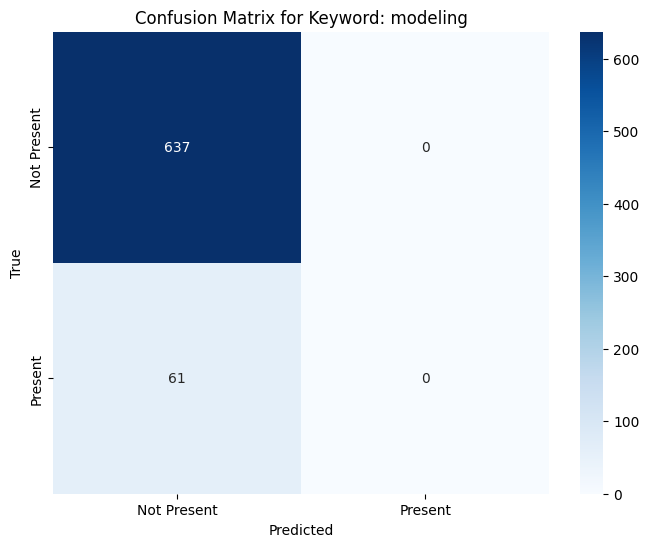

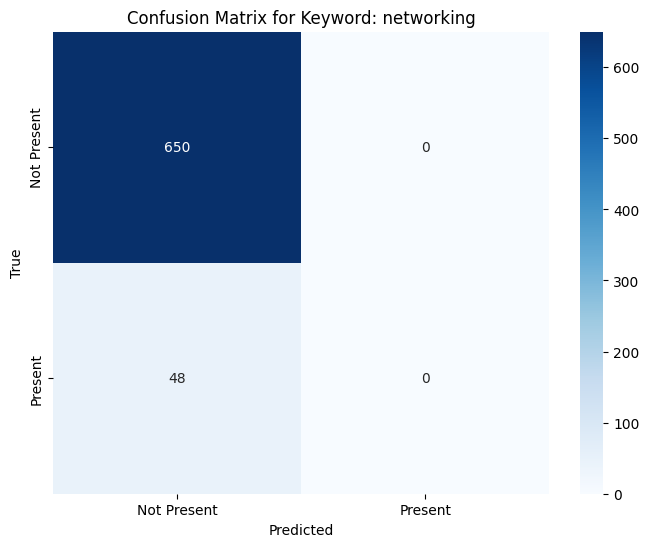

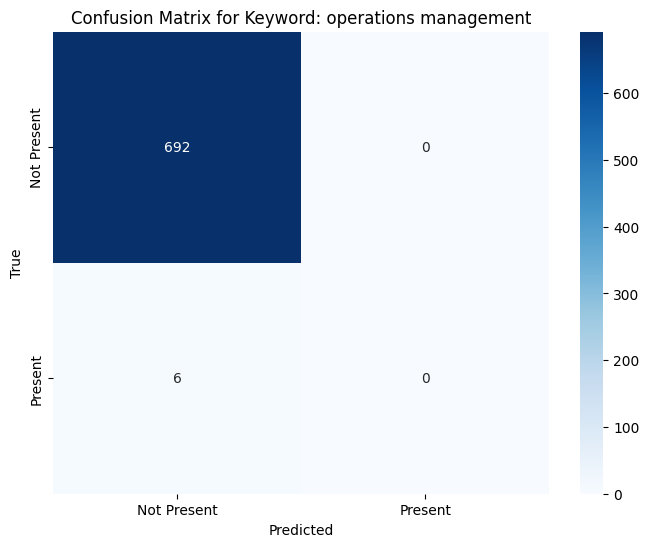

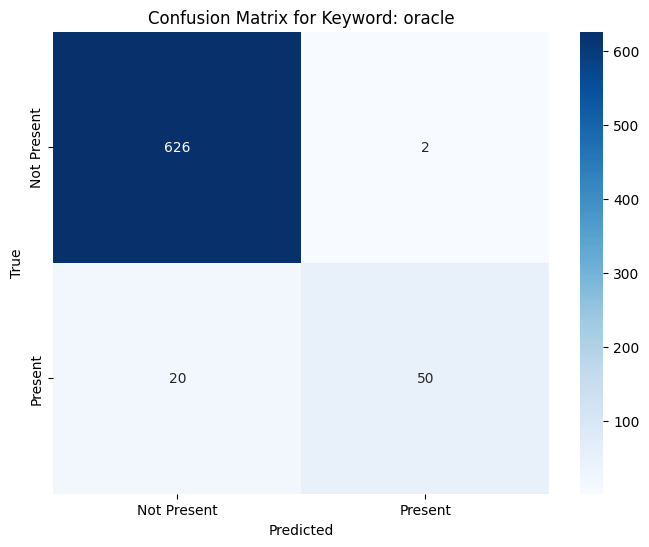

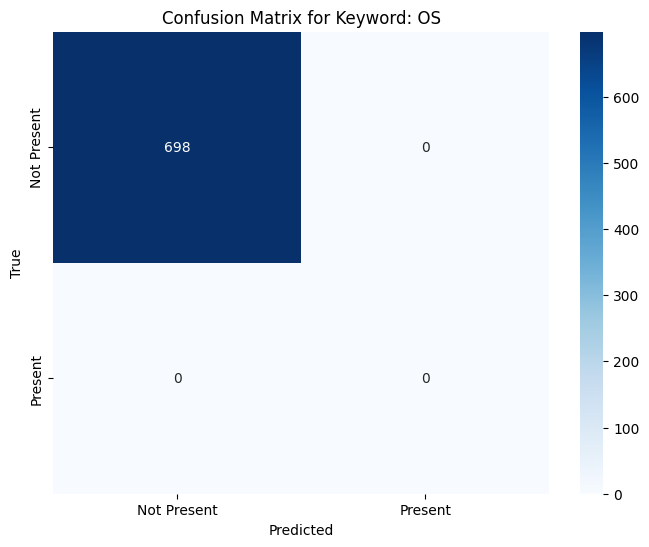

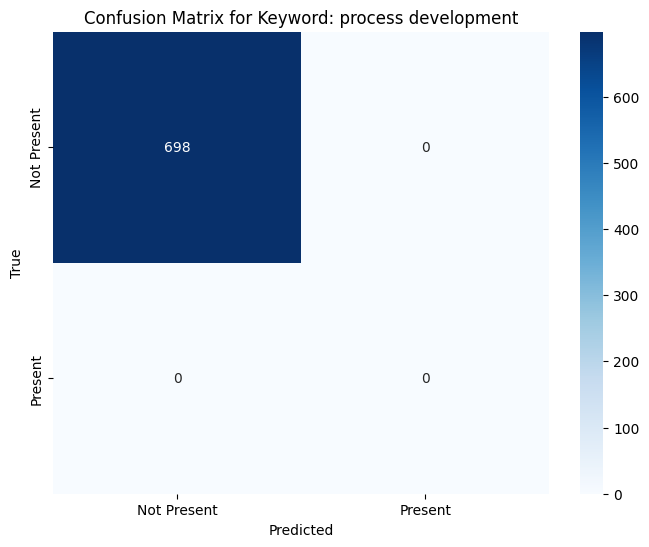

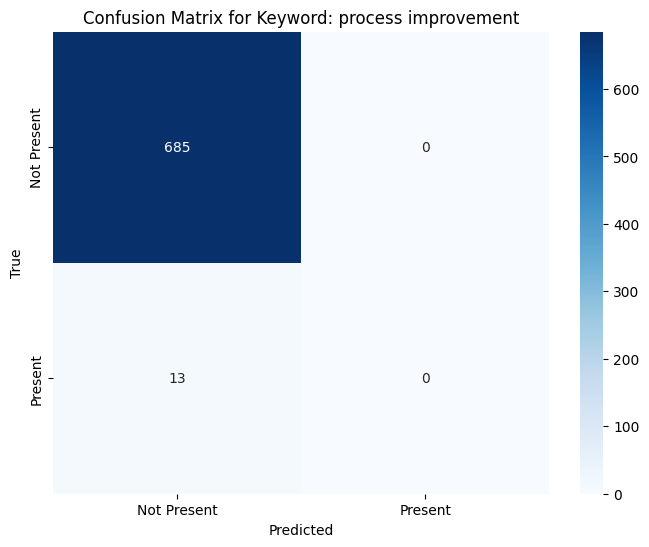

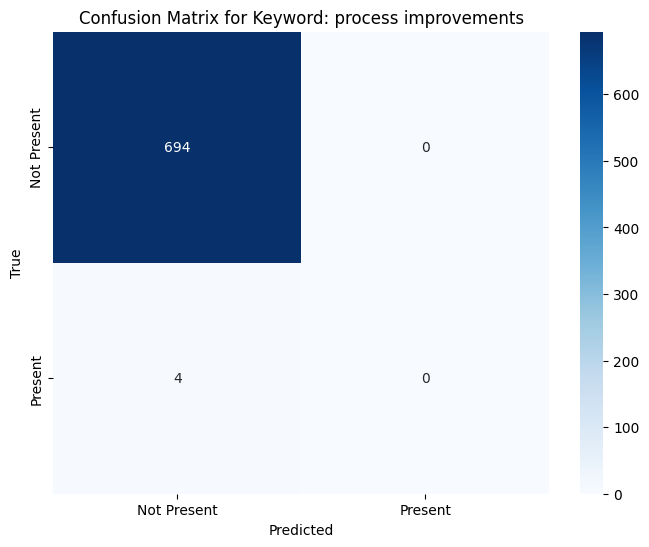

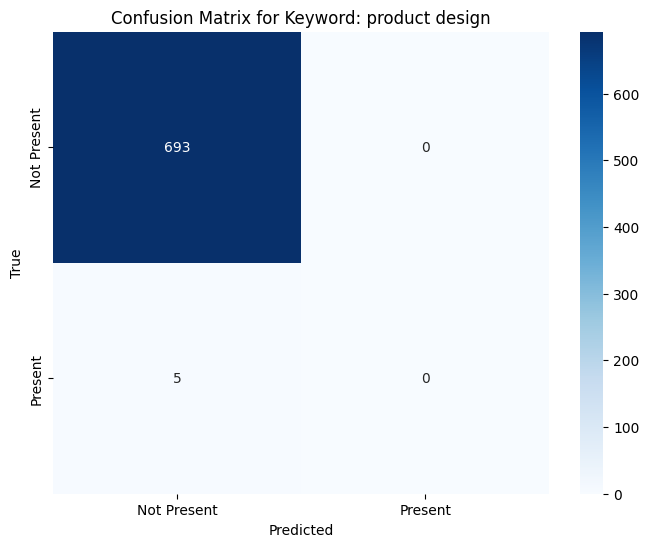

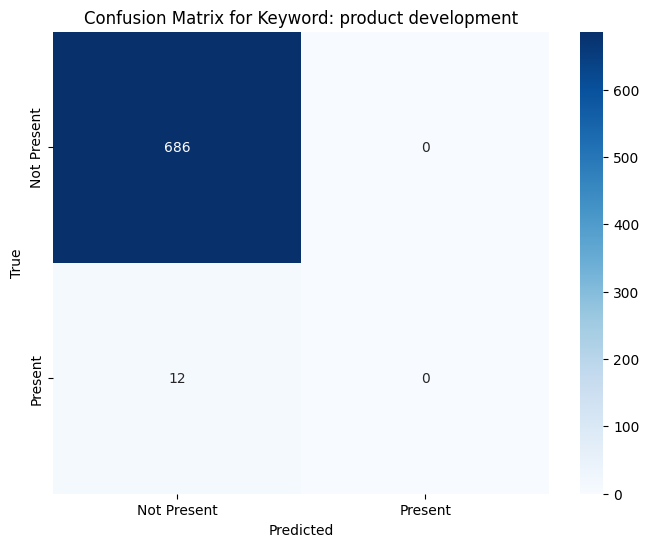

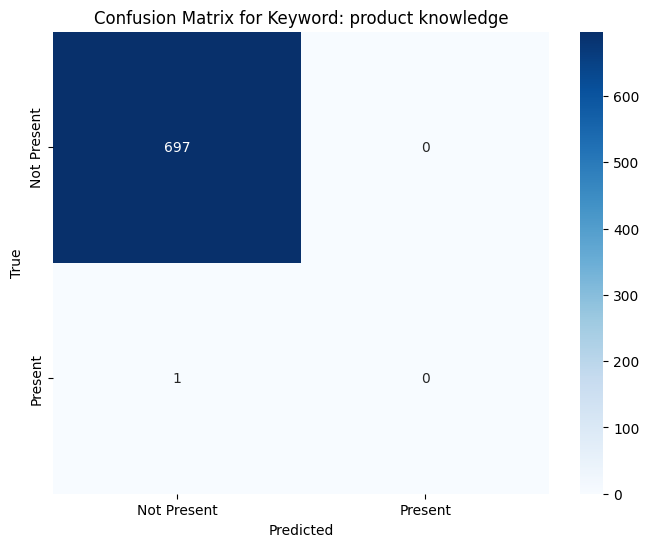

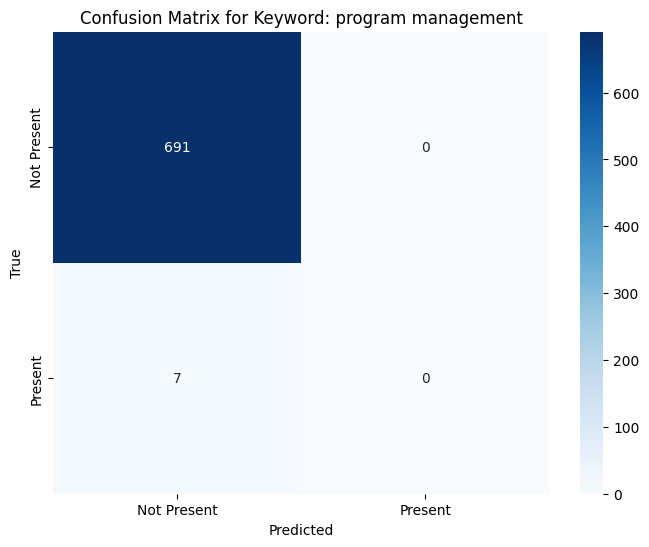

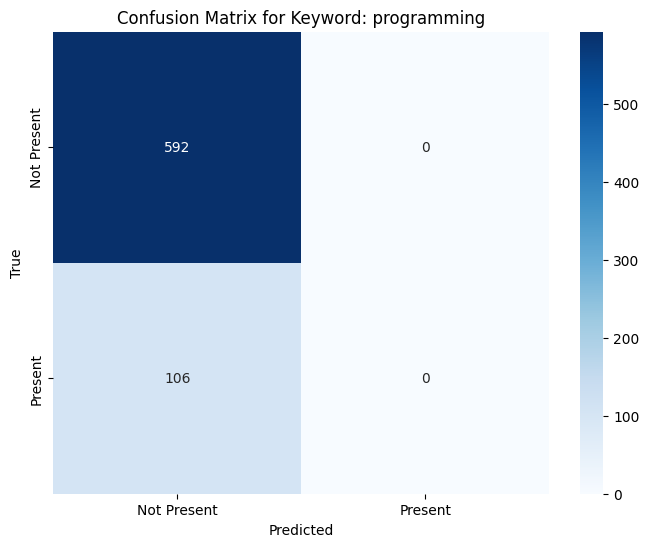

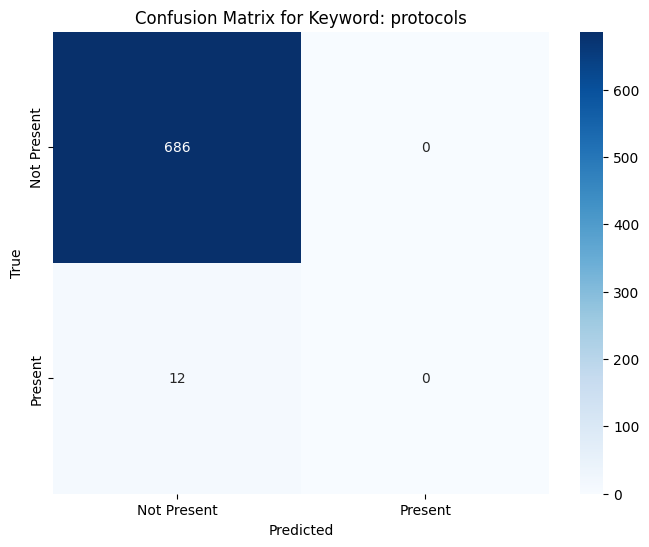

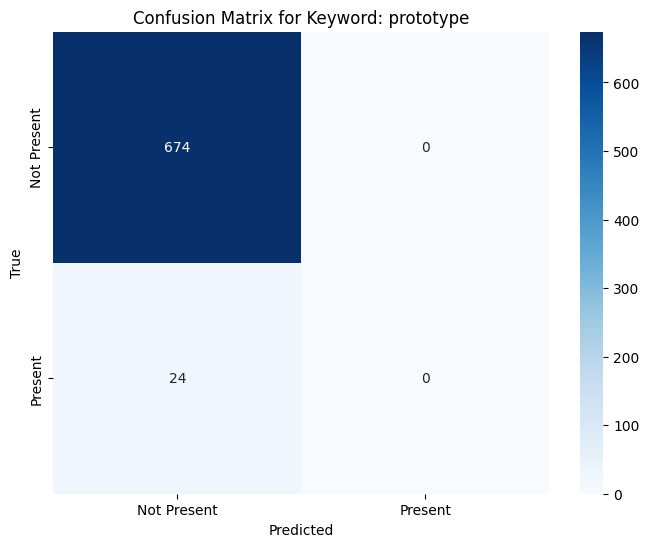

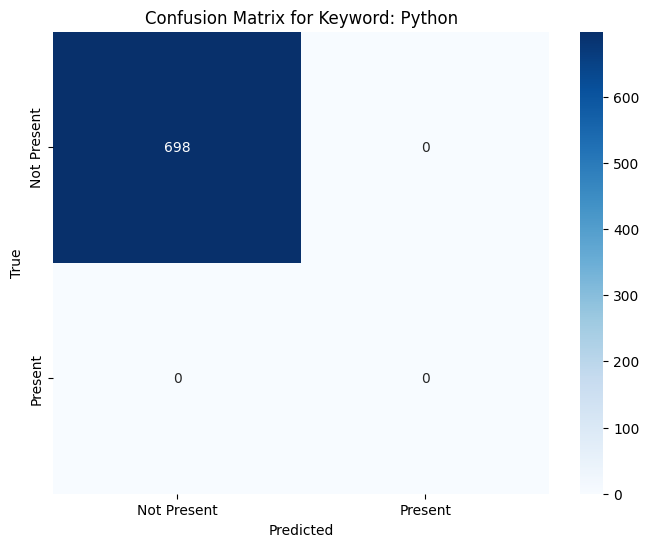

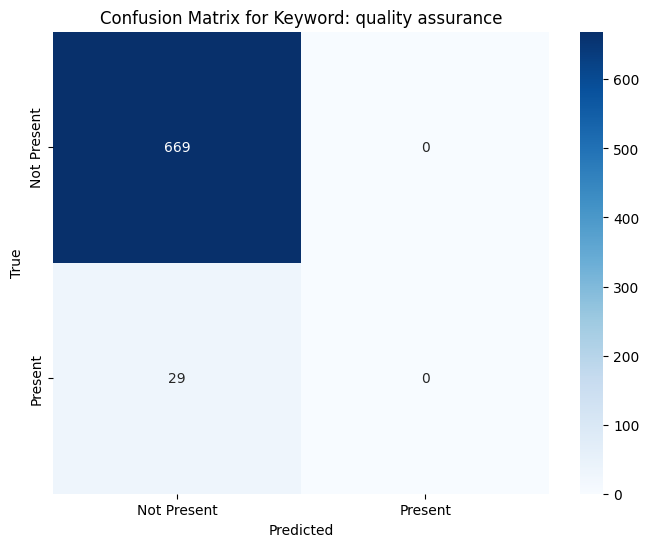

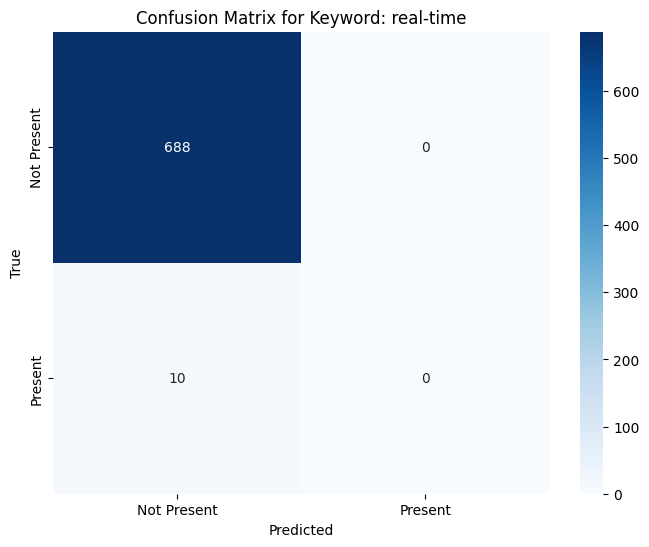

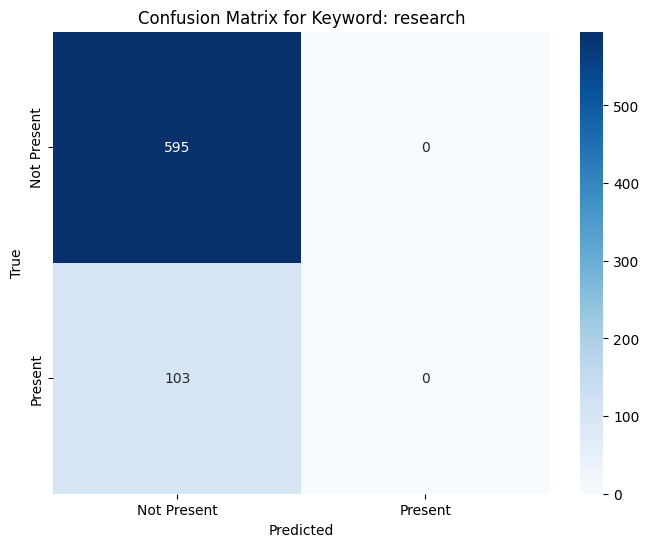

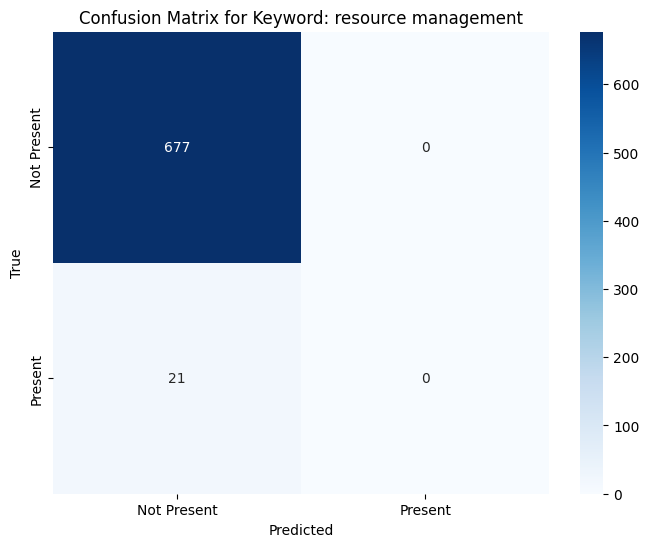

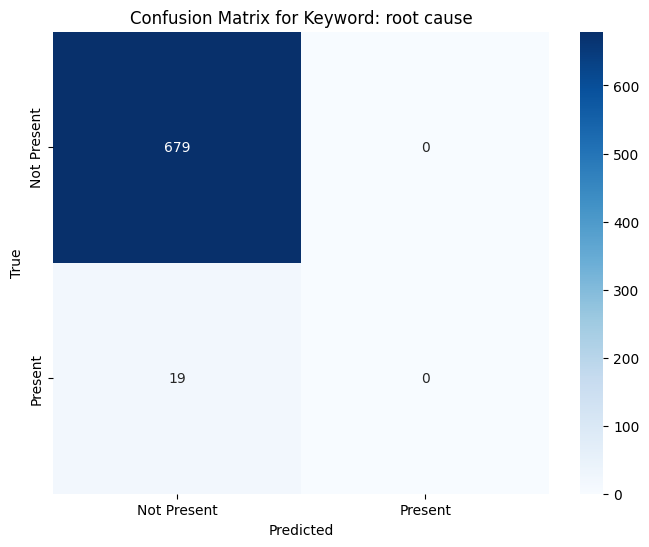

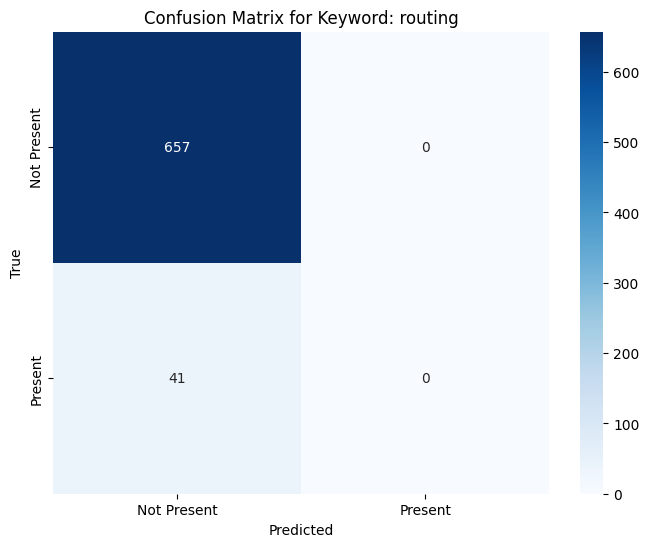

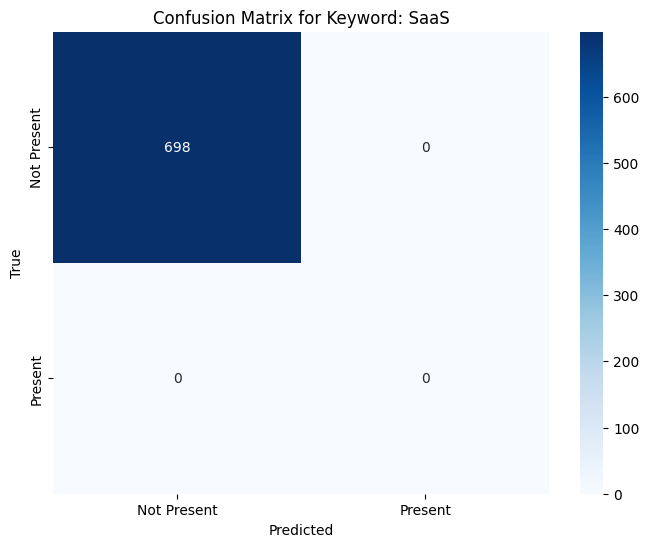

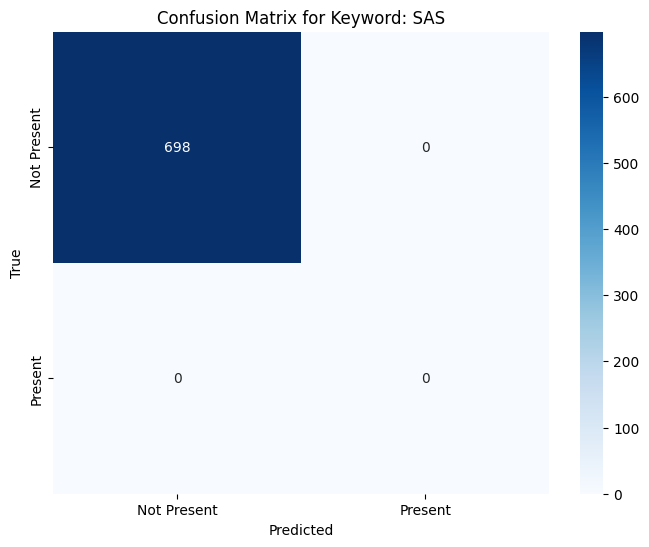

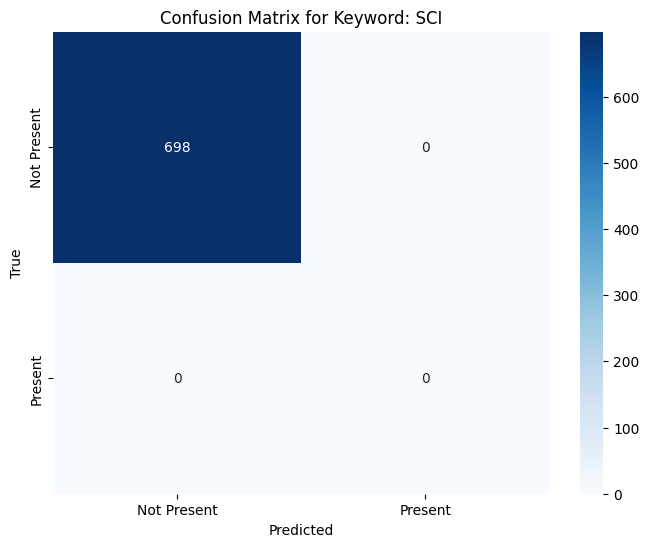

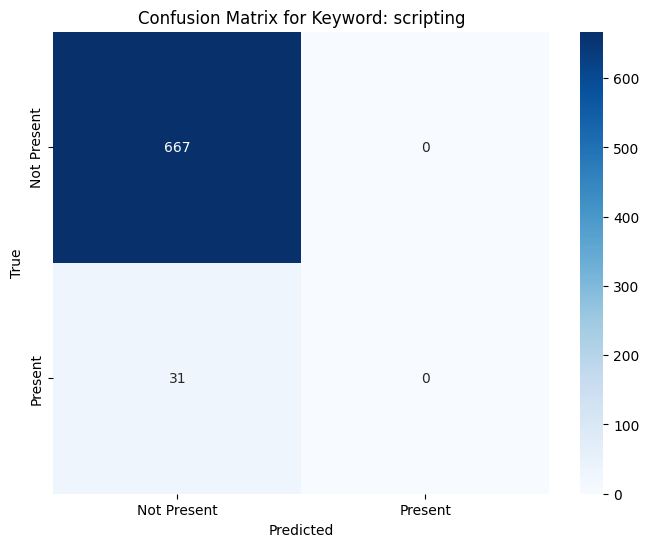

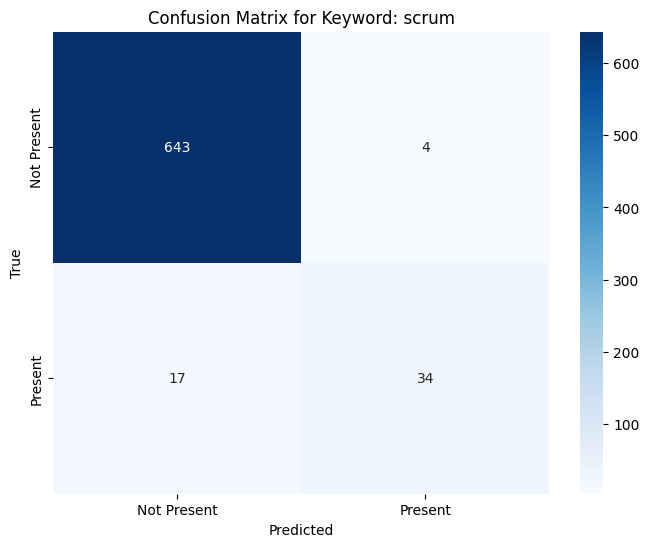

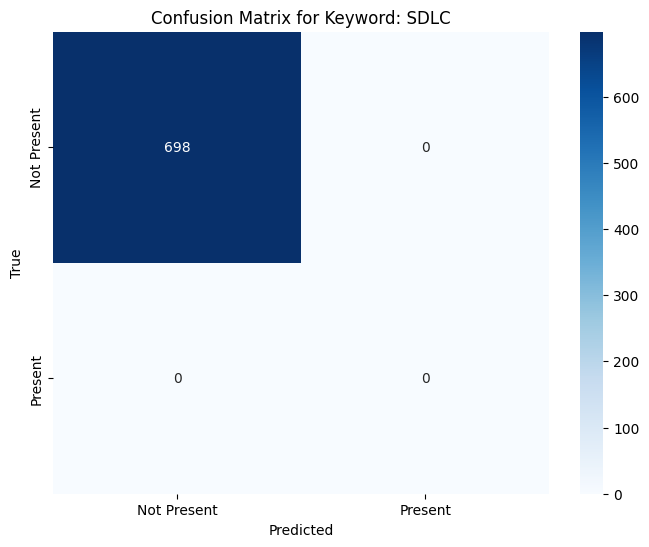

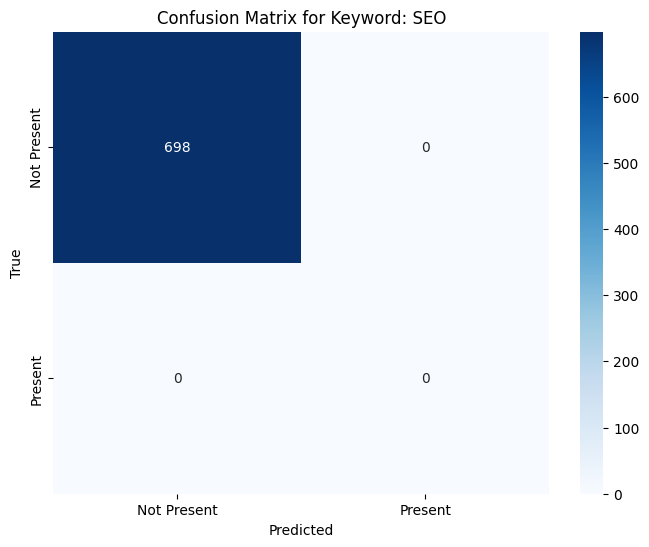

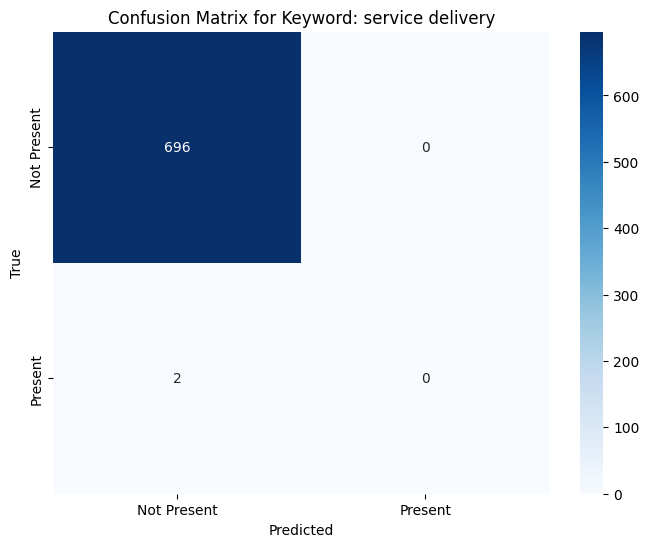

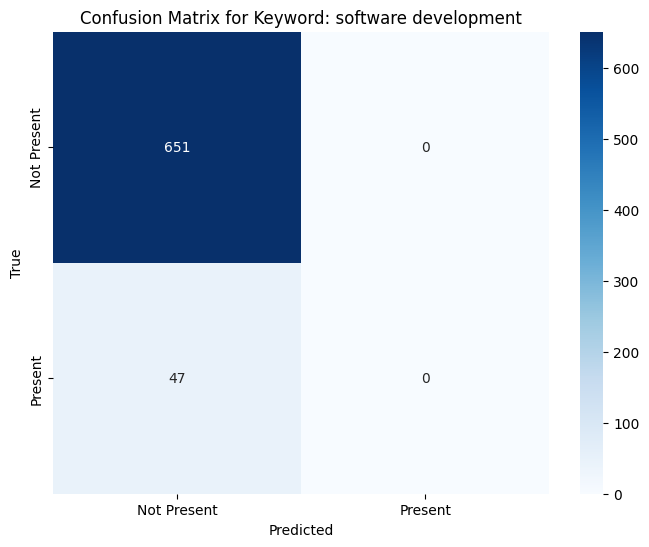

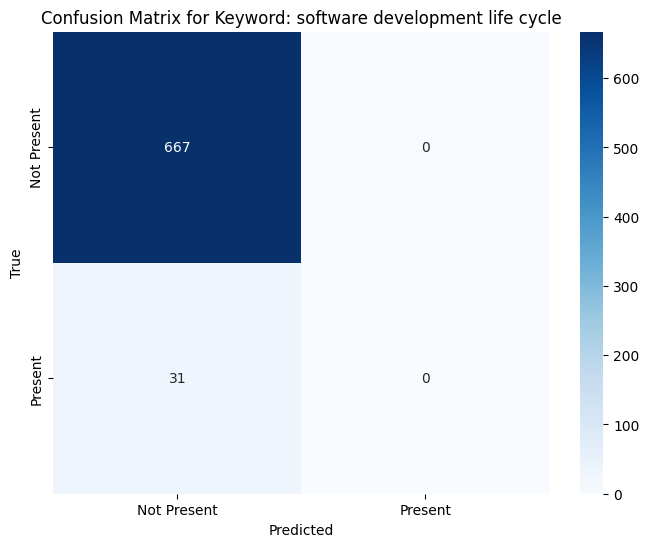

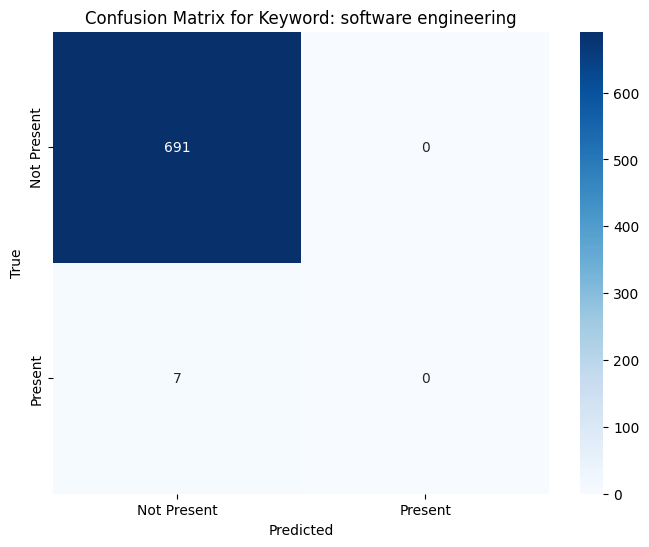

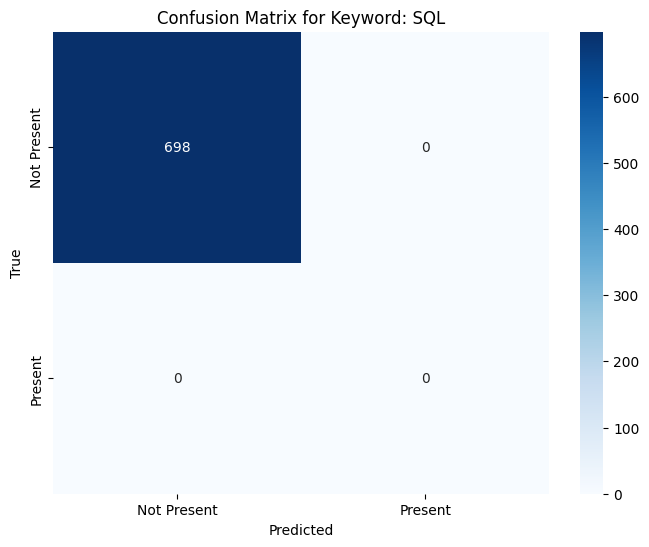

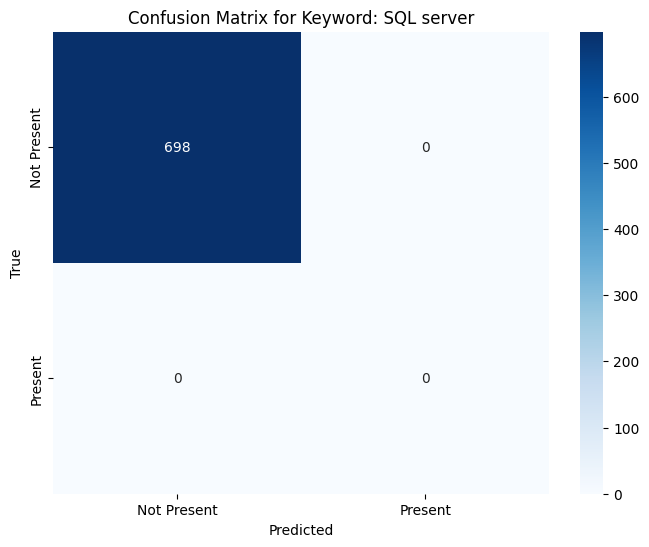

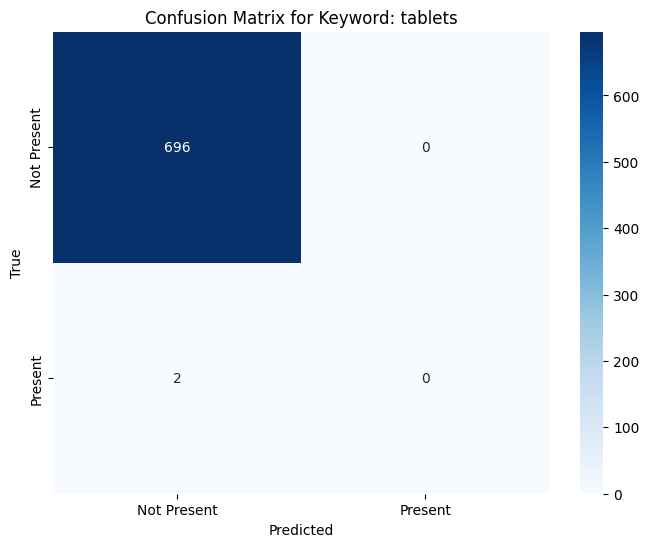

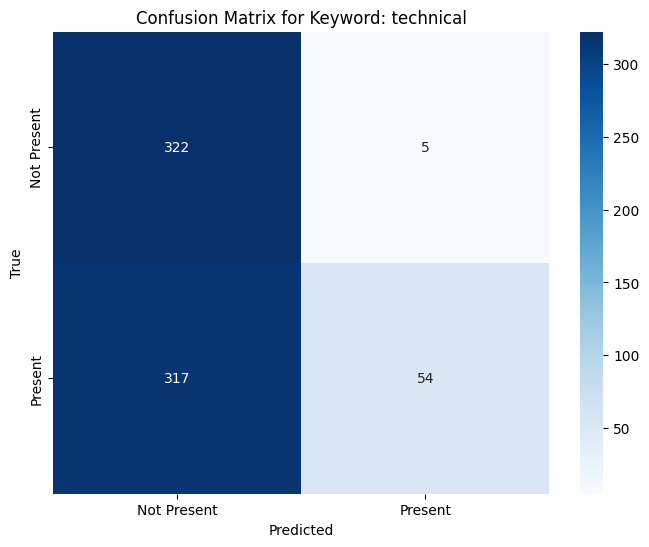

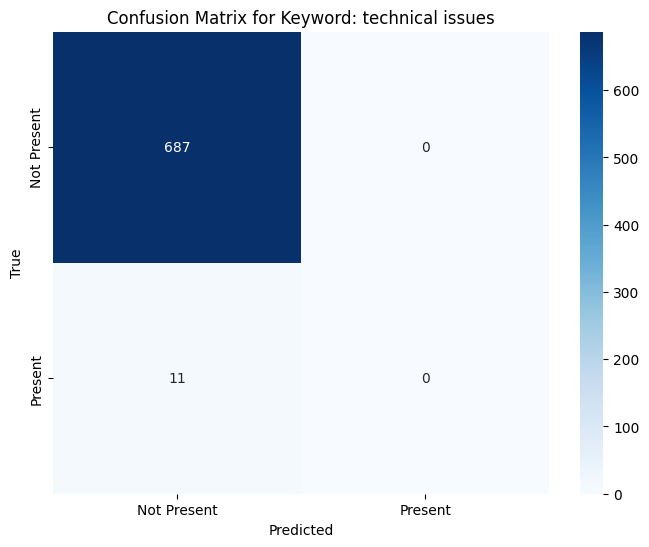

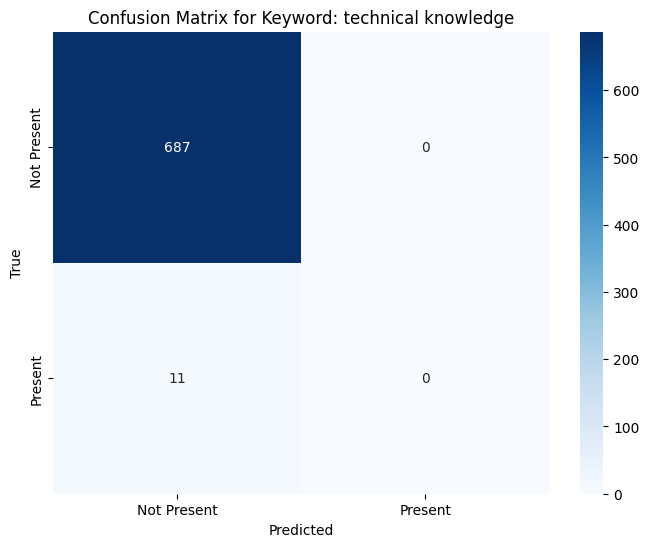

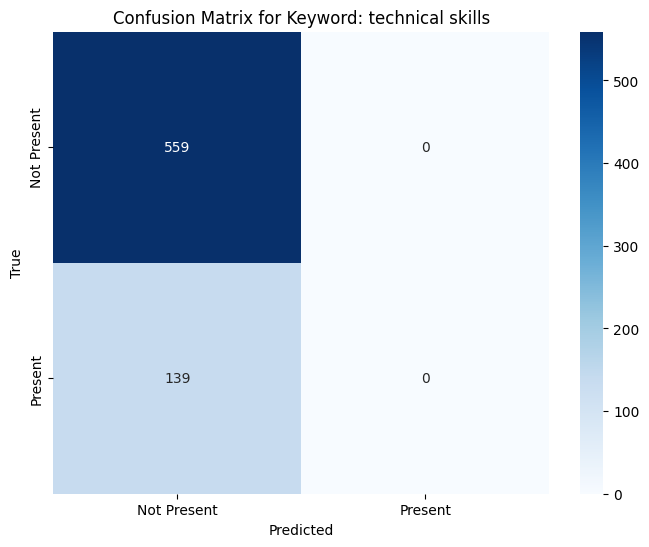

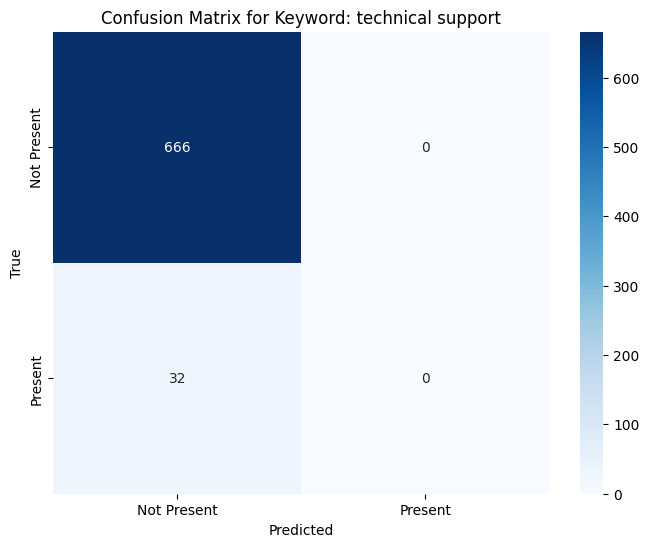

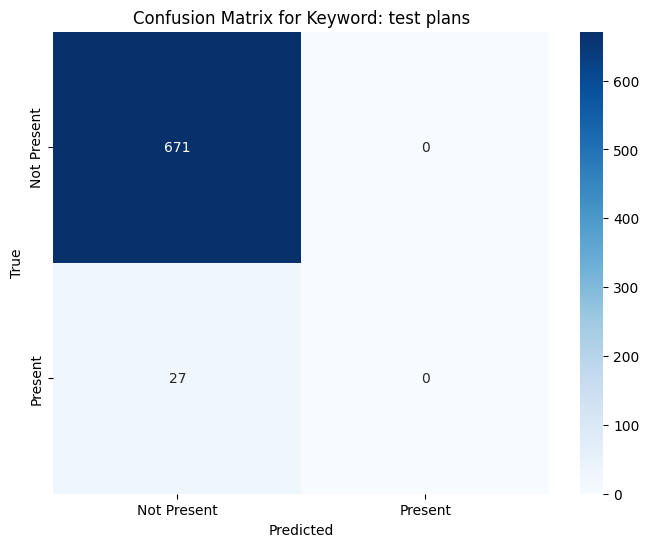

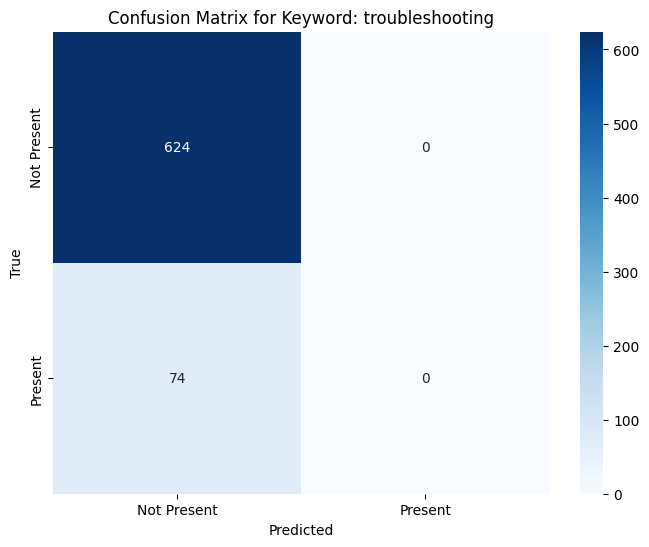

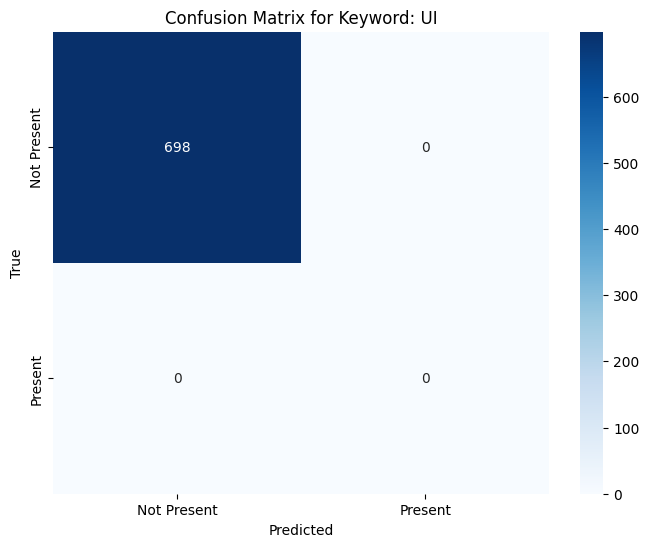

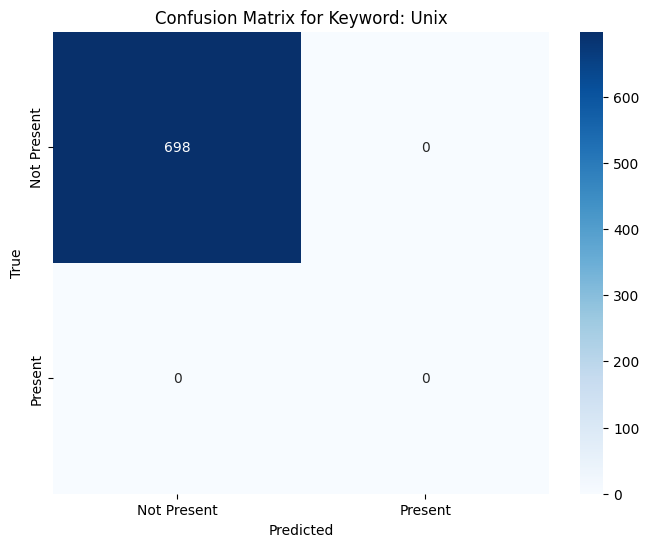

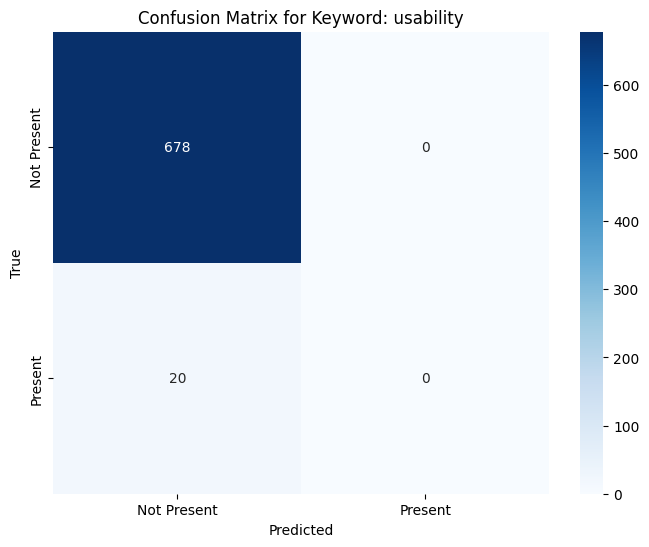

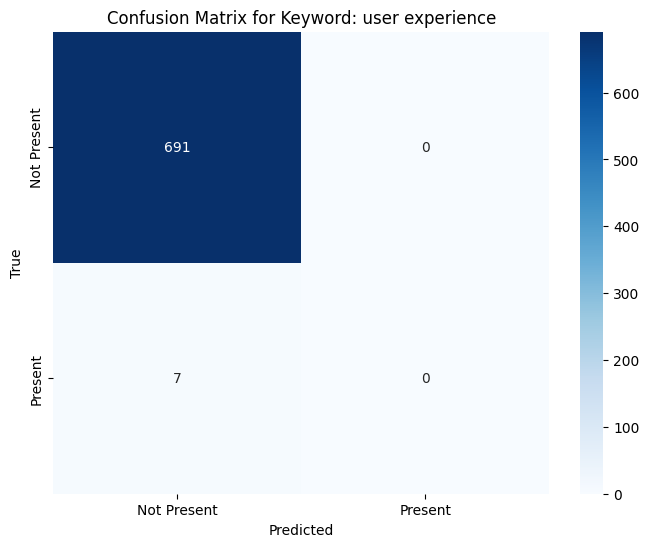

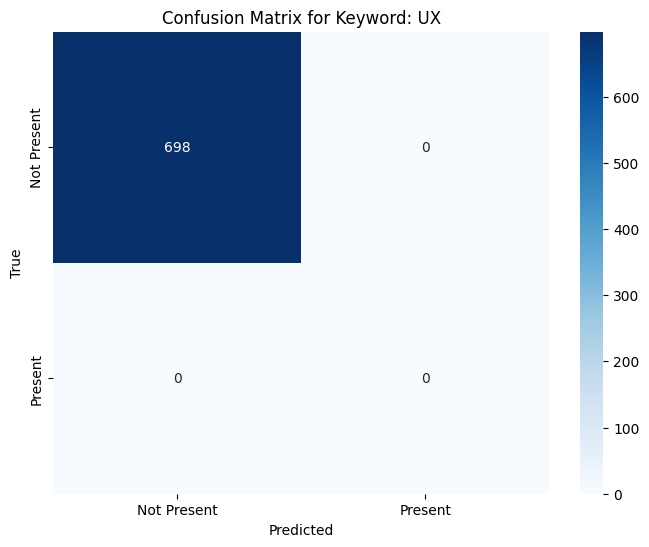

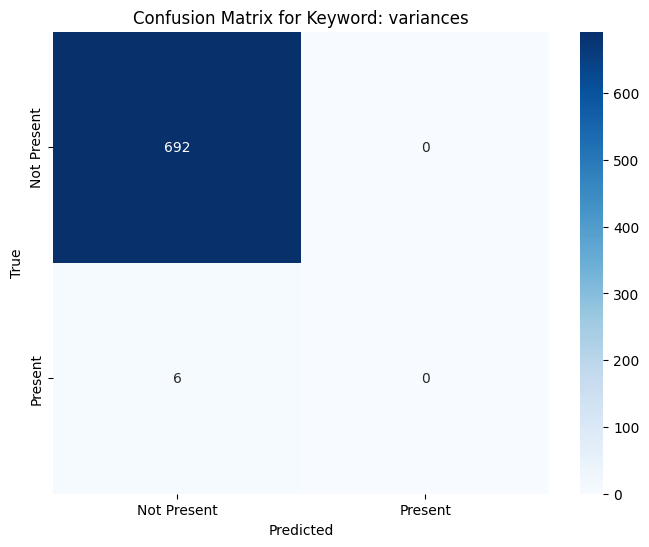

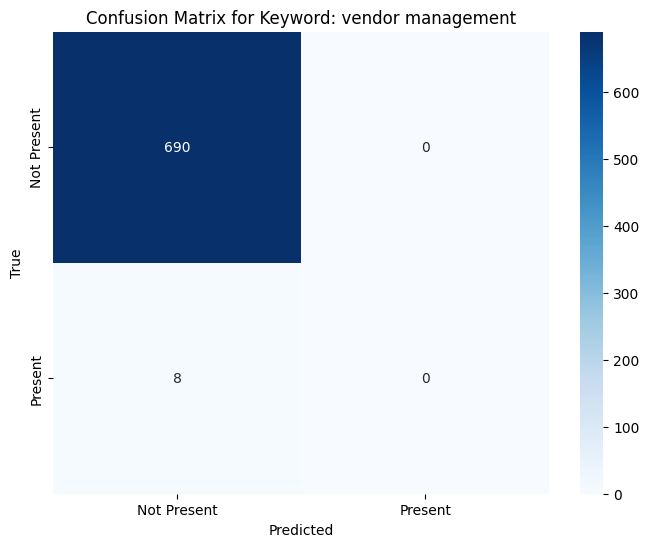

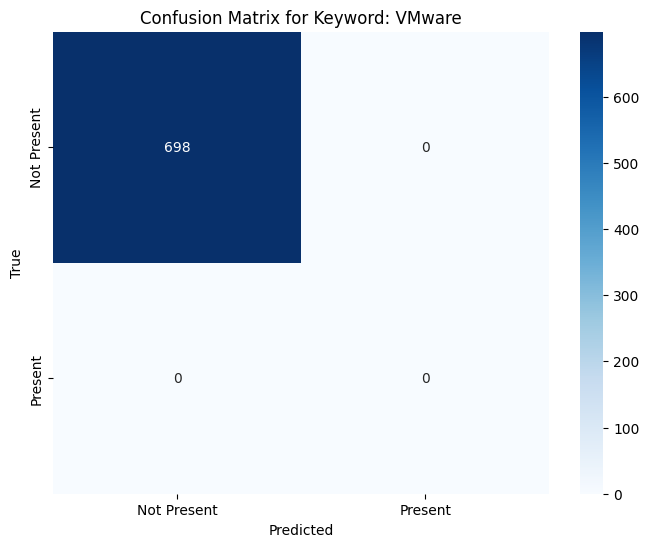

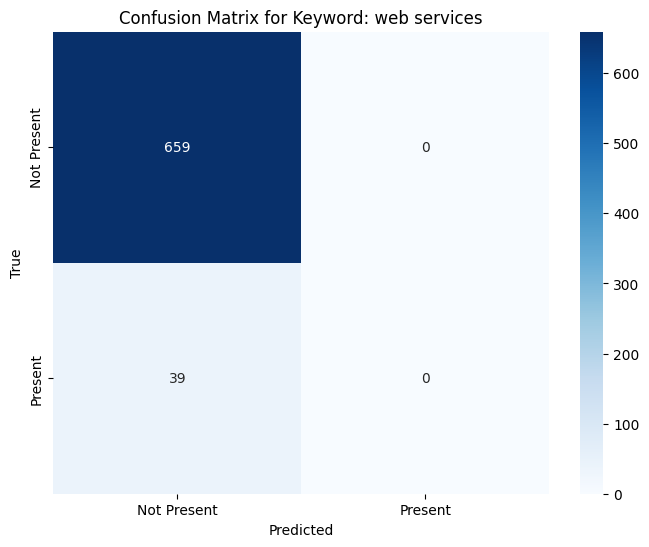

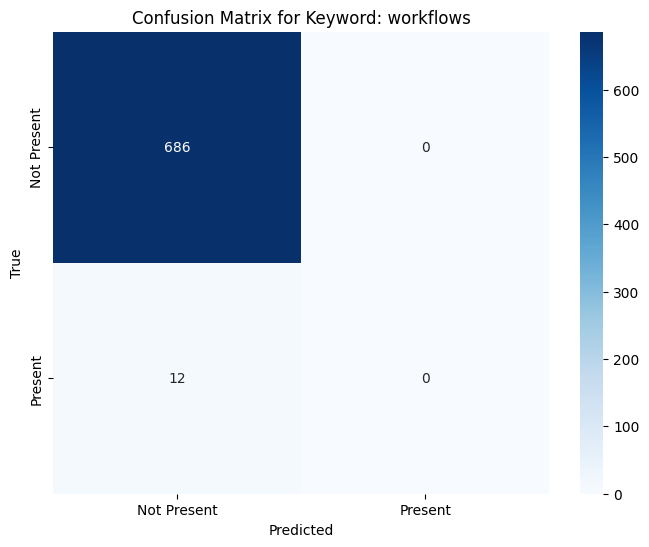

In [77]:
def plot_confusion_matrix(cm, keyword):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Present', 'Present'],
                yticklabels=['Not Present', 'Present'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for Keyword: {keyword}')
    plt.show()

# Plot confusion matrices for each keyword
for i, (conf_matrix, keyword) in enumerate(zip(conf_matrices, keywords)):
    plot_confusion_matrix(conf_matrix, keyword)